In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[10,6]

# PROBLEM STATEMENT

In [2]:
train=pd.read_csv('train_v9rqX0R.csv')
train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [3]:
test=pd.read_csv('test_AbJTz2l.csv')
test.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store


In [4]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Submission file:
submission = pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                           'Outlet_Identifier':test.Outlet_Identifier,
                           'Item_Outlet_Sales':train.Item_Outlet_Sales.mean()})

In [7]:
submission.to_csv('Basemodel.csv',index=False)
#Your score for this submission is : 1773.8251377790564 dollars.

In [8]:
combined=pd.concat([train,test],ignore_index=True)
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
# List of numerical columns
combined.select_dtypes(include=[np.number]).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [10]:
num_cols=['Item_Weight', 'Item_Visibility', 'Item_MRP','Item_Outlet_Sales']

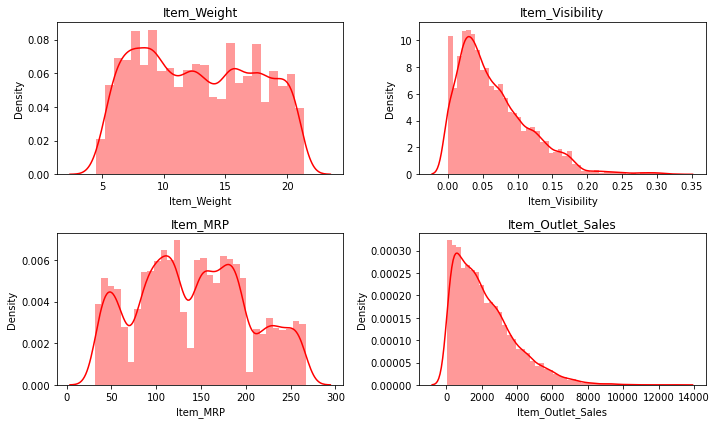

In [11]:
nrows=2
ncols=2
iterator=1
for i in num_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.distplot(combined.loc[:,i],color='red')
    plt.title(i)
    iterator=iterator+1
plt.tight_layout()
plt.show()

In [12]:
# List of categorical columns
train.select_dtypes(include=[np.object]).columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

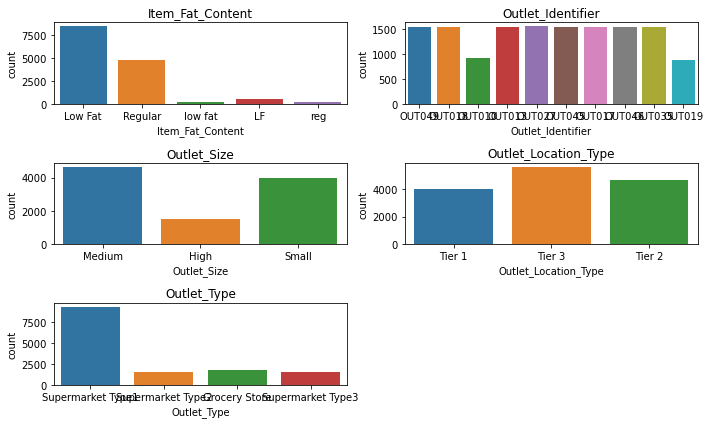

In [13]:
cat_cols=['Item_Fat_Content','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
nrows=3
ncols=2
iterator=1
for i in cat_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.countplot(combined.loc[:,i])
    plt.title(i)
    iterator=iterator+1
plt.tight_layout()
plt.show()

<AxesSubplot:>

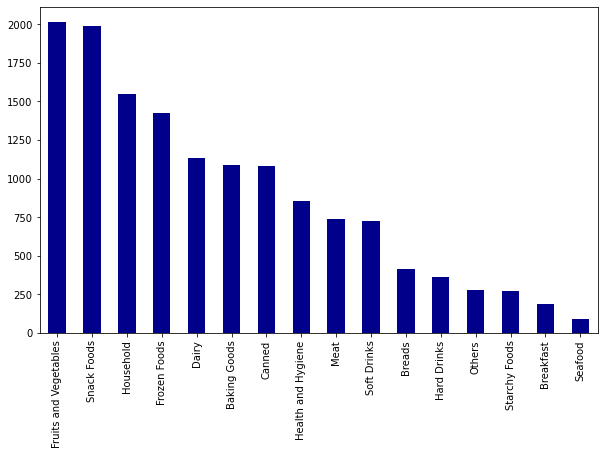

In [14]:
combined.Item_Type.value_counts().plot(kind='bar',color='darkblue')
#Top 5 selling items are: Fruits and vegetables,Dairy,Snacks,Household and Frozen

In [15]:
combined.Outlet_Identifier.value_counts()
# Outlet027 is the highly visible outlet in the buisness.

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [16]:
# Fix the item fat content
combined.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [17]:
# Replace
combined.Item_Fat_Content=combined.Item_Fat_Content.replace(to_replace=['low fat','LF','reg'],value=['Low Fat','Low Fat','Regular'])

In [18]:
combined.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

Bivariate Analysis

In [19]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


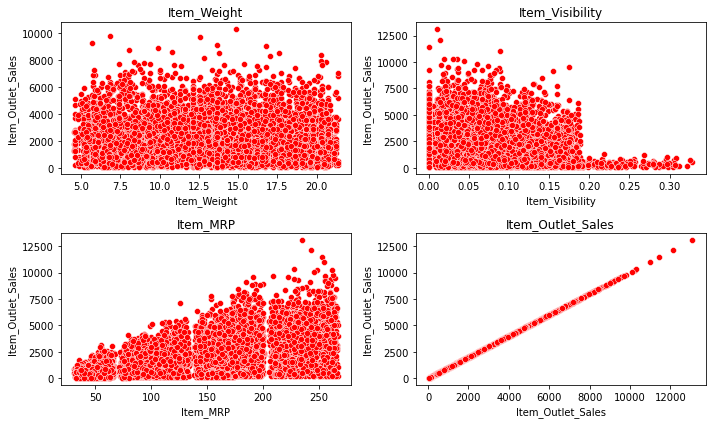

In [20]:
#Numerical vs Numerical
nrows=2
ncols=2
iterator=1
for i in num_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.scatterplot(combined.loc[:,i],combined.Item_Outlet_Sales,color='red')
    plt.title(i)
    iterator+=1
plt.tight_layout()
plt.show()

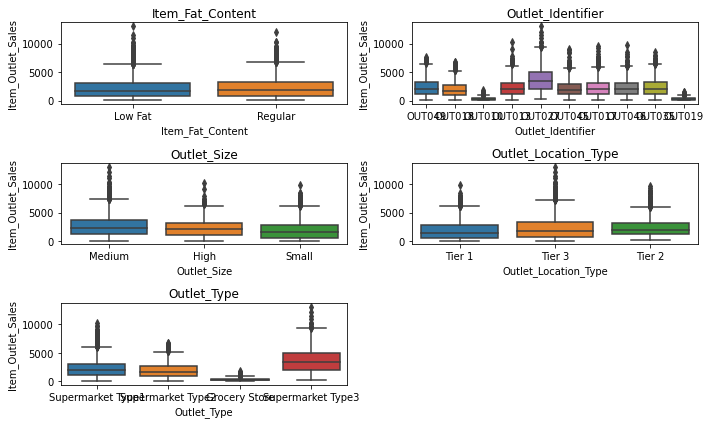

In [21]:
# Categorical vs Numerical
nrows=3
ncols=2
iterator=1
for i in cat_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.boxplot(combined.loc[:,i],combined.Item_Outlet_Sales)
    plt.title(i)
    iterator+=1
plt.tight_layout()
plt.show()

In [22]:
cat_cols

['Item_Fat_Content',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

Missing values

In [23]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [24]:
# Item Weight
combined.loc[combined.Item_Weight.isnull()].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [25]:
# Method 1:
combined['Item_Weight']=combined.groupby('Item_Identifier')['Item_Weight'].apply(lambda x:x.fillna(x.mean()))

In [26]:
combined['Item_Visibility']=combined.groupby('Item_Identifier')['Item_Visibility'].apply(lambda x:x.replace(to_replace=0,value=x.mean()))

In [27]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [28]:
# Missing value in outlet_size
combined.loc[combined.Outlet_Size.isnull()].head()
# Outlet size will depend largely on outlet type

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [29]:
combined.groupby('Outlet_Type')['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           880
Supermarket Type1  Small          3100
                   High           1553
                   Medium         1550
Supermarket Type2  Medium         1546
Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [30]:
# Code for Missing values in Outlets.
combined.loc[(combined.Outlet_Type=='Grocery Store')&(combined.Outlet_Size.isnull()),'Outlet_Size']='Small'

In [31]:
combined.loc[(combined.Outlet_Type=='Supermarket Type1')&(combined.Outlet_Size.isnull()),'Outlet_Size']='Small'

In [32]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

Outliers

<AxesSubplot:>

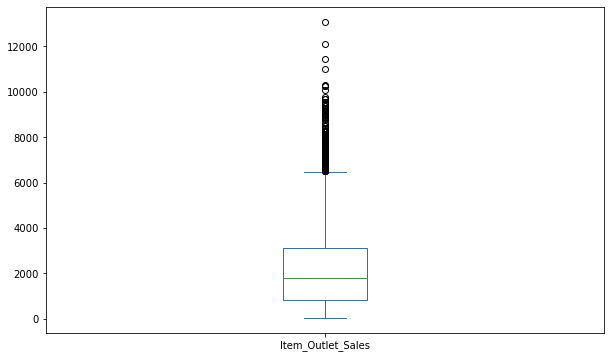

In [33]:
combined.Item_Outlet_Sales.plot(kind='box')

Feature Engineering

In [34]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
ids=[]
for i in combined.Item_Identifier:
    ids.append(i[:2])

In [36]:
combined['Item_Ids']=pd.Series(ids)

In [37]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [38]:
#sns.boxplot(combined.Item_Ids,combined.Item_Outlet_Sales)

In [39]:
combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [40]:
perishables=['Dairy','Meat','Fruits and Vegetables','Breakfast','Breads','Starchy Foods','Seafood']
def perish(x):
    if x in perishables:
        return('Perishables')
    else:
        return('Non_Perishables')

In [41]:
combined['Item_Type_cat']=combined.Item_Type.apply(perish)

In [42]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids,Item_Type_cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishables
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Perishables
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Perishables


In [43]:
pd.crosstab(combined.Item_Ids,combined.Item_Fat_Content)

Item_Fat_Content,Low Fat,Regular
Item_Ids,,
DR,1208,109
FD,5291,4910
NC,2686,0


In [44]:
# Apply Non Edible in item Fat Content for NC
combined.loc[combined.Item_Ids=='NC','Item_Fat_Content']='Non_Edible'

In [45]:
pd.crosstab(combined.Item_Ids,combined.Item_Fat_Content)

Item_Fat_Content,Low Fat,Non_Edible,Regular
Item_Ids,,,
DR,1208,0,109
FD,5291,0,4910
NC,0,2686,0


In [46]:
# Vintage of the outlets.
combined['Vintage']=2013-combined.Outlet_Establishment_Year

In [47]:
# Price_per_unit = Item_MRP/Item_Weight
combined["Price_Per_Unit"] = combined["Item_MRP"]/combined["Item_Weight"]

In [48]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids,Item_Type_cat,Vintage,Price_Per_Unit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,14,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishables,4,8.153581
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,14,8.092457
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,Perishables,15,9.484115
4,NCD19,8.93,Non_Edible,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Perishables,26,6.031512


<AxesSubplot:xlabel='Price_Per_Unit', ylabel='Item_Outlet_Sales'>

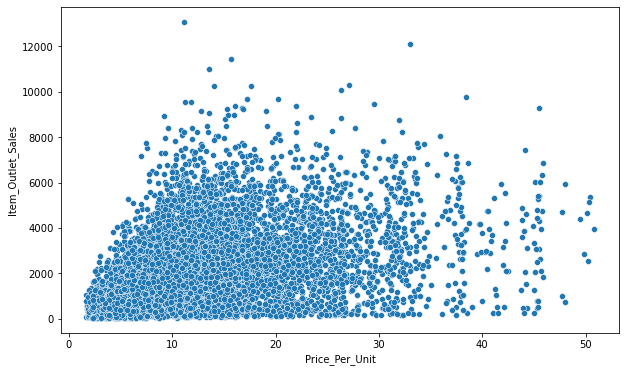

In [49]:
# Check with target variable
sns.scatterplot(combined["Price_Per_Unit"],combined['Item_Outlet_Sales'])

In [50]:
# Sales Summary basis Outlets
outlet_sales=combined.groupby('Outlet_Identifier')['Item_Outlet_Sales'].mean().to_dict()

In [51]:
combined['Outlet_Identifier']=combined.Outlet_Identifier.map(outlet_sales)

In [52]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids,Item_Type_cat,Vintage,Price_Per_Unit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,2348.354635,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,14,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,1995.498739,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishables,4,8.153581
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,2348.354635,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,14,8.092457
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,339.351662,1998,Small,Tier 3,Grocery Store,732.3800,FD,Perishables,15,9.484115
4,NCD19,8.93,Non_Edible,0.009780,Household,53.8614,2298.995256,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Perishables,26,6.031512


In [53]:
# Drop the columns
newdata=combined.drop(['Item_Identifier','Outlet_Establishment_Year','Item_Type'],axis=1)

In [54]:
# Split the data into train and test
train.shape,test.shape
newtrain=newdata.loc[0:train.shape[0]-1,:]
newtest=newdata.loc[train.shape[0]:,:]
newtest=newtest.drop('Item_Outlet_Sales',axis=1)
print(newtrain.shape,newtest.shape)

(8523, 13) (5681, 12)


In [55]:
newtrain.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Ids', 'Item_Type_cat',
       'Vintage', 'Price_Per_Unit'],
      dtype='object')

In [56]:
newtest.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Ids', 'Item_Type_cat', 'Vintage',
       'Price_Per_Unit'],
      dtype='object')

In [58]:
# Apply Statistical test on the data.
cols=newdata.select_dtypes(include=[np.number]).columns
cols
import scipy.stats as stats
for i in cols:
    teststats,pvalue=stats.ttest_ind(newtrain.loc[:,i],newtrain.Item_Outlet_Sales)
    print(i,':',pvalue)

Item_Weight : 0.0
Item_Visibility : 0.0
Item_MRP : 0.0
Outlet_Identifier : 0.9999999999999823
Item_Outlet_Sales : 1.0
Vintage : 0.0
Price_Per_Unit : 0.0


<AxesSubplot:>

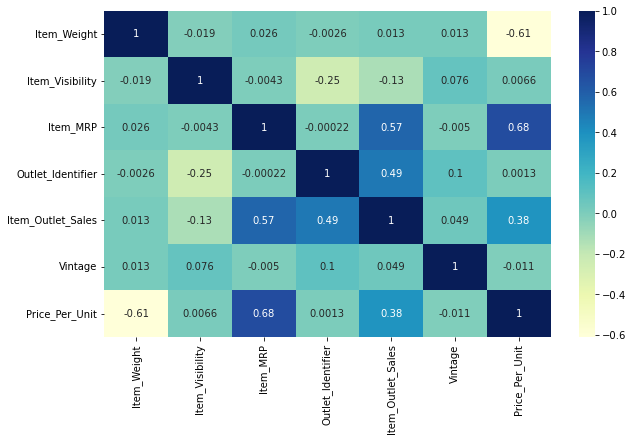

In [59]:
sns.heatmap(newtrain.loc[:,cols].corr(),annot=True,cmap='YlGnBu')

# Model Building

In [60]:
newtrain.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids,Item_Type_cat,Vintage,Price_Per_Unit
0,9.30,Low Fat,0.016047,249.8092,2348.354635,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,14,26.861204
1,5.92,Regular,0.019278,48.2692,1995.498739,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishables,4,8.153581
2,17.50,Low Fat,0.016760,141.6180,2348.354635,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,14,8.092457
3,19.20,Regular,0.017834,182.0950,339.351662,Small,Tier 3,Grocery Store,732.3800,FD,Perishables,15,9.484115
4,8.93,Non_Edible,0.009780,53.8614,2298.995256,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Perishables,26,6.031512


In [64]:
q1=newtrain.quantile(0.25)
q3=newtrain.quantile(0.75)
iqr=q3-q1
ul=q3+1.5*iqr
ll=q1-1.5*iqr
wt_outliers=newtrain.loc[~((newtrain<ll)|(newtrain>ul)).any(axis=1)]

In [65]:
wt_outliers.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids,Item_Type_cat,Vintage,Price_Per_Unit
0,9.300,Low Fat,0.016047,249.8092,2348.354635,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,14,26.861204
1,5.920,Regular,0.019278,48.2692,1995.498739,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishables,4,8.153581
2,17.500,Low Fat,0.016760,141.6180,2348.354635,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,14,8.092457
4,8.930,Non_Edible,0.009780,53.8614,2298.995256,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Perishables,26,6.031512
5,10.395,Regular,0.057059,51.4008,1995.498739,Medium,Tier 3,Supermarket Type2,556.6088,FD,Non_Perishables,4,4.944762


In [67]:
wt_outliers.shape

(6169, 13)

In [68]:
newtrain.shape

(8523, 13)

In [70]:
# Encoding
newtrain.Outlet_Size.value_counts()
mapped={'Small':3,'Medium':2,'High':1}
newtrain['Outlet_Size']=newtrain.Outlet_Size.map(mapped)
wt_outliers['Outlet_Size']=wt_outliers.Outlet_Size.map(mapped)

In [71]:
train_encoded=pd.get_dummies(newtrain,drop_first=True)
wt_encoded=pd.get_dummies(wt_outliers,drop_first=True)
print(train_encoded.shape,wt_encoded.shape)

(8523, 18) (6169, 16)


In [72]:
#newtest encoding
newtest['Outlet_Size']=newtest.Outlet_Size.map(mapped)
newtest_encoded=pd.get_dummies(newtest,drop_first=True)

In [73]:
newtest_encoded.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Size', 'Vintage', 'Price_Per_Unit',
       'Item_Fat_Content_Non_Edible', 'Item_Fat_Content_Regular',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Ids_FD', 'Item_Ids_NC',
       'Item_Type_cat_Perishables'],
      dtype='object')

In [75]:
train_encoded.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Size', 'Item_Outlet_Sales', 'Vintage', 'Price_Per_Unit',
       'Item_Fat_Content_Non_Edible', 'Item_Fat_Content_Regular',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Ids_FD', 'Item_Ids_NC',
       'Item_Type_cat_Perishables'],
      dtype='object')

In [76]:
newtest_encoded.shape

(5681, 17)

Modelling

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
lr=LinearRegression()
dtree=DecisionTreeRegressor()
rf=RandomForestRegressor()
gbm=GradientBoostingRegressor()
xgb=XGBRegressor()
ada=AdaBoostRegressor()

In [83]:
# Linear Regression
pred=[]
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5,shuffle=True,random_state=0)
X=train_encoded.drop('Item_Outlet_Sales',axis=1)
y=train_encoded.Item_Outlet_Sales

for train_index,test_index in kfold.split(X,y):
    xtrain=X.loc[train_index]
    ytrain=y.loc[train_index]
    pred.append(lr.fit(xtrain,ytrain).predict(newtest_encoded))
    
# Prediction file
finalpred=np.abs(pd.DataFrame(pred).T.mean(axis=1))

In [85]:
submission=pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                         'Outlet_Identifier':test.Outlet_Identifier,
                         'Item_Outlet_Sales':finalpred})
submission.to_csv('LRModel.csv',index=False)

In [89]:
# Random forest
pred=[]
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5,shuffle=True,random_state=0)
X=train_encoded.drop('Item_Outlet_Sales',axis=1)
y=train_encoded.Item_Outlet_Sales

for train_index,test_index in kfold.split(X,y):
    xtrain=X.loc[train_index]
    ytrain=y.loc[train_index]
    pred.append(rf.fit(xtrain,ytrain).predict(newtest_encoded))
    
# Prediction file
finalpred=np.abs(pd.DataFrame(pred).T.mean(axis=1))

submission=pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                         'Outlet_Identifier':test.Outlet_Identifier,
                         'Item_Outlet_Sales':finalpred})
submission.to_csv('RFModel.csv',index=False)

#Your score for this Random forest submission is : 1188.096011200597.

In [92]:
# Gradient Boosting
pred=[]
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5,shuffle=True,random_state=0)
X=train_encoded.drop('Item_Outlet_Sales',axis=1)
y=train_encoded.Item_Outlet_Sales

for train_index,test_index in kfold.split(X,y):
    xtrain=X.loc[train_index]
    ytrain=y.loc[train_index]
    pred.append(gbm.fit(xtrain,ytrain).predict(newtest_encoded))
    
# Prediction file
finalpred=np.abs(pd.DataFrame(pred).T.mean(axis=1))

submission=pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                         'Outlet_Identifier':test.Outlet_Identifier,
                         'Item_Outlet_Sales':finalpred})
submission.to_csv('GBMModel.csv',index=False)

#Your score for this Random forest submission is : 1153.8916809413179.

In [94]:
# XGBoosting
pred=[]
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5,shuffle=True,random_state=0)
X=train_encoded.drop('Item_Outlet_Sales',axis=1)
y=train_encoded.Item_Outlet_Sales

for train_index,test_index in kfold.split(X,y):
    xtrain=X.loc[train_index]
    ytrain=y.loc[train_index]
    pred.append(xgb.fit(xtrain,ytrain).predict(newtest_encoded))
    
# Prediction file
finalpred=np.abs(pd.DataFrame(pred).T.mean(axis=1))

submission=pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                         'Outlet_Identifier':test.Outlet_Identifier,
                         'Item_Outlet_Sales':finalpred})
submission.to_csv('XGBModel.csv',index=False)

#Your score for this Random forest submission is :1178.3383516159906.

In [101]:
## Stacking regressor
basemodels=[('lr',lr),('rf',rf),('xgboost',xgb)]
from sklearn.ensemble import StackingRegressor
stack=StackingRegressor(estimators=basemodels,final_estimator=gbm,cv=3)
pred=[]
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5,shuffle=True,random_state=0)
X=train_encoded.drop('Item_Outlet_Sales',axis=1)
y=train_encoded.Item_Outlet_Sales

for train_index,test_index in kfold.split(X,y):
    xtrain=X.loc[train_index]
    ytrain=y.loc[train_index]
    pred.append(stack.fit(xtrain,ytrain).predict(newtest_encoded))
    
# Prediction file
finalpred=np.abs(pd.DataFrame(pred).T.mean(axis=1))

submission=pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                         'Outlet_Identifier':test.Outlet_Identifier,
                         'Item_Outlet_Sales':finalpred})
submission.to_csv('StackingModel.csv',index=False)

#Your score for this Stacking submission is : 1160.8184161590966.

In [ ]:
gbm=GradientBoostingRegressor()

In [102]:
from sklearn.model_selection import GridSearchCV
params=[{'n_estimators':[100,200,500,100],
        'criterion':['friedman_mse','squared_error','mse'],
        'min_samples_split':[2,4,6,8]}]
grid=GridSearchCV(estimator=gbm,param_grid=params,cv=3)
grid.fit(X,y)
grid.best_params_

{'criterion': 'squared_error', 'min_samples_split': 2, 'n_estimators': 100}

In [109]:
from lightgbm import LGBMRegressor
lgbm=LGBMRegressor(learning_rate=0.01)
pred=[]
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5,shuffle=True,random_state=0)
X=train_encoded.drop('Item_Outlet_Sales',axis=1)
y=train_encoded.Item_Outlet_Sales
for train_index,test_index in kfold.split(X,y):
    xtrain=X.loc[train_index]
    ytrain=y.loc[train_index]
    pred.append(lgbm.fit(xtrain,ytrain).predict(newtest_encoded))
finalpred=np.abs(pd.DataFrame(pred).T.mean(axis=1))
submission=pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                         'Outlet_Identifier':test.Outlet_Identifier,
                         'Item_Outlet_Sales':finalpred})
submission.to_csv('LIGHTGBM_hpt.csv',index=False)

#Your score for this LGBM submission is : 1257.6949968395916.

In [110]:
gbm2=GradientBoostingRegressor(criterion='squared_error',min_samples_split=2,n_estimators=100)
pred=[]
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5,shuffle=True,random_state=0)
X=train_encoded.drop('Item_Outlet_Sales',axis=1)
y=train_encoded.Item_Outlet_Sales
for train_index,test_index in kfold.split(X,y):
    xtrain=X.loc[train_index]
    ytrain=y.loc[train_index]
    pred.append(gbm2.fit(xtrain,ytrain).predict(newtest_encoded))
finalpred=np.abs(pd.DataFrame(pred).T.mean(axis=1))
submission=pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                         'Outlet_Identifier':test.Outlet_Identifier,
                         'Item_Outlet_Sales':finalpred})
submission.to_csv('GBM_hpt.csv',index=False)

#Your score for this GBM with hyperparameter tuning submission is : 1154.0385994683077.

In [115]:
from catboost import CatBoostRegressor
cba=CatBoostRegressor()
from sklearn.model_selection import GridSearchCV
cboost=CatBoostRegressor()
pred=[]
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5,shuffle=True,random_state=0)
X=train_encoded.drop('Item_Outlet_Sales',axis=1)
y=train_encoded.Item_Outlet_Sales
for train_index,test_index in kfold.split(X,y):
    xtrain=X.loc[train_index]
    ytrain=y.loc[train_index]
    pred.append(cboost.fit(xtrain,ytrain).predict(newtest_encoded))
finalpred=np.abs(pd.DataFrame(pred).T.mean(axis=1))
submission=pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                         'Outlet_Identifier':test.Outlet_Identifier,
                         'Item_Outlet_Sales':finalpred})
submission.to_csv('cboost_hpt.csv',index=False)

#Your score for this submission is : 1177.6126369253398.

Learning rate set to 0.055449
0:	learn: 1656.6959965	total: 7.23ms	remaining: 7.22s
1:	learn: 1610.3042469	total: 9.67ms	remaining: 4.83s
2:	learn: 1566.2008636	total: 11.9ms	remaining: 3.95s
3:	learn: 1523.4782908	total: 14.1ms	remaining: 3.51s
4:	learn: 1483.5358253	total: 16.5ms	remaining: 3.28s
5:	learn: 1448.7690126	total: 19ms	remaining: 3.15s
6:	learn: 1415.2508602	total: 21.8ms	remaining: 3.1s
7:	learn: 1384.2343173	total: 24.2ms	remaining: 3s
8:	learn: 1356.1679824	total: 26ms	remaining: 2.87s
9:	learn: 1331.5192032	total: 28ms	remaining: 2.77s
10:	learn: 1308.7367412	total: 29.9ms	remaining: 2.69s
11:	learn: 1287.6070500	total: 31.8ms	remaining: 2.62s
12:	learn: 1268.4071618	total: 34ms	remaining: 2.58s
13:	learn: 1251.8333814	total: 36.1ms	remaining: 2.54s
14:	learn: 1234.1105078	total: 38.2ms	remaining: 2.51s
15:	learn: 1218.7926065	total: 40.2ms	remaining: 2.47s
16:	learn: 1206.3124607	total: 42.1ms	remaining: 2.43s
17:	learn: 1193.1809595	total: 44.1ms	remaining: 2.4s
18:

157:	learn: 1021.4415735	total: 323ms	remaining: 1.72s
158:	learn: 1021.0664296	total: 326ms	remaining: 1.72s
159:	learn: 1020.7641095	total: 328ms	remaining: 1.72s
160:	learn: 1020.3696313	total: 330ms	remaining: 1.72s
161:	learn: 1019.8467166	total: 332ms	remaining: 1.72s
162:	learn: 1019.3849923	total: 334ms	remaining: 1.71s
163:	learn: 1018.8957904	total: 336ms	remaining: 1.71s
164:	learn: 1018.5711871	total: 338ms	remaining: 1.71s
165:	learn: 1018.1049405	total: 340ms	remaining: 1.71s
166:	learn: 1017.7620886	total: 344ms	remaining: 1.71s
167:	learn: 1017.5888661	total: 347ms	remaining: 1.72s
168:	learn: 1017.2258240	total: 349ms	remaining: 1.72s
169:	learn: 1016.6316406	total: 351ms	remaining: 1.71s
170:	learn: 1016.1738313	total: 353ms	remaining: 1.71s
171:	learn: 1016.0477968	total: 355ms	remaining: 1.71s
172:	learn: 1015.4866334	total: 358ms	remaining: 1.71s
173:	learn: 1015.2958251	total: 361ms	remaining: 1.71s
174:	learn: 1014.9446474	total: 363ms	remaining: 1.71s
175:	learn

344:	learn: 956.6829443	total: 670ms	remaining: 1.27s
345:	learn: 956.3943804	total: 672ms	remaining: 1.27s
346:	learn: 956.1292045	total: 674ms	remaining: 1.27s
347:	learn: 955.9001021	total: 676ms	remaining: 1.27s
348:	learn: 955.6671582	total: 678ms	remaining: 1.26s
349:	learn: 955.4592484	total: 680ms	remaining: 1.26s
350:	learn: 955.0612125	total: 682ms	remaining: 1.26s
351:	learn: 954.8007722	total: 684ms	remaining: 1.26s
352:	learn: 954.6770098	total: 687ms	remaining: 1.26s
353:	learn: 954.2391419	total: 688ms	remaining: 1.26s
354:	learn: 954.0102926	total: 690ms	remaining: 1.25s
355:	learn: 953.5680139	total: 692ms	remaining: 1.25s
356:	learn: 953.2511161	total: 694ms	remaining: 1.25s
357:	learn: 952.9053283	total: 696ms	remaining: 1.25s
358:	learn: 952.7355424	total: 698ms	remaining: 1.25s
359:	learn: 952.6294370	total: 700ms	remaining: 1.24s
360:	learn: 952.1272285	total: 701ms	remaining: 1.24s
361:	learn: 951.6923443	total: 703ms	remaining: 1.24s
362:	learn: 951.3421910	tota

567:	learn: 897.7789402	total: 1.18s	remaining: 894ms
568:	learn: 897.4772565	total: 1.18s	remaining: 893ms
569:	learn: 897.3993752	total: 1.18s	remaining: 891ms
570:	learn: 897.0125026	total: 1.18s	remaining: 889ms
571:	learn: 896.6952554	total: 1.18s	remaining: 886ms
572:	learn: 896.4446369	total: 1.19s	remaining: 884ms
573:	learn: 896.1004529	total: 1.19s	remaining: 882ms
574:	learn: 895.8859736	total: 1.19s	remaining: 880ms
575:	learn: 895.6865241	total: 1.19s	remaining: 878ms
576:	learn: 895.4316586	total: 1.2s	remaining: 876ms
577:	learn: 895.1673979	total: 1.2s	remaining: 874ms
578:	learn: 894.9470224	total: 1.2s	remaining: 872ms
579:	learn: 894.8175199	total: 1.2s	remaining: 870ms
580:	learn: 894.5787758	total: 1.2s	remaining: 867ms
581:	learn: 894.4624717	total: 1.2s	remaining: 865ms
582:	learn: 894.2904566	total: 1.21s	remaining: 864ms
583:	learn: 894.0056176	total: 1.21s	remaining: 862ms
584:	learn: 893.7386820	total: 1.21s	remaining: 860ms
585:	learn: 893.5199739	total: 1.2

735:	learn: 861.8148257	total: 1.51s	remaining: 543ms
736:	learn: 861.6880684	total: 1.52s	remaining: 541ms
737:	learn: 861.4455469	total: 1.52s	remaining: 539ms
738:	learn: 861.3021506	total: 1.52s	remaining: 537ms
739:	learn: 861.0949450	total: 1.52s	remaining: 535ms
740:	learn: 860.8872425	total: 1.52s	remaining: 533ms
741:	learn: 860.6015744	total: 1.53s	remaining: 531ms
742:	learn: 860.2521150	total: 1.53s	remaining: 529ms
743:	learn: 860.0344581	total: 1.53s	remaining: 527ms
744:	learn: 859.8099830	total: 1.53s	remaining: 525ms
745:	learn: 859.6177695	total: 1.53s	remaining: 523ms
746:	learn: 859.3521976	total: 1.54s	remaining: 521ms
747:	learn: 859.2882571	total: 1.54s	remaining: 519ms
748:	learn: 858.9765245	total: 1.54s	remaining: 517ms
749:	learn: 858.8025538	total: 1.54s	remaining: 514ms
750:	learn: 858.5709619	total: 1.54s	remaining: 512ms
751:	learn: 858.3606364	total: 1.55s	remaining: 510ms
752:	learn: 858.1466925	total: 1.55s	remaining: 508ms
753:	learn: 857.9791006	tota

917:	learn: 828.3190493	total: 1.86s	remaining: 166ms
918:	learn: 828.0229222	total: 1.86s	remaining: 164ms
919:	learn: 827.8535242	total: 1.86s	remaining: 162ms
920:	learn: 827.4452789	total: 1.86s	remaining: 160ms
921:	learn: 827.1980237	total: 1.87s	remaining: 158ms
922:	learn: 827.1089829	total: 1.87s	remaining: 156ms
923:	learn: 827.0083461	total: 1.87s	remaining: 154ms
924:	learn: 826.8241093	total: 1.87s	remaining: 152ms
925:	learn: 826.5396341	total: 1.87s	remaining: 150ms
926:	learn: 826.3435152	total: 1.88s	remaining: 148ms
927:	learn: 825.9927146	total: 1.88s	remaining: 146ms
928:	learn: 825.8460210	total: 1.88s	remaining: 144ms
929:	learn: 825.6937037	total: 1.88s	remaining: 142ms
930:	learn: 825.5561623	total: 1.88s	remaining: 140ms
931:	learn: 825.3651763	total: 1.89s	remaining: 138ms
932:	learn: 825.2729790	total: 1.89s	remaining: 136ms
933:	learn: 825.1768211	total: 1.89s	remaining: 134ms
934:	learn: 825.0577178	total: 1.89s	remaining: 132ms
935:	learn: 824.8457781	tota

88:	learn: 1038.7647253	total: 168ms	remaining: 1.72s
89:	learn: 1038.2763476	total: 170ms	remaining: 1.72s
90:	learn: 1037.6975193	total: 172ms	remaining: 1.72s
91:	learn: 1037.2685419	total: 174ms	remaining: 1.72s
92:	learn: 1036.7952010	total: 176ms	remaining: 1.71s
93:	learn: 1036.3712874	total: 178ms	remaining: 1.71s
94:	learn: 1036.1969099	total: 180ms	remaining: 1.71s
95:	learn: 1036.1692841	total: 181ms	remaining: 1.7s
96:	learn: 1035.8302737	total: 183ms	remaining: 1.7s
97:	learn: 1035.3392132	total: 185ms	remaining: 1.7s
98:	learn: 1034.9085380	total: 188ms	remaining: 1.72s
99:	learn: 1034.4022507	total: 190ms	remaining: 1.71s
100:	learn: 1034.0589715	total: 192ms	remaining: 1.71s
101:	learn: 1033.8574188	total: 194ms	remaining: 1.71s
102:	learn: 1033.4028498	total: 196ms	remaining: 1.71s
103:	learn: 1033.0530866	total: 198ms	remaining: 1.7s
104:	learn: 1032.7341242	total: 200ms	remaining: 1.7s
105:	learn: 1032.4779452	total: 201ms	remaining: 1.7s
106:	learn: 1032.2612540	tot

277:	learn: 972.3401541	total: 516ms	remaining: 1.34s
278:	learn: 972.0618120	total: 518ms	remaining: 1.34s
279:	learn: 971.7684366	total: 519ms	remaining: 1.33s
280:	learn: 971.4967563	total: 521ms	remaining: 1.33s
281:	learn: 971.2162557	total: 523ms	remaining: 1.33s
282:	learn: 970.8829940	total: 525ms	remaining: 1.33s
283:	learn: 970.7519778	total: 526ms	remaining: 1.33s
284:	learn: 970.5242339	total: 528ms	remaining: 1.32s
285:	learn: 970.1675660	total: 530ms	remaining: 1.32s
286:	learn: 969.9595027	total: 532ms	remaining: 1.32s
287:	learn: 969.7321242	total: 535ms	remaining: 1.32s
288:	learn: 969.4257207	total: 537ms	remaining: 1.32s
289:	learn: 969.0071490	total: 538ms	remaining: 1.32s
290:	learn: 968.6693068	total: 540ms	remaining: 1.31s
291:	learn: 968.3703956	total: 542ms	remaining: 1.31s
292:	learn: 967.9974730	total: 543ms	remaining: 1.31s
293:	learn: 967.6660777	total: 546ms	remaining: 1.31s
294:	learn: 967.3317954	total: 547ms	remaining: 1.31s
295:	learn: 967.2010128	tota

461:	learn: 924.1742133	total: 858ms	remaining: 999ms
462:	learn: 924.0372569	total: 860ms	remaining: 997ms
463:	learn: 923.8019138	total: 862ms	remaining: 995ms
464:	learn: 923.5714269	total: 863ms	remaining: 993ms
465:	learn: 923.3349981	total: 867ms	remaining: 993ms
466:	learn: 923.2069358	total: 870ms	remaining: 993ms
467:	learn: 923.0338725	total: 872ms	remaining: 991ms
468:	learn: 922.7320180	total: 874ms	remaining: 989ms
469:	learn: 922.2528670	total: 875ms	remaining: 987ms
470:	learn: 922.0736873	total: 877ms	remaining: 985ms
471:	learn: 921.7034858	total: 879ms	remaining: 984ms
472:	learn: 921.4335454	total: 883ms	remaining: 983ms
473:	learn: 921.2810300	total: 885ms	remaining: 982ms
474:	learn: 921.0587099	total: 888ms	remaining: 982ms
475:	learn: 920.9204554	total: 890ms	remaining: 980ms
476:	learn: 920.8399423	total: 892ms	remaining: 978ms
477:	learn: 920.6933498	total: 893ms	remaining: 975ms
478:	learn: 920.5387709	total: 895ms	remaining: 974ms
479:	learn: 920.3402430	tota

645:	learn: 883.3300394	total: 1.2s	remaining: 658ms
646:	learn: 883.1581448	total: 1.2s	remaining: 656ms
647:	learn: 882.9733570	total: 1.21s	remaining: 655ms
648:	learn: 882.8917972	total: 1.21s	remaining: 653ms
649:	learn: 882.6822500	total: 1.21s	remaining: 651ms
650:	learn: 882.4561755	total: 1.21s	remaining: 649ms
651:	learn: 882.2714908	total: 1.21s	remaining: 647ms
652:	learn: 882.0086082	total: 1.21s	remaining: 646ms
653:	learn: 881.7180702	total: 1.22s	remaining: 644ms
654:	learn: 881.3439297	total: 1.22s	remaining: 642ms
655:	learn: 881.1303515	total: 1.22s	remaining: 641ms
656:	learn: 881.0442567	total: 1.22s	remaining: 639ms
657:	learn: 880.8118262	total: 1.23s	remaining: 637ms
658:	learn: 880.5565949	total: 1.23s	remaining: 635ms
659:	learn: 880.4886921	total: 1.23s	remaining: 633ms
660:	learn: 880.3154653	total: 1.23s	remaining: 631ms
661:	learn: 880.1924852	total: 1.23s	remaining: 629ms
662:	learn: 879.9944274	total: 1.23s	remaining: 627ms
663:	learn: 879.7181538	total:

839:	learn: 845.3718517	total: 1.54s	remaining: 294ms
840:	learn: 845.2286006	total: 1.55s	remaining: 293ms
841:	learn: 845.0359808	total: 1.55s	remaining: 291ms
842:	learn: 844.8860115	total: 1.55s	remaining: 289ms
843:	learn: 844.7971657	total: 1.55s	remaining: 287ms
844:	learn: 844.5094775	total: 1.56s	remaining: 285ms
845:	learn: 844.2193368	total: 1.56s	remaining: 284ms
846:	learn: 844.0887536	total: 1.56s	remaining: 282ms
847:	learn: 843.9604930	total: 1.56s	remaining: 280ms
848:	learn: 843.5698684	total: 1.56s	remaining: 278ms
849:	learn: 843.5124261	total: 1.57s	remaining: 276ms
850:	learn: 843.3459589	total: 1.57s	remaining: 275ms
851:	learn: 843.2363440	total: 1.57s	remaining: 273ms
852:	learn: 843.1154688	total: 1.57s	remaining: 271ms
853:	learn: 842.7789188	total: 1.58s	remaining: 269ms
854:	learn: 842.5359479	total: 1.58s	remaining: 268ms
855:	learn: 842.4277596	total: 1.58s	remaining: 266ms
856:	learn: 842.1757983	total: 1.58s	remaining: 264ms
857:	learn: 841.9612699	tota

0:	learn: 1667.7376490	total: 1.87ms	remaining: 1.87s
1:	learn: 1620.6419129	total: 3.64ms	remaining: 1.82s
2:	learn: 1574.0606200	total: 5.33ms	remaining: 1.77s
3:	learn: 1531.8772526	total: 7.03ms	remaining: 1.75s
4:	learn: 1491.6582483	total: 8.75ms	remaining: 1.74s
5:	learn: 1455.7178347	total: 10.5ms	remaining: 1.73s
6:	learn: 1422.9136576	total: 12.9ms	remaining: 1.83s
7:	learn: 1391.5697951	total: 14.7ms	remaining: 1.82s
8:	learn: 1363.3927445	total: 16.5ms	remaining: 1.82s
9:	learn: 1337.4178393	total: 18.3ms	remaining: 1.81s
10:	learn: 1314.2403186	total: 20.2ms	remaining: 1.82s
11:	learn: 1292.8079772	total: 22.2ms	remaining: 1.83s
12:	learn: 1274.0175007	total: 24.2ms	remaining: 1.83s
13:	learn: 1257.0218580	total: 27.7ms	remaining: 1.95s
14:	learn: 1239.8669002	total: 29.6ms	remaining: 1.94s
15:	learn: 1224.2007752	total: 31.3ms	remaining: 1.93s
16:	learn: 1210.1010191	total: 33.1ms	remaining: 1.91s
17:	learn: 1197.2498956	total: 34.7ms	remaining: 1.89s
18:	learn: 1185.8644

171:	learn: 1021.6233462	total: 340ms	remaining: 1.63s
172:	learn: 1021.2857516	total: 342ms	remaining: 1.63s
173:	learn: 1020.8637438	total: 343ms	remaining: 1.63s
174:	learn: 1020.6747990	total: 345ms	remaining: 1.63s
175:	learn: 1020.1324795	total: 347ms	remaining: 1.62s
176:	learn: 1019.7854058	total: 350ms	remaining: 1.63s
177:	learn: 1019.4207509	total: 353ms	remaining: 1.63s
178:	learn: 1019.0205076	total: 355ms	remaining: 1.63s
179:	learn: 1018.4040131	total: 357ms	remaining: 1.62s
180:	learn: 1017.8260399	total: 359ms	remaining: 1.62s
181:	learn: 1017.5514922	total: 361ms	remaining: 1.62s
182:	learn: 1016.9661631	total: 364ms	remaining: 1.63s
183:	learn: 1016.6450513	total: 368ms	remaining: 1.63s
184:	learn: 1016.3749715	total: 369ms	remaining: 1.63s
185:	learn: 1016.0336847	total: 371ms	remaining: 1.62s
186:	learn: 1015.6458010	total: 373ms	remaining: 1.62s
187:	learn: 1015.3480168	total: 374ms	remaining: 1.62s
188:	learn: 1015.0255289	total: 376ms	remaining: 1.61s
189:	learn

347:	learn: 961.0803631	total: 680ms	remaining: 1.27s
348:	learn: 960.8601664	total: 682ms	remaining: 1.27s
349:	learn: 960.6984798	total: 684ms	remaining: 1.27s
350:	learn: 960.3718542	total: 686ms	remaining: 1.27s
351:	learn: 960.1681827	total: 688ms	remaining: 1.27s
352:	learn: 959.9792974	total: 690ms	remaining: 1.26s
353:	learn: 959.6509861	total: 691ms	remaining: 1.26s
354:	learn: 959.4259846	total: 693ms	remaining: 1.26s
355:	learn: 959.0251004	total: 695ms	remaining: 1.26s
356:	learn: 958.5966782	total: 697ms	remaining: 1.25s
357:	learn: 958.2877876	total: 698ms	remaining: 1.25s
358:	learn: 957.8459394	total: 700ms	remaining: 1.25s
359:	learn: 957.4907256	total: 702ms	remaining: 1.25s
360:	learn: 957.3094030	total: 704ms	remaining: 1.25s
361:	learn: 957.1152211	total: 706ms	remaining: 1.25s
362:	learn: 956.8999932	total: 709ms	remaining: 1.24s
363:	learn: 956.4679923	total: 712ms	remaining: 1.24s
364:	learn: 955.9609452	total: 713ms	remaining: 1.24s
365:	learn: 955.5461177	tota

529:	learn: 914.0003110	total: 1.04s	remaining: 919ms
530:	learn: 913.6709263	total: 1.04s	remaining: 918ms
531:	learn: 913.3233263	total: 1.04s	remaining: 916ms
532:	learn: 913.2000556	total: 1.04s	remaining: 914ms
533:	learn: 913.0379077	total: 1.04s	remaining: 913ms
534:	learn: 912.8008671	total: 1.05s	remaining: 912ms
535:	learn: 912.5847485	total: 1.05s	remaining: 910ms
536:	learn: 912.4679255	total: 1.05s	remaining: 908ms
537:	learn: 912.0634682	total: 1.05s	remaining: 906ms
538:	learn: 911.6546309	total: 1.06s	remaining: 904ms
539:	learn: 911.3926208	total: 1.06s	remaining: 903ms
540:	learn: 911.0869842	total: 1.06s	remaining: 901ms
541:	learn: 910.7417839	total: 1.06s	remaining: 900ms
542:	learn: 910.4372564	total: 1.07s	remaining: 898ms
543:	learn: 910.2672144	total: 1.07s	remaining: 896ms
544:	learn: 909.9987679	total: 1.07s	remaining: 894ms
545:	learn: 909.7549785	total: 1.07s	remaining: 892ms
546:	learn: 909.5668072	total: 1.07s	remaining: 890ms
547:	learn: 909.2576557	tota

703:	learn: 876.3926652	total: 1.38s	remaining: 579ms
704:	learn: 876.0868120	total: 1.38s	remaining: 577ms
705:	learn: 875.9453510	total: 1.38s	remaining: 575ms
706:	learn: 875.6602698	total: 1.38s	remaining: 573ms
707:	learn: 875.5500801	total: 1.38s	remaining: 571ms
708:	learn: 875.4184326	total: 1.39s	remaining: 569ms
709:	learn: 875.2816980	total: 1.39s	remaining: 567ms
710:	learn: 875.2020889	total: 1.39s	remaining: 565ms
711:	learn: 874.9066988	total: 1.39s	remaining: 564ms
712:	learn: 874.6434803	total: 1.4s	remaining: 562ms
713:	learn: 874.4634669	total: 1.4s	remaining: 560ms
714:	learn: 874.3193235	total: 1.4s	remaining: 558ms
715:	learn: 874.1447138	total: 1.4s	remaining: 556ms
716:	learn: 874.0779821	total: 1.4s	remaining: 554ms
717:	learn: 873.8855526	total: 1.41s	remaining: 552ms
718:	learn: 873.6387891	total: 1.41s	remaining: 550ms
719:	learn: 873.4119790	total: 1.41s	remaining: 548ms
720:	learn: 873.1199772	total: 1.41s	remaining: 546ms
721:	learn: 872.9944027	total: 1.

884:	learn: 841.8549750	total: 1.72s	remaining: 224ms
885:	learn: 841.7739994	total: 1.72s	remaining: 222ms
886:	learn: 841.5976059	total: 1.72s	remaining: 220ms
887:	learn: 841.4553172	total: 1.73s	remaining: 218ms
888:	learn: 841.3254981	total: 1.73s	remaining: 216ms
889:	learn: 841.0332462	total: 1.73s	remaining: 214ms
890:	learn: 840.7172025	total: 1.73s	remaining: 212ms
891:	learn: 840.5471453	total: 1.73s	remaining: 210ms
892:	learn: 840.4997194	total: 1.74s	remaining: 208ms
893:	learn: 840.4013950	total: 1.74s	remaining: 206ms
894:	learn: 840.2308082	total: 1.74s	remaining: 204ms
895:	learn: 840.1229028	total: 1.74s	remaining: 202ms
896:	learn: 839.8638093	total: 1.75s	remaining: 200ms
897:	learn: 839.6685886	total: 1.75s	remaining: 198ms
898:	learn: 839.4580863	total: 1.75s	remaining: 196ms
899:	learn: 839.1841516	total: 1.75s	remaining: 195ms
900:	learn: 839.0995528	total: 1.75s	remaining: 193ms
901:	learn: 838.9012041	total: 1.75s	remaining: 191ms
902:	learn: 838.7389194	tota

120:	learn: 1045.6263742	total: 240ms	remaining: 1.74s
121:	learn: 1045.3280806	total: 242ms	remaining: 1.74s
122:	learn: 1044.9426203	total: 245ms	remaining: 1.75s
123:	learn: 1044.4265613	total: 248ms	remaining: 1.75s
124:	learn: 1043.7050981	total: 250ms	remaining: 1.75s
125:	learn: 1043.2339137	total: 252ms	remaining: 1.75s
126:	learn: 1042.7960783	total: 254ms	remaining: 1.74s
127:	learn: 1042.5226920	total: 255ms	remaining: 1.74s
128:	learn: 1042.1707888	total: 258ms	remaining: 1.74s
129:	learn: 1041.7713827	total: 260ms	remaining: 1.74s
130:	learn: 1041.5386415	total: 262ms	remaining: 1.73s
131:	learn: 1041.2318259	total: 263ms	remaining: 1.73s
132:	learn: 1041.0546651	total: 265ms	remaining: 1.73s
133:	learn: 1040.8572806	total: 267ms	remaining: 1.72s
134:	learn: 1040.3774344	total: 269ms	remaining: 1.72s
135:	learn: 1040.1995187	total: 271ms	remaining: 1.72s
136:	learn: 1039.6685571	total: 274ms	remaining: 1.72s
137:	learn: 1039.0918613	total: 276ms	remaining: 1.73s
138:	learn

276:	learn: 991.6863710	total: 596ms	remaining: 1.55s
277:	learn: 991.4308366	total: 600ms	remaining: 1.56s
278:	learn: 991.1589203	total: 604ms	remaining: 1.56s
279:	learn: 990.7195706	total: 608ms	remaining: 1.56s
280:	learn: 990.2766695	total: 613ms	remaining: 1.57s
281:	learn: 989.7449878	total: 621ms	remaining: 1.58s
282:	learn: 989.5214412	total: 624ms	remaining: 1.58s
283:	learn: 989.0787631	total: 627ms	remaining: 1.58s
284:	learn: 988.7139039	total: 629ms	remaining: 1.58s
285:	learn: 988.4623254	total: 632ms	remaining: 1.58s
286:	learn: 988.0400148	total: 634ms	remaining: 1.58s
287:	learn: 987.7223632	total: 637ms	remaining: 1.57s
288:	learn: 987.4083692	total: 640ms	remaining: 1.57s
289:	learn: 987.2335068	total: 643ms	remaining: 1.57s
290:	learn: 987.0389467	total: 646ms	remaining: 1.57s
291:	learn: 986.7581576	total: 649ms	remaining: 1.57s
292:	learn: 986.2969317	total: 651ms	remaining: 1.57s
293:	learn: 985.9220851	total: 656ms	remaining: 1.57s
294:	learn: 985.5782971	tota

502:	learn: 926.3392684	total: 1.1s	remaining: 1.09s
503:	learn: 926.0757313	total: 1.1s	remaining: 1.09s
504:	learn: 925.8516010	total: 1.11s	remaining: 1.08s
505:	learn: 925.4615437	total: 1.11s	remaining: 1.08s
506:	learn: 925.2843638	total: 1.11s	remaining: 1.08s
507:	learn: 925.1160761	total: 1.11s	remaining: 1.08s
508:	learn: 924.9693893	total: 1.11s	remaining: 1.07s
509:	learn: 924.5908605	total: 1.12s	remaining: 1.07s
510:	learn: 924.4776496	total: 1.12s	remaining: 1.07s
511:	learn: 924.3343477	total: 1.14s	remaining: 1.09s
512:	learn: 924.0477836	total: 1.14s	remaining: 1.09s
513:	learn: 923.9015781	total: 1.15s	remaining: 1.08s
514:	learn: 923.4937881	total: 1.15s	remaining: 1.08s
515:	learn: 923.2816901	total: 1.15s	remaining: 1.08s
516:	learn: 922.9883532	total: 1.15s	remaining: 1.08s
517:	learn: 922.5974469	total: 1.15s	remaining: 1.07s
518:	learn: 922.2679823	total: 1.16s	remaining: 1.07s
519:	learn: 922.1330681	total: 1.16s	remaining: 1.07s
520:	learn: 921.8995784	total:

681:	learn: 885.0965785	total: 1.46s	remaining: 679ms
682:	learn: 884.8092160	total: 1.46s	remaining: 677ms
683:	learn: 884.5685665	total: 1.46s	remaining: 674ms
684:	learn: 884.3880856	total: 1.46s	remaining: 672ms
685:	learn: 884.3185202	total: 1.46s	remaining: 670ms
686:	learn: 884.1904140	total: 1.47s	remaining: 668ms
687:	learn: 884.0185727	total: 1.47s	remaining: 665ms
688:	learn: 883.8454684	total: 1.47s	remaining: 663ms
689:	learn: 883.6742830	total: 1.47s	remaining: 661ms
690:	learn: 883.4082467	total: 1.47s	remaining: 659ms
691:	learn: 883.2634084	total: 1.48s	remaining: 657ms
692:	learn: 883.0157846	total: 1.48s	remaining: 655ms
693:	learn: 882.8774926	total: 1.48s	remaining: 652ms
694:	learn: 882.5807920	total: 1.48s	remaining: 650ms
695:	learn: 882.3917481	total: 1.48s	remaining: 648ms
696:	learn: 882.2428125	total: 1.48s	remaining: 645ms
697:	learn: 882.1031709	total: 1.49s	remaining: 643ms
698:	learn: 882.0242032	total: 1.49s	remaining: 641ms
699:	learn: 881.8713214	tota

874:	learn: 848.3090358	total: 1.79s	remaining: 256ms
875:	learn: 848.1348311	total: 1.79s	remaining: 254ms
876:	learn: 847.9141343	total: 1.8s	remaining: 252ms
877:	learn: 847.8029229	total: 1.8s	remaining: 250ms
878:	learn: 847.6258193	total: 1.8s	remaining: 248ms
879:	learn: 847.3444789	total: 1.8s	remaining: 246ms
880:	learn: 847.1056228	total: 1.8s	remaining: 244ms
881:	learn: 846.8853994	total: 1.81s	remaining: 242ms
882:	learn: 846.7529920	total: 1.81s	remaining: 240ms
883:	learn: 846.5465720	total: 1.81s	remaining: 238ms
884:	learn: 846.3795005	total: 1.81s	remaining: 236ms
885:	learn: 846.2205104	total: 1.81s	remaining: 234ms
886:	learn: 846.0095659	total: 1.82s	remaining: 232ms
887:	learn: 845.7219288	total: 1.82s	remaining: 229ms
888:	learn: 845.3982568	total: 1.82s	remaining: 227ms
889:	learn: 845.1718977	total: 1.82s	remaining: 225ms
890:	learn: 844.9255954	total: 1.82s	remaining: 223ms
891:	learn: 844.6706932	total: 1.83s	remaining: 221ms
892:	learn: 844.4041799	total: 1.

39:	learn: 1079.6341930	total: 78ms	remaining: 1.87s
40:	learn: 1078.0848676	total: 80.2ms	remaining: 1.88s
41:	learn: 1076.7130346	total: 82ms	remaining: 1.87s
42:	learn: 1075.4189707	total: 83.7ms	remaining: 1.86s
43:	learn: 1074.2095453	total: 85.5ms	remaining: 1.86s
44:	learn: 1072.8401253	total: 87.1ms	remaining: 1.85s
45:	learn: 1071.7852110	total: 88.9ms	remaining: 1.84s
46:	learn: 1070.6329887	total: 90.6ms	remaining: 1.84s
47:	learn: 1069.4286249	total: 93.1ms	remaining: 1.85s
48:	learn: 1068.5921901	total: 95.3ms	remaining: 1.85s
49:	learn: 1067.8149395	total: 97.1ms	remaining: 1.84s
50:	learn: 1067.1362092	total: 99.1ms	remaining: 1.84s
51:	learn: 1066.4311070	total: 101ms	remaining: 1.84s
52:	learn: 1065.7025865	total: 103ms	remaining: 1.84s
53:	learn: 1065.2955669	total: 105ms	remaining: 1.83s
54:	learn: 1064.7244386	total: 107ms	remaining: 1.83s
55:	learn: 1063.9305160	total: 110ms	remaining: 1.85s
56:	learn: 1063.3943160	total: 112ms	remaining: 1.85s
57:	learn: 1062.8659

243:	learn: 989.8840604	total: 433ms	remaining: 1.34s
244:	learn: 989.4313942	total: 436ms	remaining: 1.34s
245:	learn: 988.9667972	total: 437ms	remaining: 1.34s
246:	learn: 988.7478512	total: 439ms	remaining: 1.34s
247:	learn: 988.5145139	total: 441ms	remaining: 1.34s
248:	learn: 988.3407275	total: 443ms	remaining: 1.33s
249:	learn: 988.0287660	total: 445ms	remaining: 1.33s
250:	learn: 987.6444710	total: 447ms	remaining: 1.33s
251:	learn: 987.4391427	total: 449ms	remaining: 1.33s
252:	learn: 987.1808080	total: 451ms	remaining: 1.33s
253:	learn: 986.8367356	total: 453ms	remaining: 1.33s
254:	learn: 986.4530823	total: 455ms	remaining: 1.33s
255:	learn: 986.2165576	total: 456ms	remaining: 1.33s
256:	learn: 985.7921988	total: 458ms	remaining: 1.32s
257:	learn: 985.5336685	total: 460ms	remaining: 1.32s
258:	learn: 985.1946784	total: 462ms	remaining: 1.32s
259:	learn: 984.6219366	total: 465ms	remaining: 1.32s
260:	learn: 984.4238585	total: 467ms	remaining: 1.32s
261:	learn: 984.2751003	tota

442:	learn: 929.3690249	total: 782ms	remaining: 983ms
443:	learn: 929.1870830	total: 784ms	remaining: 982ms
444:	learn: 928.9780322	total: 786ms	remaining: 980ms
445:	learn: 928.7484904	total: 788ms	remaining: 979ms
446:	learn: 928.4683993	total: 790ms	remaining: 977ms
447:	learn: 928.4124755	total: 792ms	remaining: 975ms
448:	learn: 928.0755520	total: 793ms	remaining: 974ms
449:	learn: 927.8300545	total: 795ms	remaining: 972ms
450:	learn: 927.6027789	total: 797ms	remaining: 971ms
451:	learn: 927.4104279	total: 800ms	remaining: 970ms
452:	learn: 927.2276421	total: 802ms	remaining: 969ms
453:	learn: 927.0011385	total: 804ms	remaining: 967ms
454:	learn: 926.7942389	total: 805ms	remaining: 965ms
455:	learn: 926.5522894	total: 807ms	remaining: 963ms
456:	learn: 926.1477228	total: 809ms	remaining: 961ms
457:	learn: 925.8545556	total: 811ms	remaining: 959ms
458:	learn: 925.6030927	total: 812ms	remaining: 957ms
459:	learn: 925.4224066	total: 814ms	remaining: 955ms
460:	learn: 925.1082385	tota

630:	learn: 886.4399029	total: 1.12s	remaining: 657ms
631:	learn: 886.3001164	total: 1.13s	remaining: 655ms
632:	learn: 886.0836673	total: 1.13s	remaining: 654ms
633:	learn: 885.7747061	total: 1.13s	remaining: 652ms
634:	learn: 885.5913260	total: 1.13s	remaining: 650ms
635:	learn: 885.3274377	total: 1.13s	remaining: 648ms
636:	learn: 885.0893373	total: 1.13s	remaining: 647ms
637:	learn: 884.9609890	total: 1.14s	remaining: 645ms
638:	learn: 884.7076545	total: 1.14s	remaining: 643ms
639:	learn: 884.4140728	total: 1.14s	remaining: 642ms
640:	learn: 884.1856795	total: 1.14s	remaining: 640ms
641:	learn: 884.0082044	total: 1.14s	remaining: 638ms
642:	learn: 883.7921114	total: 1.15s	remaining: 636ms
643:	learn: 883.6147192	total: 1.15s	remaining: 635ms
644:	learn: 883.3395395	total: 1.15s	remaining: 633ms
645:	learn: 883.0341143	total: 1.15s	remaining: 631ms
646:	learn: 882.6389693	total: 1.15s	remaining: 629ms
647:	learn: 882.4381306	total: 1.16s	remaining: 628ms
648:	learn: 882.1558944	tota

817:	learn: 850.4493548	total: 1.47s	remaining: 327ms
818:	learn: 850.2621750	total: 1.47s	remaining: 325ms
819:	learn: 850.1696784	total: 1.47s	remaining: 323ms
820:	learn: 849.9918778	total: 1.48s	remaining: 322ms
821:	learn: 849.8530090	total: 1.48s	remaining: 320ms
822:	learn: 849.6441944	total: 1.48s	remaining: 318ms
823:	learn: 849.5789367	total: 1.48s	remaining: 316ms
824:	learn: 849.4237799	total: 1.48s	remaining: 315ms
825:	learn: 849.1802433	total: 1.49s	remaining: 313ms
826:	learn: 849.0796300	total: 1.49s	remaining: 311ms
827:	learn: 848.9133798	total: 1.49s	remaining: 310ms
828:	learn: 848.7592940	total: 1.49s	remaining: 308ms
829:	learn: 848.6842183	total: 1.49s	remaining: 306ms
830:	learn: 848.5186684	total: 1.5s	remaining: 304ms
831:	learn: 848.2997730	total: 1.5s	remaining: 302ms
832:	learn: 848.2080018	total: 1.5s	remaining: 300ms
833:	learn: 847.9115571	total: 1.5s	remaining: 299ms
834:	learn: 847.7742620	total: 1.5s	remaining: 297ms
835:	learn: 847.5825474	total: 1.

985:	learn: 821.5578579	total: 1.8s	remaining: 25.6ms
986:	learn: 821.2284391	total: 1.81s	remaining: 23.8ms
987:	learn: 821.0700784	total: 1.81s	remaining: 22ms
988:	learn: 820.9984039	total: 1.81s	remaining: 20.1ms
989:	learn: 820.8182497	total: 1.81s	remaining: 18.3ms
990:	learn: 820.7201793	total: 1.82s	remaining: 16.5ms
991:	learn: 820.6394120	total: 1.82s	remaining: 14.7ms
992:	learn: 820.4296072	total: 1.82s	remaining: 12.8ms
993:	learn: 820.2408584	total: 1.82s	remaining: 11ms
994:	learn: 820.0515049	total: 1.82s	remaining: 9.17ms
995:	learn: 819.8255625	total: 1.83s	remaining: 7.35ms
996:	learn: 819.6602741	total: 1.83s	remaining: 5.51ms
997:	learn: 819.4281226	total: 1.83s	remaining: 3.67ms
998:	learn: 819.2795192	total: 1.83s	remaining: 1.84ms
999:	learn: 819.1445104	total: 1.84s	remaining: 0us


In [116]:
## Stacking regressor
basemodels=[('cba',cboost),('rf',rf),('xgboost',xgb)]
from sklearn.ensemble import StackingRegressor
stack1=StackingRegressor(estimators=basemodels,final_estimator=gbm,cv=3)
pred=[]
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5,shuffle=True,random_state=0)
X=train_encoded.drop('Item_Outlet_Sales',axis=1)
y=train_encoded.Item_Outlet_Sales

for train_index,test_index in kfold.split(X,y):
    xtrain=X.loc[train_index]
    ytrain=y.loc[train_index]
    pred.append(stack1.fit(xtrain,ytrain).predict(newtest_encoded))
    
# Prediction file
finalpred=np.abs(pd.DataFrame(pred).T.mean(axis=1))

submission=pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                         'Outlet_Identifier':test.Outlet_Identifier,
                         'Item_Outlet_Sales':finalpred})
submission.to_csv('StackingModelcba.csv',index=False)

#Your score for this Stacking submission is: 1177.3879020769798

Learning rate set to 0.055449
0:	learn: 1656.6959965	total: 2.63ms	remaining: 2.62s
1:	learn: 1610.3042469	total: 9.48ms	remaining: 4.73s
2:	learn: 1566.2008636	total: 11.2ms	remaining: 3.73s
3:	learn: 1523.4782908	total: 12.9ms	remaining: 3.22s
4:	learn: 1483.5358253	total: 15.6ms	remaining: 3.11s
5:	learn: 1448.7690126	total: 17.9ms	remaining: 2.96s
6:	learn: 1415.2508602	total: 19.6ms	remaining: 2.78s
7:	learn: 1384.2343173	total: 21.3ms	remaining: 2.64s
8:	learn: 1356.1679824	total: 23ms	remaining: 2.53s
9:	learn: 1331.5192032	total: 24.7ms	remaining: 2.44s
10:	learn: 1308.7367412	total: 26.3ms	remaining: 2.37s
11:	learn: 1287.6070500	total: 28.1ms	remaining: 2.31s
12:	learn: 1268.4071618	total: 30ms	remaining: 2.28s
13:	learn: 1251.8333814	total: 32.4ms	remaining: 2.28s
14:	learn: 1234.1105078	total: 34.1ms	remaining: 2.24s
15:	learn: 1218.7926065	total: 35.8ms	remaining: 2.2s
16:	learn: 1206.3124607	total: 37.5ms	remaining: 2.17s
17:	learn: 1193.1809595	total: 39.3ms	remaining: 2

196:	learn: 1006.0461719	total: 354ms	remaining: 1.44s
197:	learn: 1005.8030975	total: 357ms	remaining: 1.44s
198:	learn: 1005.2453195	total: 358ms	remaining: 1.44s
199:	learn: 1004.7201053	total: 360ms	remaining: 1.44s
200:	learn: 1004.3612439	total: 362ms	remaining: 1.44s
201:	learn: 1003.8036517	total: 364ms	remaining: 1.44s
202:	learn: 1003.5205835	total: 366ms	remaining: 1.44s
203:	learn: 1003.2390588	total: 368ms	remaining: 1.44s
204:	learn: 1002.8488548	total: 370ms	remaining: 1.43s
205:	learn: 1002.3409076	total: 372ms	remaining: 1.43s
206:	learn: 1001.8861124	total: 374ms	remaining: 1.43s
207:	learn: 1001.5789275	total: 376ms	remaining: 1.43s
208:	learn: 1001.3645620	total: 378ms	remaining: 1.43s
209:	learn: 1001.1397256	total: 382ms	remaining: 1.44s
210:	learn: 1000.7876271	total: 384ms	remaining: 1.43s
211:	learn: 1000.4373786	total: 385ms	remaining: 1.43s
212:	learn: 1000.0595029	total: 387ms	remaining: 1.43s
213:	learn: 999.8921441	total: 389ms	remaining: 1.43s
214:	learn:

386:	learn: 944.8639303	total: 695ms	remaining: 1.1s
387:	learn: 944.6338334	total: 698ms	remaining: 1.1s
388:	learn: 944.3348792	total: 699ms	remaining: 1.1s
389:	learn: 943.9727754	total: 701ms	remaining: 1.1s
390:	learn: 943.4860139	total: 703ms	remaining: 1.09s
391:	learn: 943.2469630	total: 705ms	remaining: 1.09s
392:	learn: 942.8537262	total: 707ms	remaining: 1.09s
393:	learn: 942.7299382	total: 709ms	remaining: 1.09s
394:	learn: 942.5917571	total: 711ms	remaining: 1.09s
395:	learn: 942.3848207	total: 714ms	remaining: 1.09s
396:	learn: 942.1410466	total: 716ms	remaining: 1.09s
397:	learn: 941.9438302	total: 718ms	remaining: 1.08s
398:	learn: 941.6632231	total: 719ms	remaining: 1.08s
399:	learn: 941.5008825	total: 721ms	remaining: 1.08s
400:	learn: 941.2765770	total: 723ms	remaining: 1.08s
401:	learn: 940.8266702	total: 725ms	remaining: 1.08s
402:	learn: 940.5684570	total: 726ms	remaining: 1.07s
403:	learn: 940.2039941	total: 728ms	remaining: 1.07s
404:	learn: 939.9476200	total: 7

560:	learn: 899.5740347	total: 1.03s	remaining: 804ms
561:	learn: 899.2628744	total: 1.03s	remaining: 803ms
562:	learn: 899.0971364	total: 1.03s	remaining: 801ms
563:	learn: 898.7208204	total: 1.03s	remaining: 801ms
564:	learn: 898.5190567	total: 1.04s	remaining: 799ms
565:	learn: 898.3716755	total: 1.04s	remaining: 798ms
566:	learn: 898.0800044	total: 1.04s	remaining: 796ms
567:	learn: 897.7789402	total: 1.04s	remaining: 795ms
568:	learn: 897.4772565	total: 1.05s	remaining: 793ms
569:	learn: 897.3993752	total: 1.05s	remaining: 793ms
570:	learn: 897.0125026	total: 1.05s	remaining: 791ms
571:	learn: 896.6952554	total: 1.05s	remaining: 789ms
572:	learn: 896.4446369	total: 1.06s	remaining: 787ms
573:	learn: 896.1004529	total: 1.06s	remaining: 785ms
574:	learn: 895.8859736	total: 1.06s	remaining: 783ms
575:	learn: 895.6865241	total: 1.06s	remaining: 781ms
576:	learn: 895.4316586	total: 1.06s	remaining: 779ms
577:	learn: 895.1673979	total: 1.07s	remaining: 778ms
578:	learn: 894.9470224	tota

745:	learn: 859.6177695	total: 1.37s	remaining: 466ms
746:	learn: 859.3521976	total: 1.37s	remaining: 465ms
747:	learn: 859.2882571	total: 1.37s	remaining: 463ms
748:	learn: 858.9765245	total: 1.38s	remaining: 461ms
749:	learn: 858.8025538	total: 1.38s	remaining: 459ms
750:	learn: 858.5709619	total: 1.38s	remaining: 457ms
751:	learn: 858.3606364	total: 1.38s	remaining: 456ms
752:	learn: 858.1466925	total: 1.38s	remaining: 454ms
753:	learn: 857.9791006	total: 1.4s	remaining: 458ms
754:	learn: 857.6935328	total: 1.41s	remaining: 457ms
755:	learn: 857.4507472	total: 1.41s	remaining: 455ms
756:	learn: 857.1316181	total: 1.41s	remaining: 454ms
757:	learn: 856.8989039	total: 1.42s	remaining: 452ms
758:	learn: 856.7277048	total: 1.42s	remaining: 450ms
759:	learn: 856.5906675	total: 1.42s	remaining: 449ms
760:	learn: 856.4535538	total: 1.42s	remaining: 447ms
761:	learn: 856.2537774	total: 1.42s	remaining: 445ms
762:	learn: 856.0685353	total: 1.43s	remaining: 443ms
763:	learn: 855.8901125	total

931:	learn: 825.3651763	total: 1.72s	remaining: 125ms
932:	learn: 825.2729790	total: 1.72s	remaining: 124ms
933:	learn: 825.1768211	total: 1.72s	remaining: 122ms
934:	learn: 825.0577178	total: 1.72s	remaining: 120ms
935:	learn: 824.8457781	total: 1.73s	remaining: 118ms
936:	learn: 824.7211852	total: 1.73s	remaining: 116ms
937:	learn: 824.5945786	total: 1.73s	remaining: 114ms
938:	learn: 824.4539037	total: 1.73s	remaining: 113ms
939:	learn: 824.1939670	total: 1.74s	remaining: 111ms
940:	learn: 823.9010071	total: 1.74s	remaining: 109ms
941:	learn: 823.6923066	total: 1.74s	remaining: 107ms
942:	learn: 823.6008691	total: 1.74s	remaining: 105ms
943:	learn: 823.3806106	total: 1.74s	remaining: 103ms
944:	learn: 823.2556461	total: 1.74s	remaining: 102ms
945:	learn: 823.1351203	total: 1.75s	remaining: 99.7ms
946:	learn: 822.8974176	total: 1.75s	remaining: 97.8ms
947:	learn: 822.7577846	total: 1.75s	remaining: 96ms
948:	learn: 822.5515664	total: 1.75s	remaining: 94.1ms
949:	learn: 822.2973451	to

102:	learn: 1022.7138119	total: 161ms	remaining: 1.4s
103:	learn: 1022.3508602	total: 163ms	remaining: 1.4s
104:	learn: 1022.0071919	total: 165ms	remaining: 1.4s
105:	learn: 1021.2534082	total: 166ms	remaining: 1.4s
106:	learn: 1020.8497903	total: 168ms	remaining: 1.4s
107:	learn: 1020.0393992	total: 169ms	remaining: 1.4s
108:	learn: 1019.5480493	total: 171ms	remaining: 1.4s
109:	learn: 1018.9101567	total: 173ms	remaining: 1.4s
110:	learn: 1018.4039004	total: 176ms	remaining: 1.41s
111:	learn: 1017.6141683	total: 178ms	remaining: 1.41s
112:	learn: 1017.2290420	total: 180ms	remaining: 1.41s
113:	learn: 1016.5862708	total: 181ms	remaining: 1.41s
114:	learn: 1016.1019738	total: 183ms	remaining: 1.41s
115:	learn: 1015.4409800	total: 184ms	remaining: 1.4s
116:	learn: 1015.0218216	total: 186ms	remaining: 1.4s
117:	learn: 1014.3921257	total: 187ms	remaining: 1.4s
118:	learn: 1014.0840775	total: 189ms	remaining: 1.4s
119:	learn: 1013.6787483	total: 191ms	remaining: 1.4s
120:	learn: 1013.136423

326:	learn: 921.9721836	total: 507ms	remaining: 1.04s
327:	learn: 921.6122584	total: 509ms	remaining: 1.04s
328:	learn: 920.9243326	total: 511ms	remaining: 1.04s
329:	learn: 920.3704584	total: 512ms	remaining: 1.04s
330:	learn: 920.1498510	total: 514ms	remaining: 1.04s
331:	learn: 919.5197119	total: 515ms	remaining: 1.04s
332:	learn: 919.2556650	total: 517ms	remaining: 1.03s
333:	learn: 918.8136319	total: 519ms	remaining: 1.03s
334:	learn: 918.3785172	total: 520ms	remaining: 1.03s
335:	learn: 918.0727169	total: 522ms	remaining: 1.03s
336:	learn: 917.7052260	total: 524ms	remaining: 1.03s
337:	learn: 917.4526126	total: 525ms	remaining: 1.03s
338:	learn: 917.1322088	total: 527ms	remaining: 1.03s
339:	learn: 916.7256490	total: 528ms	remaining: 1.02s
340:	learn: 916.4071266	total: 530ms	remaining: 1.02s
341:	learn: 916.2373965	total: 531ms	remaining: 1.02s
342:	learn: 915.8659755	total: 533ms	remaining: 1.02s
343:	learn: 915.5319504	total: 534ms	remaining: 1.02s
344:	learn: 915.2788264	tota

551:	learn: 852.8392911	total: 858ms	remaining: 696ms
552:	learn: 852.6658488	total: 860ms	remaining: 695ms
553:	learn: 852.5207106	total: 862ms	remaining: 694ms
554:	learn: 852.1430450	total: 863ms	remaining: 692ms
555:	learn: 851.7896845	total: 865ms	remaining: 691ms
556:	learn: 851.4981014	total: 867ms	remaining: 689ms
557:	learn: 851.2666587	total: 868ms	remaining: 688ms
558:	learn: 851.0882840	total: 870ms	remaining: 686ms
559:	learn: 850.8293959	total: 872ms	remaining: 685ms
560:	learn: 850.4521704	total: 874ms	remaining: 684ms
561:	learn: 850.0456014	total: 876ms	remaining: 683ms
562:	learn: 849.8114848	total: 878ms	remaining: 682ms
563:	learn: 849.4293005	total: 880ms	remaining: 680ms
564:	learn: 849.0980926	total: 881ms	remaining: 678ms
565:	learn: 848.9105231	total: 883ms	remaining: 677ms
566:	learn: 848.7109348	total: 884ms	remaining: 675ms
567:	learn: 848.5234812	total: 886ms	remaining: 674ms
568:	learn: 848.2915382	total: 887ms	remaining: 672ms
569:	learn: 848.0458962	tota

767:	learn: 799.4723028	total: 1.19s	remaining: 361ms
768:	learn: 799.2553923	total: 1.2s	remaining: 360ms
769:	learn: 799.0841537	total: 1.2s	remaining: 358ms
770:	learn: 798.8828335	total: 1.2s	remaining: 357ms
771:	learn: 798.7853477	total: 1.2s	remaining: 355ms
772:	learn: 798.4981115	total: 1.2s	remaining: 353ms
773:	learn: 798.4469787	total: 1.21s	remaining: 352ms
774:	learn: 798.1666314	total: 1.21s	remaining: 350ms
775:	learn: 797.8615352	total: 1.21s	remaining: 349ms
776:	learn: 797.6276594	total: 1.21s	remaining: 347ms
777:	learn: 797.3956134	total: 1.21s	remaining: 346ms
778:	learn: 797.2463829	total: 1.22s	remaining: 345ms
779:	learn: 797.0743316	total: 1.22s	remaining: 343ms
780:	learn: 796.7794037	total: 1.22s	remaining: 342ms
781:	learn: 796.4721948	total: 1.22s	remaining: 340ms
782:	learn: 796.3086781	total: 1.22s	remaining: 338ms
783:	learn: 796.0876803	total: 1.22s	remaining: 337ms
784:	learn: 795.8886477	total: 1.22s	remaining: 335ms
785:	learn: 795.7333686	total: 1.

992:	learn: 753.6227306	total: 1.55s	remaining: 10.9ms
993:	learn: 753.2858793	total: 1.55s	remaining: 9.35ms
994:	learn: 753.2007689	total: 1.55s	remaining: 7.8ms
995:	learn: 753.0029737	total: 1.55s	remaining: 6.24ms
996:	learn: 752.8568916	total: 1.55s	remaining: 4.68ms
997:	learn: 752.5918592	total: 1.56s	remaining: 3.12ms
998:	learn: 752.4144790	total: 1.56s	remaining: 1.56ms
999:	learn: 752.2559527	total: 1.56s	remaining: 0us
Learning rate set to 0.052008
0:	learn: 1667.9485842	total: 1.71ms	remaining: 1.71s
1:	learn: 1624.6054241	total: 3.29ms	remaining: 1.64s
2:	learn: 1582.9338143	total: 4.82ms	remaining: 1.6s
3:	learn: 1543.0782092	total: 6.33ms	remaining: 1.58s
4:	learn: 1505.8925807	total: 7.82ms	remaining: 1.55s
5:	learn: 1472.3970077	total: 9.35ms	remaining: 1.55s
6:	learn: 1441.4097949	total: 10.8ms	remaining: 1.53s
7:	learn: 1412.2032265	total: 12.3ms	remaining: 1.53s
8:	learn: 1384.6246739	total: 13.8ms	remaining: 1.52s
9:	learn: 1359.4192547	total: 15.3ms	remaining: 1

172:	learn: 1002.9119365	total: 282ms	remaining: 1.35s
173:	learn: 1002.5619082	total: 284ms	remaining: 1.35s
174:	learn: 1002.0910734	total: 286ms	remaining: 1.35s
175:	learn: 1001.6178158	total: 288ms	remaining: 1.35s
176:	learn: 1001.1536678	total: 289ms	remaining: 1.34s
177:	learn: 1000.8988995	total: 291ms	remaining: 1.34s
178:	learn: 1000.2740043	total: 292ms	remaining: 1.34s
179:	learn: 1000.0508591	total: 294ms	remaining: 1.34s
180:	learn: 999.4889118	total: 296ms	remaining: 1.34s
181:	learn: 998.9731544	total: 298ms	remaining: 1.34s
182:	learn: 998.2722364	total: 300ms	remaining: 1.34s
183:	learn: 997.8025234	total: 302ms	remaining: 1.34s
184:	learn: 997.2121976	total: 304ms	remaining: 1.34s
185:	learn: 996.7602080	total: 305ms	remaining: 1.33s
186:	learn: 996.3736708	total: 307ms	remaining: 1.33s
187:	learn: 995.7099973	total: 308ms	remaining: 1.33s
188:	learn: 995.3520917	total: 310ms	remaining: 1.33s
189:	learn: 995.0010853	total: 311ms	remaining: 1.32s
190:	learn: 994.4859

402:	learn: 909.2581987	total: 635ms	remaining: 941ms
403:	learn: 908.9488955	total: 638ms	remaining: 940ms
404:	learn: 908.6385848	total: 639ms	remaining: 939ms
405:	learn: 908.4178039	total: 641ms	remaining: 938ms
406:	learn: 907.9639872	total: 642ms	remaining: 936ms
407:	learn: 907.7020106	total: 644ms	remaining: 934ms
408:	learn: 907.3354730	total: 646ms	remaining: 933ms
409:	learn: 906.9938258	total: 647ms	remaining: 931ms
410:	learn: 906.6126440	total: 649ms	remaining: 930ms
411:	learn: 906.3488657	total: 651ms	remaining: 929ms
412:	learn: 906.1003043	total: 654ms	remaining: 929ms
413:	learn: 905.7795986	total: 655ms	remaining: 928ms
414:	learn: 905.3702454	total: 657ms	remaining: 926ms
415:	learn: 904.9370185	total: 658ms	remaining: 924ms
416:	learn: 904.7175918	total: 660ms	remaining: 923ms
417:	learn: 904.3163853	total: 662ms	remaining: 921ms
418:	learn: 903.9458794	total: 663ms	remaining: 919ms
419:	learn: 903.6913836	total: 665ms	remaining: 918ms
420:	learn: 903.3527522	tota

629:	learn: 844.3763640	total: 987ms	remaining: 579ms
630:	learn: 844.2292656	total: 989ms	remaining: 578ms
631:	learn: 843.9481895	total: 990ms	remaining: 577ms
632:	learn: 843.7609250	total: 992ms	remaining: 575ms
633:	learn: 843.5473818	total: 993ms	remaining: 573ms
634:	learn: 843.3222145	total: 995ms	remaining: 572ms
635:	learn: 843.1943107	total: 997ms	remaining: 570ms
636:	learn: 842.8686576	total: 998ms	remaining: 569ms
637:	learn: 842.7107426	total: 1s	remaining: 567ms
638:	learn: 842.3954837	total: 1s	remaining: 566ms
639:	learn: 842.0897655	total: 1s	remaining: 565ms
640:	learn: 841.8417322	total: 1s	remaining: 563ms
641:	learn: 841.6038342	total: 1.01s	remaining: 562ms
642:	learn: 841.3655663	total: 1.01s	remaining: 560ms
643:	learn: 841.0132594	total: 1.01s	remaining: 559ms
644:	learn: 840.6929506	total: 1.01s	remaining: 557ms
645:	learn: 840.5709821	total: 1.01s	remaining: 556ms
646:	learn: 840.2541940	total: 1.01s	remaining: 554ms
647:	learn: 840.1405740	total: 1.02s	rem

848:	learn: 796.7223171	total: 1.32s	remaining: 236ms
849:	learn: 796.5194411	total: 1.33s	remaining: 234ms
850:	learn: 796.2325158	total: 1.33s	remaining: 233ms
851:	learn: 796.0340388	total: 1.33s	remaining: 231ms
852:	learn: 795.8097959	total: 1.33s	remaining: 229ms
853:	learn: 795.6065010	total: 1.33s	remaining: 228ms
854:	learn: 795.5307887	total: 1.33s	remaining: 226ms
855:	learn: 795.2527797	total: 1.34s	remaining: 225ms
856:	learn: 795.0181396	total: 1.34s	remaining: 223ms
857:	learn: 794.7204453	total: 1.34s	remaining: 222ms
858:	learn: 794.3838231	total: 1.34s	remaining: 220ms
859:	learn: 794.2895444	total: 1.34s	remaining: 219ms
860:	learn: 794.0015143	total: 1.35s	remaining: 217ms
861:	learn: 793.7592773	total: 1.35s	remaining: 216ms
862:	learn: 793.4459642	total: 1.35s	remaining: 214ms
863:	learn: 793.2035270	total: 1.35s	remaining: 213ms
864:	learn: 792.8635589	total: 1.35s	remaining: 211ms
865:	learn: 792.6154234	total: 1.35s	remaining: 209ms
866:	learn: 792.4684331	tota

38:	learn: 1083.2899420	total: 71.9ms	remaining: 1.77s
39:	learn: 1081.0201639	total: 74.1ms	remaining: 1.78s
40:	learn: 1079.0957886	total: 75.8ms	remaining: 1.77s
41:	learn: 1077.0279480	total: 77.5ms	remaining: 1.77s
42:	learn: 1075.0488351	total: 79.2ms	remaining: 1.76s
43:	learn: 1072.9953887	total: 80.8ms	remaining: 1.75s
44:	learn: 1071.2276319	total: 82.5ms	remaining: 1.75s
45:	learn: 1069.3881986	total: 84.3ms	remaining: 1.75s
46:	learn: 1067.9003899	total: 86.4ms	remaining: 1.75s
47:	learn: 1066.5669700	total: 89.1ms	remaining: 1.77s
48:	learn: 1065.3414552	total: 90.8ms	remaining: 1.76s
49:	learn: 1064.2453219	total: 92.5ms	remaining: 1.76s
50:	learn: 1063.1472059	total: 94.3ms	remaining: 1.75s
51:	learn: 1062.0673306	total: 95.9ms	remaining: 1.75s
52:	learn: 1061.0592107	total: 97.4ms	remaining: 1.74s
53:	learn: 1059.9742827	total: 99ms	remaining: 1.73s
54:	learn: 1058.6682317	total: 101ms	remaining: 1.73s
55:	learn: 1057.6594004	total: 102ms	remaining: 1.72s
56:	learn: 105

250:	learn: 953.8959776	total: 410ms	remaining: 1.22s
251:	learn: 953.6841502	total: 412ms	remaining: 1.22s
252:	learn: 953.4156126	total: 414ms	remaining: 1.22s
253:	learn: 953.1668922	total: 416ms	remaining: 1.22s
254:	learn: 952.8618202	total: 417ms	remaining: 1.22s
255:	learn: 952.4058514	total: 419ms	remaining: 1.22s
256:	learn: 951.8572157	total: 421ms	remaining: 1.22s
257:	learn: 951.4035785	total: 422ms	remaining: 1.21s
258:	learn: 951.0593564	total: 424ms	remaining: 1.21s
259:	learn: 950.7660310	total: 426ms	remaining: 1.21s
260:	learn: 950.0819098	total: 428ms	remaining: 1.21s
261:	learn: 949.6156617	total: 430ms	remaining: 1.21s
262:	learn: 949.3153690	total: 432ms	remaining: 1.21s
263:	learn: 948.6627911	total: 434ms	remaining: 1.21s
264:	learn: 948.0838769	total: 435ms	remaining: 1.21s
265:	learn: 947.7691449	total: 437ms	remaining: 1.21s
266:	learn: 947.4333374	total: 438ms	remaining: 1.2s
267:	learn: 946.9101351	total: 440ms	remaining: 1.2s
268:	learn: 946.5660443	total:

474:	learn: 873.7368894	total: 763ms	remaining: 843ms
475:	learn: 873.3864103	total: 765ms	remaining: 842ms
476:	learn: 873.2069912	total: 767ms	remaining: 841ms
477:	learn: 872.7408015	total: 769ms	remaining: 839ms
478:	learn: 872.6220966	total: 770ms	remaining: 838ms
479:	learn: 872.3091036	total: 772ms	remaining: 836ms
480:	learn: 871.9672087	total: 773ms	remaining: 834ms
481:	learn: 871.6163650	total: 775ms	remaining: 833ms
482:	learn: 871.3524427	total: 777ms	remaining: 831ms
483:	learn: 870.9930842	total: 779ms	remaining: 830ms
484:	learn: 870.7652558	total: 780ms	remaining: 829ms
485:	learn: 870.5533685	total: 783ms	remaining: 828ms
486:	learn: 870.1468206	total: 785ms	remaining: 826ms
487:	learn: 869.6158701	total: 786ms	remaining: 825ms
488:	learn: 869.2773165	total: 788ms	remaining: 823ms
489:	learn: 868.9613925	total: 789ms	remaining: 822ms
490:	learn: 868.6983751	total: 791ms	remaining: 820ms
491:	learn: 868.4209365	total: 793ms	remaining: 819ms
492:	learn: 868.1246276	tota

679:	learn: 818.1420770	total: 1.1s	remaining: 520ms
680:	learn: 817.8066043	total: 1.11s	remaining: 519ms
681:	learn: 817.5475883	total: 1.11s	remaining: 519ms
682:	learn: 817.3428650	total: 1.12s	remaining: 518ms
683:	learn: 817.1177181	total: 1.12s	remaining: 517ms
684:	learn: 816.7928044	total: 1.12s	remaining: 517ms
685:	learn: 816.4136619	total: 1.13s	remaining: 516ms
686:	learn: 816.2663293	total: 1.13s	remaining: 515ms
687:	learn: 816.1447105	total: 1.13s	remaining: 513ms
688:	learn: 815.9827782	total: 1.14s	remaining: 513ms
689:	learn: 815.6501846	total: 1.14s	remaining: 511ms
690:	learn: 815.3491352	total: 1.14s	remaining: 510ms
691:	learn: 814.9939099	total: 1.14s	remaining: 509ms
692:	learn: 814.7300787	total: 1.15s	remaining: 508ms
693:	learn: 814.4950602	total: 1.15s	remaining: 508ms
694:	learn: 814.2807720	total: 1.15s	remaining: 507ms
695:	learn: 814.0480402	total: 1.16s	remaining: 506ms
696:	learn: 813.8076048	total: 1.16s	remaining: 505ms
697:	learn: 813.5906194	total

849:	learn: 778.3349575	total: 1.45s	remaining: 255ms
850:	learn: 778.2109962	total: 1.45s	remaining: 254ms
851:	learn: 778.0859058	total: 1.45s	remaining: 252ms
852:	learn: 777.9358903	total: 1.45s	remaining: 250ms
853:	learn: 777.7757600	total: 1.45s	remaining: 249ms
854:	learn: 777.5825053	total: 1.46s	remaining: 247ms
855:	learn: 777.4477862	total: 1.46s	remaining: 245ms
856:	learn: 777.2934862	total: 1.46s	remaining: 244ms
857:	learn: 777.0103365	total: 1.46s	remaining: 242ms
858:	learn: 776.9286313	total: 1.46s	remaining: 240ms
859:	learn: 776.5963744	total: 1.47s	remaining: 239ms
860:	learn: 776.2273448	total: 1.47s	remaining: 237ms
861:	learn: 776.0899991	total: 1.47s	remaining: 235ms
862:	learn: 775.8523807	total: 1.47s	remaining: 233ms
863:	learn: 775.7283360	total: 1.47s	remaining: 232ms
864:	learn: 775.5440561	total: 1.47s	remaining: 230ms
865:	learn: 775.3223503	total: 1.47s	remaining: 228ms
866:	learn: 775.1088995	total: 1.48s	remaining: 226ms
867:	learn: 774.8749303	tota

66:	learn: 1048.4455021	total: 156ms	remaining: 2.17s
67:	learn: 1047.9098367	total: 158ms	remaining: 2.16s
68:	learn: 1047.2404462	total: 160ms	remaining: 2.15s
69:	learn: 1046.8112396	total: 161ms	remaining: 2.15s
70:	learn: 1046.3154129	total: 163ms	remaining: 2.14s
71:	learn: 1045.9803715	total: 165ms	remaining: 2.13s
72:	learn: 1045.6548924	total: 167ms	remaining: 2.12s
73:	learn: 1045.0882534	total: 169ms	remaining: 2.12s
74:	learn: 1044.4501398	total: 171ms	remaining: 2.11s
75:	learn: 1044.0620462	total: 173ms	remaining: 2.1s
76:	learn: 1043.7637083	total: 175ms	remaining: 2.09s
77:	learn: 1043.3243612	total: 177ms	remaining: 2.09s
78:	learn: 1042.6981922	total: 179ms	remaining: 2.08s
79:	learn: 1042.3582020	total: 181ms	remaining: 2.08s
80:	learn: 1042.1072990	total: 183ms	remaining: 2.07s
81:	learn: 1041.4146540	total: 186ms	remaining: 2.08s
82:	learn: 1041.1980353	total: 188ms	remaining: 2.07s
83:	learn: 1040.6877436	total: 190ms	remaining: 2.07s
84:	learn: 1040.1931692	total

257:	learn: 978.0723281	total: 502ms	remaining: 1.44s
258:	learn: 977.6982281	total: 504ms	remaining: 1.44s
259:	learn: 977.4396292	total: 506ms	remaining: 1.44s
260:	learn: 977.1332839	total: 508ms	remaining: 1.44s
261:	learn: 976.8797101	total: 510ms	remaining: 1.44s
262:	learn: 976.5975214	total: 512ms	remaining: 1.43s
263:	learn: 976.3802244	total: 513ms	remaining: 1.43s
264:	learn: 976.0185022	total: 515ms	remaining: 1.43s
265:	learn: 975.6538121	total: 517ms	remaining: 1.43s
266:	learn: 975.3930712	total: 519ms	remaining: 1.43s
267:	learn: 974.8824391	total: 521ms	remaining: 1.42s
268:	learn: 974.6235041	total: 523ms	remaining: 1.42s
269:	learn: 974.3505467	total: 525ms	remaining: 1.42s
270:	learn: 974.1971895	total: 527ms	remaining: 1.42s
271:	learn: 973.8147064	total: 529ms	remaining: 1.42s
272:	learn: 973.5222782	total: 531ms	remaining: 1.41s
273:	learn: 973.2911372	total: 532ms	remaining: 1.41s
274:	learn: 973.0563068	total: 534ms	remaining: 1.41s
275:	learn: 972.8962638	tota

435:	learn: 931.1693852	total: 845ms	remaining: 1.09s
436:	learn: 930.9046297	total: 847ms	remaining: 1.09s
437:	learn: 930.5479353	total: 849ms	remaining: 1.09s
438:	learn: 930.1651911	total: 850ms	remaining: 1.09s
439:	learn: 929.6516148	total: 852ms	remaining: 1.08s
440:	learn: 929.5633139	total: 855ms	remaining: 1.08s
441:	learn: 929.3429825	total: 858ms	remaining: 1.08s
442:	learn: 929.0849098	total: 860ms	remaining: 1.08s
443:	learn: 928.7465669	total: 862ms	remaining: 1.08s
444:	learn: 928.5748013	total: 864ms	remaining: 1.08s
445:	learn: 928.3038623	total: 866ms	remaining: 1.07s
446:	learn: 928.0856710	total: 868ms	remaining: 1.07s
447:	learn: 927.9667354	total: 873ms	remaining: 1.07s
448:	learn: 927.7687401	total: 875ms	remaining: 1.07s
449:	learn: 927.6107461	total: 876ms	remaining: 1.07s
450:	learn: 927.2213467	total: 878ms	remaining: 1.07s
451:	learn: 926.9032318	total: 880ms	remaining: 1.07s
452:	learn: 926.7669032	total: 881ms	remaining: 1.06s
453:	learn: 926.4812711	tota

606:	learn: 892.0823533	total: 1.19s	remaining: 768ms
607:	learn: 891.9812513	total: 1.19s	remaining: 766ms
608:	learn: 891.8161673	total: 1.19s	remaining: 764ms
609:	learn: 891.6489736	total: 1.19s	remaining: 762ms
610:	learn: 891.4524317	total: 1.19s	remaining: 760ms
611:	learn: 891.1934409	total: 1.2s	remaining: 758ms
612:	learn: 891.0201218	total: 1.2s	remaining: 756ms
613:	learn: 890.8118632	total: 1.2s	remaining: 754ms
614:	learn: 890.6860894	total: 1.2s	remaining: 753ms
615:	learn: 890.3782716	total: 1.2s	remaining: 751ms
616:	learn: 890.2558417	total: 1.21s	remaining: 749ms
617:	learn: 889.6871780	total: 1.21s	remaining: 747ms
618:	learn: 889.4414599	total: 1.21s	remaining: 745ms
619:	learn: 889.0934019	total: 1.21s	remaining: 743ms
620:	learn: 888.7609918	total: 1.21s	remaining: 741ms
621:	learn: 888.6323081	total: 1.22s	remaining: 739ms
622:	learn: 888.3895511	total: 1.22s	remaining: 737ms
623:	learn: 888.2077445	total: 1.22s	remaining: 735ms
624:	learn: 888.0686492	total: 1.

768:	learn: 858.7115654	total: 1.53s	remaining: 460ms
769:	learn: 858.5884501	total: 1.53s	remaining: 458ms
770:	learn: 858.3194994	total: 1.53s	remaining: 456ms
771:	learn: 858.1829890	total: 1.53s	remaining: 453ms
772:	learn: 857.9998656	total: 1.54s	remaining: 451ms
773:	learn: 857.9162315	total: 1.54s	remaining: 450ms
774:	learn: 857.6603408	total: 1.54s	remaining: 448ms
775:	learn: 857.5562671	total: 1.54s	remaining: 446ms
776:	learn: 857.3064889	total: 1.55s	remaining: 444ms
777:	learn: 857.2147930	total: 1.55s	remaining: 442ms
778:	learn: 856.7762473	total: 1.55s	remaining: 440ms
779:	learn: 856.5879704	total: 1.55s	remaining: 438ms
780:	learn: 856.3164035	total: 1.56s	remaining: 437ms
781:	learn: 856.1579491	total: 1.56s	remaining: 435ms
782:	learn: 855.9428371	total: 1.56s	remaining: 433ms
783:	learn: 855.7915195	total: 1.56s	remaining: 431ms
784:	learn: 855.6097467	total: 1.56s	remaining: 429ms
785:	learn: 855.4561396	total: 1.57s	remaining: 427ms
786:	learn: 855.3382590	tota

Learning rate set to 0.052008
0:	learn: 1644.5421785	total: 1.91ms	remaining: 1.9s
1:	learn: 1601.9014570	total: 3.79ms	remaining: 1.89s
2:	learn: 1561.5066016	total: 5.53ms	remaining: 1.84s
3:	learn: 1522.6930989	total: 7.18ms	remaining: 1.79s
4:	learn: 1485.3889372	total: 8.83ms	remaining: 1.76s
5:	learn: 1452.9131642	total: 10.6ms	remaining: 1.75s
6:	learn: 1421.8689857	total: 12.2ms	remaining: 1.74s
7:	learn: 1393.4348176	total: 13.9ms	remaining: 1.72s
8:	learn: 1366.3176516	total: 15.6ms	remaining: 1.72s
9:	learn: 1341.6411649	total: 17.3ms	remaining: 1.71s
10:	learn: 1318.9169066	total: 19ms	remaining: 1.71s
11:	learn: 1298.0543160	total: 20.6ms	remaining: 1.7s
12:	learn: 1279.7061234	total: 22.2ms	remaining: 1.69s
13:	learn: 1262.6289679	total: 23.9ms	remaining: 1.68s
14:	learn: 1245.9677801	total: 25.7ms	remaining: 1.68s
15:	learn: 1230.6407802	total: 27.3ms	remaining: 1.68s
16:	learn: 1217.6859943	total: 29.1ms	remaining: 1.68s
17:	learn: 1204.1079352	total: 30.7ms	remaining: 

213:	learn: 969.4143651	total: 339ms	remaining: 1.24s
214:	learn: 968.9311650	total: 341ms	remaining: 1.24s
215:	learn: 968.3961296	total: 343ms	remaining: 1.24s
216:	learn: 968.0845214	total: 344ms	remaining: 1.24s
217:	learn: 967.6166862	total: 346ms	remaining: 1.24s
218:	learn: 967.2129750	total: 348ms	remaining: 1.24s
219:	learn: 966.8273087	total: 350ms	remaining: 1.24s
220:	learn: 966.6415629	total: 351ms	remaining: 1.24s
221:	learn: 966.1473697	total: 353ms	remaining: 1.24s
222:	learn: 965.8679829	total: 355ms	remaining: 1.24s
223:	learn: 965.5120365	total: 357ms	remaining: 1.24s
224:	learn: 965.1244601	total: 359ms	remaining: 1.24s
225:	learn: 964.8495741	total: 361ms	remaining: 1.24s
226:	learn: 964.3244794	total: 363ms	remaining: 1.23s
227:	learn: 963.8680307	total: 364ms	remaining: 1.23s
228:	learn: 963.6441814	total: 366ms	remaining: 1.23s
229:	learn: 963.2386938	total: 367ms	remaining: 1.23s
230:	learn: 962.9365127	total: 369ms	remaining: 1.23s
231:	learn: 962.1910886	tota

433:	learn: 890.3836626	total: 676ms	remaining: 882ms
434:	learn: 890.2195889	total: 678ms	remaining: 881ms
435:	learn: 889.8745626	total: 680ms	remaining: 880ms
436:	learn: 889.3587387	total: 682ms	remaining: 878ms
437:	learn: 889.0354059	total: 683ms	remaining: 877ms
438:	learn: 888.5247784	total: 685ms	remaining: 875ms
439:	learn: 887.9402955	total: 686ms	remaining: 874ms
440:	learn: 887.6111869	total: 688ms	remaining: 872ms
441:	learn: 887.3916739	total: 690ms	remaining: 871ms
442:	learn: 887.1815788	total: 691ms	remaining: 869ms
443:	learn: 886.8503839	total: 693ms	remaining: 868ms
444:	learn: 886.5733478	total: 695ms	remaining: 867ms
445:	learn: 886.2922301	total: 697ms	remaining: 865ms
446:	learn: 886.1508666	total: 698ms	remaining: 864ms
447:	learn: 885.9040777	total: 700ms	remaining: 862ms
448:	learn: 885.7588566	total: 701ms	remaining: 860ms
449:	learn: 885.6310731	total: 703ms	remaining: 859ms
450:	learn: 885.1046975	total: 704ms	remaining: 857ms
451:	learn: 884.6068384	tota

663:	learn: 826.2516191	total: 1.03s	remaining: 520ms
664:	learn: 825.9843113	total: 1.03s	remaining: 519ms
665:	learn: 825.6957254	total: 1.03s	remaining: 518ms
666:	learn: 825.4695107	total: 1.03s	remaining: 516ms
667:	learn: 825.0939917	total: 1.03s	remaining: 515ms
668:	learn: 824.9800206	total: 1.04s	remaining: 513ms
669:	learn: 824.8869649	total: 1.04s	remaining: 512ms
670:	learn: 824.5827541	total: 1.04s	remaining: 510ms
671:	learn: 824.4088432	total: 1.04s	remaining: 509ms
672:	learn: 824.2739833	total: 1.04s	remaining: 507ms
673:	learn: 824.2246161	total: 1.04s	remaining: 506ms
674:	learn: 824.0426791	total: 1.05s	remaining: 504ms
675:	learn: 823.9085274	total: 1.05s	remaining: 503ms
676:	learn: 823.8168948	total: 1.05s	remaining: 501ms
677:	learn: 823.4928805	total: 1.05s	remaining: 500ms
678:	learn: 823.2524539	total: 1.05s	remaining: 498ms
679:	learn: 822.9923635	total: 1.05s	remaining: 496ms
680:	learn: 822.6557124	total: 1.06s	remaining: 495ms
681:	learn: 822.3962247	tota

867:	learn: 780.9462012	total: 1.36s	remaining: 207ms
868:	learn: 780.8365906	total: 1.37s	remaining: 206ms
869:	learn: 780.4597529	total: 1.37s	remaining: 204ms
870:	learn: 780.3548300	total: 1.37s	remaining: 203ms
871:	learn: 780.1809224	total: 1.37s	remaining: 201ms
872:	learn: 779.9093914	total: 1.37s	remaining: 200ms
873:	learn: 779.8023226	total: 1.37s	remaining: 198ms
874:	learn: 779.6128411	total: 1.38s	remaining: 197ms
875:	learn: 779.4632200	total: 1.38s	remaining: 195ms
876:	learn: 779.3528025	total: 1.38s	remaining: 193ms
877:	learn: 779.1256973	total: 1.38s	remaining: 192ms
878:	learn: 778.9005070	total: 1.38s	remaining: 190ms
879:	learn: 778.6434759	total: 1.38s	remaining: 189ms
880:	learn: 778.2076529	total: 1.39s	remaining: 187ms
881:	learn: 777.9637886	total: 1.39s	remaining: 186ms
882:	learn: 777.7966197	total: 1.39s	remaining: 184ms
883:	learn: 777.5757096	total: 1.39s	remaining: 182ms
884:	learn: 777.5119145	total: 1.39s	remaining: 181ms
885:	learn: 777.3472873	tota

68:	learn: 1049.0484766	total: 104ms	remaining: 1.41s
69:	learn: 1048.0040905	total: 106ms	remaining: 1.41s
70:	learn: 1047.4535868	total: 108ms	remaining: 1.41s
71:	learn: 1046.5483801	total: 110ms	remaining: 1.41s
72:	learn: 1046.0416016	total: 111ms	remaining: 1.41s
73:	learn: 1045.5686981	total: 113ms	remaining: 1.41s
74:	learn: 1044.8485691	total: 115ms	remaining: 1.41s
75:	learn: 1044.3378523	total: 117ms	remaining: 1.42s
76:	learn: 1043.9480099	total: 119ms	remaining: 1.43s
77:	learn: 1043.5828826	total: 121ms	remaining: 1.43s
78:	learn: 1042.9715877	total: 123ms	remaining: 1.43s
79:	learn: 1042.5514731	total: 124ms	remaining: 1.43s
80:	learn: 1041.8585268	total: 126ms	remaining: 1.43s
81:	learn: 1041.3824088	total: 128ms	remaining: 1.43s
82:	learn: 1041.0536081	total: 129ms	remaining: 1.43s
83:	learn: 1040.5353425	total: 131ms	remaining: 1.42s
84:	learn: 1039.9020502	total: 132ms	remaining: 1.42s
85:	learn: 1039.6085556	total: 134ms	remaining: 1.43s
86:	learn: 1039.2443067	tota

288:	learn: 947.2666788	total: 442ms	remaining: 1.09s
289:	learn: 947.0330601	total: 444ms	remaining: 1.09s
290:	learn: 946.6831774	total: 446ms	remaining: 1.09s
291:	learn: 946.3601905	total: 447ms	remaining: 1.08s
292:	learn: 945.8819294	total: 449ms	remaining: 1.08s
293:	learn: 945.5141407	total: 451ms	remaining: 1.08s
294:	learn: 945.1084725	total: 452ms	remaining: 1.08s
295:	learn: 944.8438755	total: 454ms	remaining: 1.08s
296:	learn: 944.3863715	total: 456ms	remaining: 1.08s
297:	learn: 944.1867059	total: 457ms	remaining: 1.08s
298:	learn: 943.8036535	total: 459ms	remaining: 1.08s
299:	learn: 943.6440503	total: 461ms	remaining: 1.07s
300:	learn: 943.2537894	total: 462ms	remaining: 1.07s
301:	learn: 942.9436789	total: 464ms	remaining: 1.07s
302:	learn: 942.5191802	total: 465ms	remaining: 1.07s
303:	learn: 942.1237433	total: 467ms	remaining: 1.07s
304:	learn: 941.8110068	total: 468ms	remaining: 1.07s
305:	learn: 941.4718594	total: 470ms	remaining: 1.06s
306:	learn: 941.0025694	tota

491:	learn: 881.2642946	total: 783ms	remaining: 808ms
492:	learn: 880.9929480	total: 785ms	remaining: 807ms
493:	learn: 880.5899554	total: 786ms	remaining: 805ms
494:	learn: 880.3335578	total: 788ms	remaining: 804ms
495:	learn: 880.1219998	total: 789ms	remaining: 802ms
496:	learn: 879.7945101	total: 791ms	remaining: 801ms
497:	learn: 879.4319686	total: 793ms	remaining: 799ms
498:	learn: 879.2559225	total: 794ms	remaining: 798ms
499:	learn: 878.9147583	total: 796ms	remaining: 796ms
500:	learn: 878.5726393	total: 798ms	remaining: 795ms
501:	learn: 878.1114832	total: 800ms	remaining: 794ms
502:	learn: 877.7657589	total: 803ms	remaining: 793ms
503:	learn: 877.3229422	total: 804ms	remaining: 791ms
504:	learn: 877.0162067	total: 806ms	remaining: 790ms
505:	learn: 876.6864653	total: 807ms	remaining: 788ms
506:	learn: 876.3440544	total: 809ms	remaining: 786ms
507:	learn: 876.0433194	total: 810ms	remaining: 785ms
508:	learn: 875.8574370	total: 812ms	remaining: 783ms
509:	learn: 875.5193832	tota

685:	learn: 829.5926595	total: 1.12s	remaining: 512ms
686:	learn: 829.3724354	total: 1.12s	remaining: 510ms
687:	learn: 829.0391911	total: 1.12s	remaining: 509ms
688:	learn: 828.7509474	total: 1.12s	remaining: 507ms
689:	learn: 828.5856430	total: 1.13s	remaining: 506ms
690:	learn: 828.3322311	total: 1.13s	remaining: 504ms
691:	learn: 828.1166008	total: 1.13s	remaining: 502ms
692:	learn: 827.9117856	total: 1.13s	remaining: 501ms
693:	learn: 827.5937959	total: 1.13s	remaining: 499ms
694:	learn: 827.3904150	total: 1.13s	remaining: 497ms
695:	learn: 827.1403061	total: 1.14s	remaining: 496ms
696:	learn: 826.9105346	total: 1.14s	remaining: 494ms
697:	learn: 826.4921193	total: 1.14s	remaining: 493ms
698:	learn: 826.0574624	total: 1.14s	remaining: 492ms
699:	learn: 825.8224575	total: 1.14s	remaining: 491ms
700:	learn: 825.4968996	total: 1.15s	remaining: 489ms
701:	learn: 825.2087333	total: 1.15s	remaining: 487ms
702:	learn: 824.8056580	total: 1.15s	remaining: 486ms
703:	learn: 824.6167001	tota

889:	learn: 782.4092938	total: 1.46s	remaining: 181ms
890:	learn: 782.2479392	total: 1.47s	remaining: 179ms
891:	learn: 782.0179768	total: 1.47s	remaining: 178ms
892:	learn: 781.7221319	total: 1.47s	remaining: 176ms
893:	learn: 781.5602406	total: 1.47s	remaining: 174ms
894:	learn: 781.4802778	total: 1.47s	remaining: 173ms
895:	learn: 781.3111947	total: 1.47s	remaining: 171ms
896:	learn: 781.1323989	total: 1.48s	remaining: 170ms
897:	learn: 780.8984877	total: 1.48s	remaining: 168ms
898:	learn: 780.5633912	total: 1.48s	remaining: 166ms
899:	learn: 780.3757804	total: 1.48s	remaining: 165ms
900:	learn: 780.2070987	total: 1.48s	remaining: 163ms
901:	learn: 779.9480033	total: 1.49s	remaining: 161ms
902:	learn: 779.6739006	total: 1.49s	remaining: 160ms
903:	learn: 779.5913286	total: 1.49s	remaining: 158ms
904:	learn: 779.3493756	total: 1.49s	remaining: 157ms
905:	learn: 779.1241013	total: 1.49s	remaining: 155ms
906:	learn: 778.9341912	total: 1.5s	remaining: 153ms
907:	learn: 778.8485834	total

125:	learn: 1008.3020902	total: 249ms	remaining: 1.73s
126:	learn: 1007.8948694	total: 251ms	remaining: 1.72s
127:	learn: 1007.6755760	total: 252ms	remaining: 1.72s
128:	learn: 1007.2405527	total: 254ms	remaining: 1.71s
129:	learn: 1006.4765030	total: 255ms	remaining: 1.71s
130:	learn: 1006.0998853	total: 257ms	remaining: 1.7s
131:	learn: 1005.9216099	total: 258ms	remaining: 1.7s
132:	learn: 1005.4368809	total: 260ms	remaining: 1.69s
133:	learn: 1005.0032921	total: 262ms	remaining: 1.69s
134:	learn: 1004.6518683	total: 263ms	remaining: 1.69s
135:	learn: 1004.3410014	total: 265ms	remaining: 1.68s
136:	learn: 1003.5017676	total: 267ms	remaining: 1.68s
137:	learn: 1003.0709498	total: 268ms	remaining: 1.68s
138:	learn: 1002.7864954	total: 270ms	remaining: 1.67s
139:	learn: 1002.1688300	total: 272ms	remaining: 1.67s
140:	learn: 1001.5789062	total: 273ms	remaining: 1.66s
141:	learn: 1001.1373982	total: 275ms	remaining: 1.66s
142:	learn: 1000.8277284	total: 277ms	remaining: 1.66s
143:	learn: 

318:	learn: 931.6795793	total: 595ms	remaining: 1.27s
319:	learn: 931.2946922	total: 597ms	remaining: 1.27s
320:	learn: 931.1654074	total: 599ms	remaining: 1.27s
321:	learn: 930.8559341	total: 601ms	remaining: 1.26s
322:	learn: 930.4217635	total: 603ms	remaining: 1.26s
323:	learn: 929.9779702	total: 604ms	remaining: 1.26s
324:	learn: 929.4711227	total: 607ms	remaining: 1.26s
325:	learn: 928.8770855	total: 609ms	remaining: 1.26s
326:	learn: 928.5067694	total: 611ms	remaining: 1.26s
327:	learn: 927.8489720	total: 614ms	remaining: 1.26s
328:	learn: 927.6259793	total: 616ms	remaining: 1.25s
329:	learn: 927.2062274	total: 618ms	remaining: 1.25s
330:	learn: 926.8075827	total: 619ms	remaining: 1.25s
331:	learn: 926.2505544	total: 621ms	remaining: 1.25s
332:	learn: 925.8644587	total: 623ms	remaining: 1.25s
333:	learn: 925.3285622	total: 625ms	remaining: 1.25s
334:	learn: 924.8490588	total: 628ms	remaining: 1.25s
335:	learn: 924.6606003	total: 630ms	remaining: 1.24s
336:	learn: 924.2800235	tota

517:	learn: 866.5633001	total: 1.28s	remaining: 1.19s
518:	learn: 866.2259867	total: 1.28s	remaining: 1.19s
519:	learn: 865.8577181	total: 1.28s	remaining: 1.18s
520:	learn: 865.6043531	total: 1.29s	remaining: 1.18s
521:	learn: 865.3760583	total: 1.29s	remaining: 1.18s
522:	learn: 864.9614412	total: 1.29s	remaining: 1.18s
523:	learn: 864.7757596	total: 1.29s	remaining: 1.17s
524:	learn: 864.5376161	total: 1.29s	remaining: 1.17s
525:	learn: 864.3481508	total: 1.3s	remaining: 1.17s
526:	learn: 864.1015577	total: 1.3s	remaining: 1.17s
527:	learn: 863.8711828	total: 1.3s	remaining: 1.17s
528:	learn: 863.6672999	total: 1.31s	remaining: 1.16s
529:	learn: 863.3178760	total: 1.31s	remaining: 1.16s
530:	learn: 863.1114499	total: 1.31s	remaining: 1.16s
531:	learn: 862.7290145	total: 1.32s	remaining: 1.16s
532:	learn: 862.3293876	total: 1.32s	remaining: 1.16s
533:	learn: 862.0908460	total: 1.32s	remaining: 1.15s
534:	learn: 861.6574711	total: 1.32s	remaining: 1.15s
535:	learn: 861.4168955	total: 

722:	learn: 810.8954802	total: 1.79s	remaining: 687ms
723:	learn: 810.6804294	total: 1.79s	remaining: 684ms
724:	learn: 810.5144812	total: 1.8s	remaining: 682ms
725:	learn: 810.3685455	total: 1.8s	remaining: 680ms
726:	learn: 810.0937097	total: 1.8s	remaining: 678ms
727:	learn: 809.8299614	total: 1.81s	remaining: 675ms
728:	learn: 809.6740098	total: 1.81s	remaining: 673ms
729:	learn: 809.4041893	total: 1.81s	remaining: 671ms
730:	learn: 809.1188320	total: 1.82s	remaining: 669ms
731:	learn: 808.8120170	total: 1.82s	remaining: 667ms
732:	learn: 808.4487479	total: 1.82s	remaining: 665ms
733:	learn: 808.1361441	total: 1.83s	remaining: 662ms
734:	learn: 807.8929798	total: 1.83s	remaining: 661ms
735:	learn: 807.5597924	total: 1.84s	remaining: 659ms
736:	learn: 807.3910747	total: 1.84s	remaining: 656ms
737:	learn: 807.2826413	total: 1.84s	remaining: 654ms
738:	learn: 807.1421929	total: 1.84s	remaining: 652ms
739:	learn: 807.0328151	total: 1.85s	remaining: 650ms
740:	learn: 806.8981016	total: 

893:	learn: 775.1884667	total: 2.3s	remaining: 273ms
894:	learn: 774.9393411	total: 2.3s	remaining: 270ms
895:	learn: 774.6533874	total: 2.3s	remaining: 267ms
896:	learn: 774.3930051	total: 2.31s	remaining: 265ms
897:	learn: 774.2548486	total: 2.31s	remaining: 262ms
898:	learn: 774.0488998	total: 2.31s	remaining: 260ms
899:	learn: 773.8939434	total: 2.31s	remaining: 257ms
900:	learn: 773.7792315	total: 2.32s	remaining: 254ms
901:	learn: 773.7078376	total: 2.32s	remaining: 252ms
902:	learn: 773.5051737	total: 2.32s	remaining: 250ms
903:	learn: 773.2049521	total: 2.33s	remaining: 247ms
904:	learn: 773.0694932	total: 2.33s	remaining: 244ms
905:	learn: 772.9233772	total: 2.33s	remaining: 242ms
906:	learn: 772.8235519	total: 2.33s	remaining: 239ms
907:	learn: 772.6541602	total: 2.33s	remaining: 237ms
908:	learn: 772.4861728	total: 2.34s	remaining: 234ms
909:	learn: 772.3505422	total: 2.34s	remaining: 231ms
910:	learn: 772.0631483	total: 2.34s	remaining: 229ms
911:	learn: 771.9277766	total: 

91:	learn: 1049.2247177	total: 173ms	remaining: 1.7s
92:	learn: 1048.8453350	total: 175ms	remaining: 1.71s
93:	learn: 1048.6302998	total: 177ms	remaining: 1.71s
94:	learn: 1048.5813010	total: 179ms	remaining: 1.71s
95:	learn: 1047.9090695	total: 181ms	remaining: 1.71s
96:	learn: 1047.4446260	total: 183ms	remaining: 1.71s
97:	learn: 1047.1850174	total: 185ms	remaining: 1.71s
98:	learn: 1046.6795551	total: 188ms	remaining: 1.71s
99:	learn: 1046.1231167	total: 190ms	remaining: 1.71s
100:	learn: 1045.7201498	total: 193ms	remaining: 1.72s
101:	learn: 1045.2322136	total: 195ms	remaining: 1.72s
102:	learn: 1045.0291073	total: 197ms	remaining: 1.72s
103:	learn: 1044.8843474	total: 199ms	remaining: 1.72s
104:	learn: 1044.4896795	total: 201ms	remaining: 1.72s
105:	learn: 1044.1259323	total: 204ms	remaining: 1.72s
106:	learn: 1043.7620649	total: 206ms	remaining: 1.72s
107:	learn: 1043.5927051	total: 208ms	remaining: 1.72s
108:	learn: 1043.1321786	total: 210ms	remaining: 1.72s
109:	learn: 1042.741

254:	learn: 990.3041295	total: 527ms	remaining: 1.54s
255:	learn: 990.0902747	total: 529ms	remaining: 1.54s
256:	learn: 989.7788108	total: 532ms	remaining: 1.54s
257:	learn: 989.3563076	total: 534ms	remaining: 1.54s
258:	learn: 988.9661490	total: 537ms	remaining: 1.53s
259:	learn: 988.6138426	total: 539ms	remaining: 1.53s
260:	learn: 988.2187311	total: 542ms	remaining: 1.53s
261:	learn: 987.9171350	total: 544ms	remaining: 1.53s
262:	learn: 987.6468722	total: 547ms	remaining: 1.53s
263:	learn: 987.2686526	total: 549ms	remaining: 1.53s
264:	learn: 987.1272602	total: 551ms	remaining: 1.53s
265:	learn: 986.6542233	total: 553ms	remaining: 1.53s
266:	learn: 986.0943726	total: 556ms	remaining: 1.52s
267:	learn: 985.8996248	total: 558ms	remaining: 1.52s
268:	learn: 985.7605279	total: 560ms	remaining: 1.52s
269:	learn: 985.4297138	total: 563ms	remaining: 1.52s
270:	learn: 985.3082614	total: 565ms	remaining: 1.52s
271:	learn: 984.8646048	total: 567ms	remaining: 1.52s
272:	learn: 984.1666916	tota

484:	learn: 924.6462354	total: 1.05s	remaining: 1.12s
485:	learn: 924.4274757	total: 1.05s	remaining: 1.11s
486:	learn: 924.1515804	total: 1.06s	remaining: 1.11s
487:	learn: 923.9401820	total: 1.06s	remaining: 1.11s
488:	learn: 923.8389285	total: 1.06s	remaining: 1.11s
489:	learn: 923.3707346	total: 1.06s	remaining: 1.11s
490:	learn: 923.1146115	total: 1.07s	remaining: 1.1s
491:	learn: 922.9362673	total: 1.07s	remaining: 1.1s
492:	learn: 922.8315896	total: 1.07s	remaining: 1.1s
493:	learn: 922.7398958	total: 1.07s	remaining: 1.1s
494:	learn: 922.5536163	total: 1.08s	remaining: 1.1s
495:	learn: 922.2040443	total: 1.08s	remaining: 1.1s
496:	learn: 921.8612116	total: 1.08s	remaining: 1.09s
497:	learn: 921.6072820	total: 1.08s	remaining: 1.09s
498:	learn: 921.2565880	total: 1.08s	remaining: 1.09s
499:	learn: 921.0169153	total: 1.09s	remaining: 1.09s
500:	learn: 920.7340570	total: 1.09s	remaining: 1.09s
501:	learn: 920.5510767	total: 1.09s	remaining: 1.08s
502:	learn: 920.3797532	total: 1.0

706:	learn: 875.6602698	total: 1.57s	remaining: 651ms
707:	learn: 875.5500801	total: 1.57s	remaining: 650ms
708:	learn: 875.4184326	total: 1.58s	remaining: 647ms
709:	learn: 875.2816980	total: 1.58s	remaining: 645ms
710:	learn: 875.2020889	total: 1.58s	remaining: 643ms
711:	learn: 874.9066988	total: 1.58s	remaining: 641ms
712:	learn: 874.6434803	total: 1.59s	remaining: 639ms
713:	learn: 874.4634669	total: 1.59s	remaining: 637ms
714:	learn: 874.3193235	total: 1.59s	remaining: 635ms
715:	learn: 874.1447138	total: 1.6s	remaining: 633ms
716:	learn: 874.0779821	total: 1.6s	remaining: 631ms
717:	learn: 873.8855526	total: 1.6s	remaining: 629ms
718:	learn: 873.6387891	total: 1.6s	remaining: 627ms
719:	learn: 873.4119790	total: 1.61s	remaining: 625ms
720:	learn: 873.1199772	total: 1.61s	remaining: 622ms
721:	learn: 872.9944027	total: 1.61s	remaining: 620ms
722:	learn: 872.6970955	total: 1.61s	remaining: 618ms
723:	learn: 872.5404445	total: 1.62s	remaining: 616ms
724:	learn: 872.3484811	total: 1

930:	learn: 833.5469347	total: 2.1s	remaining: 156ms
931:	learn: 833.3608289	total: 2.1s	remaining: 154ms
932:	learn: 833.1808050	total: 2.11s	remaining: 151ms
933:	learn: 832.9871708	total: 2.11s	remaining: 149ms
934:	learn: 832.8526899	total: 2.11s	remaining: 147ms
935:	learn: 832.7200070	total: 2.12s	remaining: 145ms
936:	learn: 832.5512886	total: 2.12s	remaining: 142ms
937:	learn: 832.4095260	total: 2.12s	remaining: 140ms
938:	learn: 832.2889927	total: 2.12s	remaining: 138ms
939:	learn: 832.0622133	total: 2.13s	remaining: 136ms
940:	learn: 831.8463057	total: 2.13s	remaining: 133ms
941:	learn: 831.6705121	total: 2.13s	remaining: 131ms
942:	learn: 831.3777040	total: 2.13s	remaining: 129ms
943:	learn: 831.1901052	total: 2.13s	remaining: 127ms
944:	learn: 831.0037472	total: 2.14s	remaining: 124ms
945:	learn: 830.8138180	total: 2.14s	remaining: 122ms
946:	learn: 830.6759770	total: 2.14s	remaining: 120ms
947:	learn: 830.4807167	total: 2.15s	remaining: 118ms
948:	learn: 830.3142181	total:

91:	learn: 1032.8874963	total: 171ms	remaining: 1.69s
92:	learn: 1032.1985186	total: 173ms	remaining: 1.69s
93:	learn: 1031.8911660	total: 175ms	remaining: 1.69s
94:	learn: 1031.5557926	total: 177ms	remaining: 1.69s
95:	learn: 1030.9328883	total: 179ms	remaining: 1.69s
96:	learn: 1030.6977775	total: 181ms	remaining: 1.68s
97:	learn: 1030.2174881	total: 183ms	remaining: 1.68s
98:	learn: 1029.9396380	total: 185ms	remaining: 1.68s
99:	learn: 1029.5323176	total: 187ms	remaining: 1.68s
100:	learn: 1029.1927367	total: 190ms	remaining: 1.69s
101:	learn: 1028.7603559	total: 193ms	remaining: 1.7s
102:	learn: 1028.1377745	total: 195ms	remaining: 1.69s
103:	learn: 1027.4165058	total: 196ms	remaining: 1.69s
104:	learn: 1026.7174860	total: 198ms	remaining: 1.69s
105:	learn: 1026.1103183	total: 200ms	remaining: 1.68s
106:	learn: 1025.5737396	total: 201ms	remaining: 1.68s
107:	learn: 1025.0782745	total: 203ms	remaining: 1.68s
108:	learn: 1024.3861743	total: 206ms	remaining: 1.68s
109:	learn: 1024.030

270:	learn: 949.3161175	total: 507ms	remaining: 1.36s
271:	learn: 948.6545842	total: 509ms	remaining: 1.36s
272:	learn: 948.4820263	total: 511ms	remaining: 1.36s
273:	learn: 947.9922349	total: 513ms	remaining: 1.36s
274:	learn: 947.5598923	total: 515ms	remaining: 1.36s
275:	learn: 947.1358133	total: 517ms	remaining: 1.36s
276:	learn: 946.7888918	total: 520ms	remaining: 1.35s
277:	learn: 946.3749531	total: 522ms	remaining: 1.35s
278:	learn: 945.9457028	total: 524ms	remaining: 1.35s
279:	learn: 945.5874230	total: 526ms	remaining: 1.35s
280:	learn: 944.9375827	total: 528ms	remaining: 1.35s
281:	learn: 944.3288485	total: 530ms	remaining: 1.35s
282:	learn: 943.9302199	total: 532ms	remaining: 1.35s
283:	learn: 943.5309583	total: 534ms	remaining: 1.34s
284:	learn: 943.0847184	total: 536ms	remaining: 1.34s
285:	learn: 942.5143618	total: 538ms	remaining: 1.34s
286:	learn: 942.1387416	total: 539ms	remaining: 1.34s
287:	learn: 941.8346228	total: 542ms	remaining: 1.34s
288:	learn: 941.5319434	tota

447:	learn: 883.4214940	total: 859ms	remaining: 1.06s
448:	learn: 882.9632146	total: 862ms	remaining: 1.06s
449:	learn: 882.8473691	total: 864ms	remaining: 1.06s
450:	learn: 882.4575759	total: 866ms	remaining: 1.05s
451:	learn: 881.8942369	total: 869ms	remaining: 1.05s
452:	learn: 881.4420228	total: 871ms	remaining: 1.05s
453:	learn: 881.2003363	total: 873ms	remaining: 1.05s
454:	learn: 880.7968235	total: 875ms	remaining: 1.05s
455:	learn: 880.3846745	total: 877ms	remaining: 1.05s
456:	learn: 880.0438897	total: 880ms	remaining: 1.04s
457:	learn: 879.4620968	total: 882ms	remaining: 1.04s
458:	learn: 879.0494439	total: 884ms	remaining: 1.04s
459:	learn: 878.4512395	total: 886ms	remaining: 1.04s
460:	learn: 877.9635087	total: 888ms	remaining: 1.04s
461:	learn: 877.7182274	total: 890ms	remaining: 1.04s
462:	learn: 877.4898121	total: 892ms	remaining: 1.03s
463:	learn: 877.1400890	total: 894ms	remaining: 1.03s
464:	learn: 876.5931076	total: 896ms	remaining: 1.03s
465:	learn: 876.0996195	tota

609:	learn: 833.0245207	total: 1.2s	remaining: 765ms
610:	learn: 832.7208254	total: 1.2s	remaining: 763ms
611:	learn: 832.5487421	total: 1.2s	remaining: 761ms
612:	learn: 832.2253637	total: 1.2s	remaining: 759ms
613:	learn: 831.9716074	total: 1.21s	remaining: 758ms
614:	learn: 831.7272704	total: 1.21s	remaining: 756ms
615:	learn: 831.4220631	total: 1.21s	remaining: 754ms
616:	learn: 831.1573543	total: 1.21s	remaining: 752ms
617:	learn: 830.7717680	total: 1.21s	remaining: 750ms
618:	learn: 830.4278465	total: 1.22s	remaining: 749ms
619:	learn: 830.2779036	total: 1.22s	remaining: 747ms
620:	learn: 830.0265086	total: 1.22s	remaining: 745ms
621:	learn: 829.8871635	total: 1.22s	remaining: 743ms
622:	learn: 829.8061279	total: 1.22s	remaining: 741ms
623:	learn: 829.5819608	total: 1.23s	remaining: 739ms
624:	learn: 829.4066171	total: 1.23s	remaining: 737ms
625:	learn: 829.1784835	total: 1.23s	remaining: 735ms
626:	learn: 829.0202702	total: 1.23s	remaining: 733ms
627:	learn: 828.7437511	total: 1

780:	learn: 791.9016804	total: 1.54s	remaining: 432ms
781:	learn: 791.5811312	total: 1.54s	remaining: 430ms
782:	learn: 791.3987619	total: 1.54s	remaining: 428ms
783:	learn: 791.0493452	total: 1.55s	remaining: 426ms
784:	learn: 790.9033361	total: 1.55s	remaining: 424ms
785:	learn: 790.7186857	total: 1.55s	remaining: 423ms
786:	learn: 790.5133746	total: 1.55s	remaining: 421ms
787:	learn: 790.2926779	total: 1.56s	remaining: 419ms
788:	learn: 790.1117581	total: 1.56s	remaining: 417ms
789:	learn: 789.8835191	total: 1.56s	remaining: 415ms
790:	learn: 789.7086084	total: 1.56s	remaining: 413ms
791:	learn: 789.4036735	total: 1.56s	remaining: 411ms
792:	learn: 789.2758969	total: 1.57s	remaining: 409ms
793:	learn: 789.0124002	total: 1.57s	remaining: 407ms
794:	learn: 788.6760081	total: 1.57s	remaining: 405ms
795:	learn: 788.4980988	total: 1.57s	remaining: 403ms
796:	learn: 788.2347132	total: 1.57s	remaining: 401ms
797:	learn: 788.0329799	total: 1.58s	remaining: 399ms
798:	learn: 787.9249004	tota

950:	learn: 757.1116339	total: 1.89s	remaining: 97.2ms
951:	learn: 756.7997111	total: 1.89s	remaining: 95.2ms
952:	learn: 756.5007947	total: 1.89s	remaining: 93.2ms
953:	learn: 756.2035467	total: 1.89s	remaining: 91.3ms
954:	learn: 755.8389397	total: 1.89s	remaining: 89.3ms
955:	learn: 755.6772075	total: 1.9s	remaining: 87.3ms
956:	learn: 755.5017891	total: 1.9s	remaining: 85.3ms
957:	learn: 755.3629862	total: 1.9s	remaining: 83.3ms
958:	learn: 755.2349287	total: 1.9s	remaining: 81.4ms
959:	learn: 755.1021912	total: 1.91s	remaining: 79.4ms
960:	learn: 754.9518051	total: 1.91s	remaining: 77.4ms
961:	learn: 754.7975763	total: 1.91s	remaining: 75.4ms
962:	learn: 754.6136838	total: 1.91s	remaining: 73.4ms
963:	learn: 754.4650039	total: 1.91s	remaining: 71.4ms
964:	learn: 754.3358898	total: 1.92s	remaining: 69.5ms
965:	learn: 754.0900301	total: 1.92s	remaining: 67.5ms
966:	learn: 753.8923519	total: 1.92s	remaining: 65.5ms
967:	learn: 753.7473121	total: 1.92s	remaining: 63.5ms
968:	learn: 75

185:	learn: 994.7083930	total: 355ms	remaining: 1.55s
186:	learn: 994.3493256	total: 358ms	remaining: 1.55s
187:	learn: 993.7913920	total: 360ms	remaining: 1.55s
188:	learn: 993.4559471	total: 362ms	remaining: 1.55s
189:	learn: 992.7773628	total: 364ms	remaining: 1.55s
190:	learn: 992.4401444	total: 366ms	remaining: 1.55s
191:	learn: 992.1110052	total: 368ms	remaining: 1.55s
192:	learn: 991.6442440	total: 371ms	remaining: 1.55s
193:	learn: 991.2741758	total: 373ms	remaining: 1.55s
194:	learn: 990.8351092	total: 375ms	remaining: 1.55s
195:	learn: 990.3940079	total: 377ms	remaining: 1.55s
196:	learn: 990.1934158	total: 380ms	remaining: 1.55s
197:	learn: 989.8122789	total: 382ms	remaining: 1.54s
198:	learn: 989.4576928	total: 384ms	remaining: 1.54s
199:	learn: 988.8289727	total: 386ms	remaining: 1.54s
200:	learn: 988.4153030	total: 387ms	remaining: 1.54s
201:	learn: 988.0822509	total: 389ms	remaining: 1.54s
202:	learn: 987.4866676	total: 391ms	remaining: 1.54s
203:	learn: 987.0838708	tota

365:	learn: 922.7853676	total: 708ms	remaining: 1.23s
366:	learn: 922.2463230	total: 710ms	remaining: 1.23s
367:	learn: 922.0716270	total: 712ms	remaining: 1.22s
368:	learn: 921.4716788	total: 714ms	remaining: 1.22s
369:	learn: 921.2268076	total: 716ms	remaining: 1.22s
370:	learn: 920.7684850	total: 718ms	remaining: 1.22s
371:	learn: 920.4909097	total: 720ms	remaining: 1.22s
372:	learn: 920.2333325	total: 722ms	remaining: 1.21s
373:	learn: 919.7199431	total: 725ms	remaining: 1.21s
374:	learn: 919.2756340	total: 727ms	remaining: 1.21s
375:	learn: 918.7877023	total: 729ms	remaining: 1.21s
376:	learn: 918.3385171	total: 731ms	remaining: 1.21s
377:	learn: 917.8638306	total: 733ms	remaining: 1.21s
378:	learn: 917.4980492	total: 735ms	remaining: 1.2s
379:	learn: 916.8192698	total: 737ms	remaining: 1.2s
380:	learn: 916.5466873	total: 739ms	remaining: 1.2s
381:	learn: 916.2300225	total: 741ms	remaining: 1.2s
382:	learn: 915.8053346	total: 743ms	remaining: 1.2s
383:	learn: 915.4436413	total: 74

523:	learn: 873.2615193	total: 1.05s	remaining: 952ms
524:	learn: 873.0448022	total: 1.05s	remaining: 950ms
525:	learn: 872.8341736	total: 1.05s	remaining: 948ms
526:	learn: 872.5795798	total: 1.05s	remaining: 947ms
527:	learn: 872.1969615	total: 1.06s	remaining: 946ms
528:	learn: 871.9906277	total: 1.06s	remaining: 944ms
529:	learn: 871.8273381	total: 1.06s	remaining: 943ms
530:	learn: 871.5312177	total: 1.06s	remaining: 941ms
531:	learn: 871.2984358	total: 1.07s	remaining: 939ms
532:	learn: 871.1537873	total: 1.07s	remaining: 937ms
533:	learn: 870.6434780	total: 1.07s	remaining: 936ms
534:	learn: 870.4856779	total: 1.07s	remaining: 934ms
535:	learn: 870.2449008	total: 1.08s	remaining: 933ms
536:	learn: 869.9187548	total: 1.08s	remaining: 931ms
537:	learn: 869.6586513	total: 1.08s	remaining: 929ms
538:	learn: 869.3881320	total: 1.08s	remaining: 927ms
539:	learn: 869.1654494	total: 1.09s	remaining: 925ms
540:	learn: 869.0204502	total: 1.09s	remaining: 923ms
541:	learn: 868.7719614	tota

741:	learn: 817.5334261	total: 1.56s	remaining: 542ms
742:	learn: 817.3183362	total: 1.56s	remaining: 539ms
743:	learn: 817.0874545	total: 1.56s	remaining: 537ms
744:	learn: 816.8095815	total: 1.56s	remaining: 535ms
745:	learn: 816.6247115	total: 1.57s	remaining: 533ms
746:	learn: 816.4794577	total: 1.57s	remaining: 531ms
747:	learn: 816.1481109	total: 1.57s	remaining: 529ms
748:	learn: 815.9067278	total: 1.57s	remaining: 527ms
749:	learn: 815.7629818	total: 1.57s	remaining: 525ms
750:	learn: 815.3904589	total: 1.58s	remaining: 523ms
751:	learn: 815.0823049	total: 1.58s	remaining: 521ms
752:	learn: 814.9724258	total: 1.58s	remaining: 519ms
753:	learn: 814.8254573	total: 1.58s	remaining: 517ms
754:	learn: 814.7285837	total: 1.59s	remaining: 515ms
755:	learn: 814.6402733	total: 1.59s	remaining: 513ms
756:	learn: 814.3005511	total: 1.59s	remaining: 511ms
757:	learn: 814.0525718	total: 1.59s	remaining: 509ms
758:	learn: 813.8497432	total: 1.6s	remaining: 507ms
759:	learn: 813.6238765	total

935:	learn: 776.8038519	total: 2.07s	remaining: 142ms
936:	learn: 776.6421151	total: 2.07s	remaining: 139ms
937:	learn: 776.2385119	total: 2.07s	remaining: 137ms
938:	learn: 776.0356093	total: 2.08s	remaining: 135ms
939:	learn: 775.8501887	total: 2.08s	remaining: 133ms
940:	learn: 775.6298644	total: 2.08s	remaining: 131ms
941:	learn: 775.5274917	total: 2.08s	remaining: 128ms
942:	learn: 775.3520127	total: 2.09s	remaining: 126ms
943:	learn: 775.1064871	total: 2.09s	remaining: 124ms
944:	learn: 774.9880882	total: 2.09s	remaining: 122ms
945:	learn: 774.8366579	total: 2.09s	remaining: 119ms
946:	learn: 774.5989596	total: 2.1s	remaining: 117ms
947:	learn: 774.3537771	total: 2.1s	remaining: 115ms
948:	learn: 774.1412490	total: 2.1s	remaining: 113ms
949:	learn: 773.9729553	total: 2.1s	remaining: 111ms
950:	learn: 773.6286892	total: 2.11s	remaining: 109ms
951:	learn: 773.3423953	total: 2.11s	remaining: 106ms
952:	learn: 773.0626892	total: 2.12s	remaining: 104ms
953:	learn: 772.6416326	total: 2

165:	learn: 1011.4929457	total: 344ms	remaining: 1.73s
166:	learn: 1011.0460390	total: 347ms	remaining: 1.73s
167:	learn: 1010.5720625	total: 349ms	remaining: 1.73s
168:	learn: 1010.0024894	total: 351ms	remaining: 1.73s
169:	learn: 1009.3281519	total: 353ms	remaining: 1.73s
170:	learn: 1009.0253736	total: 356ms	remaining: 1.72s
171:	learn: 1008.1949819	total: 358ms	remaining: 1.72s
172:	learn: 1007.7810110	total: 360ms	remaining: 1.72s
173:	learn: 1007.4399695	total: 362ms	remaining: 1.72s
174:	learn: 1006.9015441	total: 364ms	remaining: 1.72s
175:	learn: 1006.3604697	total: 367ms	remaining: 1.72s
176:	learn: 1005.8320342	total: 369ms	remaining: 1.72s
177:	learn: 1005.4243763	total: 371ms	remaining: 1.72s
178:	learn: 1005.1228274	total: 374ms	remaining: 1.71s
179:	learn: 1004.7676933	total: 376ms	remaining: 1.71s
180:	learn: 1004.3250608	total: 378ms	remaining: 1.71s
181:	learn: 1003.7845291	total: 380ms	remaining: 1.71s
182:	learn: 1003.0062451	total: 382ms	remaining: 1.71s
183:	learn

322:	learn: 945.0176118	total: 686ms	remaining: 1.44s
323:	learn: 944.6146849	total: 688ms	remaining: 1.44s
324:	learn: 944.2075933	total: 690ms	remaining: 1.43s
325:	learn: 943.8268862	total: 693ms	remaining: 1.43s
326:	learn: 943.3976331	total: 695ms	remaining: 1.43s
327:	learn: 943.0635765	total: 697ms	remaining: 1.43s
328:	learn: 942.5732123	total: 700ms	remaining: 1.43s
329:	learn: 942.3070824	total: 702ms	remaining: 1.43s
330:	learn: 942.1019036	total: 705ms	remaining: 1.43s
331:	learn: 941.8130354	total: 708ms	remaining: 1.43s
332:	learn: 941.2080559	total: 711ms	remaining: 1.42s
333:	learn: 940.7999776	total: 713ms	remaining: 1.42s
334:	learn: 940.2568275	total: 716ms	remaining: 1.42s
335:	learn: 939.7147598	total: 718ms	remaining: 1.42s
336:	learn: 939.3946073	total: 720ms	remaining: 1.42s
337:	learn: 939.0404130	total: 723ms	remaining: 1.42s
338:	learn: 938.8993736	total: 724ms	remaining: 1.41s
339:	learn: 938.4909006	total: 727ms	remaining: 1.41s
340:	learn: 938.1447993	tota

546:	learn: 871.1331477	total: 1.2s	remaining: 997ms
547:	learn: 870.9938286	total: 1.21s	remaining: 995ms
548:	learn: 870.8009617	total: 1.21s	remaining: 992ms
549:	learn: 870.5570121	total: 1.21s	remaining: 990ms
550:	learn: 870.0180899	total: 1.21s	remaining: 988ms
551:	learn: 869.7869513	total: 1.21s	remaining: 985ms
552:	learn: 869.4123754	total: 1.22s	remaining: 983ms
553:	learn: 869.2596512	total: 1.22s	remaining: 981ms
554:	learn: 868.9793047	total: 1.22s	remaining: 978ms
555:	learn: 868.6770128	total: 1.22s	remaining: 976ms
556:	learn: 868.3530798	total: 1.22s	remaining: 974ms
557:	learn: 867.9305137	total: 1.23s	remaining: 972ms
558:	learn: 867.6469922	total: 1.23s	remaining: 970ms
559:	learn: 867.3833383	total: 1.23s	remaining: 968ms
560:	learn: 867.2719298	total: 1.23s	remaining: 965ms
561:	learn: 866.9041983	total: 1.24s	remaining: 963ms
562:	learn: 866.6647591	total: 1.24s	remaining: 961ms
563:	learn: 866.4812036	total: 1.24s	remaining: 959ms
564:	learn: 866.1876317	total

762:	learn: 815.9408599	total: 1.7s	remaining: 530ms
763:	learn: 815.6242822	total: 1.71s	remaining: 527ms
764:	learn: 815.3015343	total: 1.71s	remaining: 526ms
765:	learn: 815.1500533	total: 1.71s	remaining: 523ms
766:	learn: 814.8636883	total: 1.72s	remaining: 521ms
767:	learn: 814.4764446	total: 1.72s	remaining: 519ms
768:	learn: 814.3181814	total: 1.72s	remaining: 517ms
769:	learn: 814.1317945	total: 1.72s	remaining: 514ms
770:	learn: 813.8692216	total: 1.73s	remaining: 513ms
771:	learn: 813.6670046	total: 1.73s	remaining: 510ms
772:	learn: 813.4918584	total: 1.73s	remaining: 508ms
773:	learn: 813.3115009	total: 1.73s	remaining: 506ms
774:	learn: 812.7881746	total: 1.73s	remaining: 504ms
775:	learn: 812.5092456	total: 1.74s	remaining: 502ms
776:	learn: 812.3208598	total: 1.74s	remaining: 500ms
777:	learn: 812.1349146	total: 1.74s	remaining: 497ms
778:	learn: 811.8976298	total: 1.75s	remaining: 495ms
779:	learn: 811.7205361	total: 1.75s	remaining: 493ms
780:	learn: 811.1890804	total

978:	learn: 768.1984231	total: 2.21s	remaining: 47.5ms
979:	learn: 768.0194755	total: 2.22s	remaining: 45.3ms
980:	learn: 767.7902838	total: 2.22s	remaining: 43ms
981:	learn: 767.6478024	total: 2.22s	remaining: 40.8ms
982:	learn: 767.4334206	total: 2.23s	remaining: 38.5ms
983:	learn: 767.0970348	total: 2.23s	remaining: 36.3ms
984:	learn: 766.9744734	total: 2.23s	remaining: 34ms
985:	learn: 766.9124952	total: 2.23s	remaining: 31.7ms
986:	learn: 766.7567703	total: 2.24s	remaining: 29.5ms
987:	learn: 766.6075580	total: 2.24s	remaining: 27.3ms
988:	learn: 766.2562681	total: 2.25s	remaining: 25ms
989:	learn: 766.1101825	total: 2.25s	remaining: 22.7ms
990:	learn: 765.8650329	total: 2.25s	remaining: 20.4ms
991:	learn: 765.7044947	total: 2.25s	remaining: 18.2ms
992:	learn: 765.5994098	total: 2.26s	remaining: 15.9ms
993:	learn: 765.2863088	total: 2.26s	remaining: 13.7ms
994:	learn: 765.1747553	total: 2.26s	remaining: 11.4ms
995:	learn: 765.1108312	total: 2.27s	remaining: 9.1ms
996:	learn: 764.8

168:	learn: 1027.1806328	total: 335ms	remaining: 1.65s
169:	learn: 1026.9186035	total: 338ms	remaining: 1.65s
170:	learn: 1026.3814432	total: 340ms	remaining: 1.65s
171:	learn: 1026.0536534	total: 342ms	remaining: 1.65s
172:	learn: 1025.7699498	total: 345ms	remaining: 1.65s
173:	learn: 1025.4655670	total: 347ms	remaining: 1.65s
174:	learn: 1025.1323659	total: 349ms	remaining: 1.65s
175:	learn: 1024.8333470	total: 352ms	remaining: 1.65s
176:	learn: 1024.1958362	total: 354ms	remaining: 1.65s
177:	learn: 1023.8391601	total: 357ms	remaining: 1.65s
178:	learn: 1023.4997487	total: 359ms	remaining: 1.65s
179:	learn: 1023.3586378	total: 362ms	remaining: 1.65s
180:	learn: 1023.0341610	total: 364ms	remaining: 1.65s
181:	learn: 1022.6708277	total: 366ms	remaining: 1.65s
182:	learn: 1022.0470208	total: 369ms	remaining: 1.65s
183:	learn: 1021.7362717	total: 371ms	remaining: 1.64s
184:	learn: 1021.4760864	total: 373ms	remaining: 1.64s
185:	learn: 1021.1371573	total: 375ms	remaining: 1.64s
186:	learn

322:	learn: 977.7320928	total: 683ms	remaining: 1.43s
323:	learn: 977.5630661	total: 685ms	remaining: 1.43s
324:	learn: 977.1732986	total: 688ms	remaining: 1.43s
325:	learn: 976.7399676	total: 690ms	remaining: 1.43s
326:	learn: 976.2514110	total: 692ms	remaining: 1.43s
327:	learn: 975.8026917	total: 695ms	remaining: 1.42s
328:	learn: 975.3277077	total: 697ms	remaining: 1.42s
329:	learn: 975.0829241	total: 700ms	remaining: 1.42s
330:	learn: 975.0084747	total: 702ms	remaining: 1.42s
331:	learn: 974.5360278	total: 705ms	remaining: 1.42s
332:	learn: 974.2267379	total: 707ms	remaining: 1.42s
333:	learn: 974.0736098	total: 709ms	remaining: 1.41s
334:	learn: 973.7115883	total: 711ms	remaining: 1.41s
335:	learn: 973.5065340	total: 713ms	remaining: 1.41s
336:	learn: 973.2705334	total: 716ms	remaining: 1.41s
337:	learn: 972.7244574	total: 718ms	remaining: 1.41s
338:	learn: 972.5576479	total: 720ms	remaining: 1.4s
339:	learn: 971.9439455	total: 723ms	remaining: 1.4s
340:	learn: 971.7070856	total:

537:	learn: 917.4969870	total: 1.21s	remaining: 1.04s
538:	learn: 917.1749361	total: 1.21s	remaining: 1.04s
539:	learn: 916.9590141	total: 1.22s	remaining: 1.03s
540:	learn: 916.8347845	total: 1.22s	remaining: 1.03s
541:	learn: 916.6282620	total: 1.22s	remaining: 1.03s
542:	learn: 916.3352705	total: 1.22s	remaining: 1.03s
543:	learn: 916.0127628	total: 1.23s	remaining: 1.03s
544:	learn: 915.7749705	total: 1.23s	remaining: 1.02s
545:	learn: 915.5903026	total: 1.23s	remaining: 1.02s
546:	learn: 915.2474300	total: 1.23s	remaining: 1.02s
547:	learn: 914.9615032	total: 1.24s	remaining: 1.02s
548:	learn: 914.6068501	total: 1.24s	remaining: 1.02s
549:	learn: 914.4594270	total: 1.24s	remaining: 1.01s
550:	learn: 914.1943918	total: 1.24s	remaining: 1.01s
551:	learn: 913.8636515	total: 1.25s	remaining: 1.01s
552:	learn: 913.3774542	total: 1.25s	remaining: 1.01s
553:	learn: 913.0884901	total: 1.25s	remaining: 1.01s
554:	learn: 912.8481122	total: 1.25s	remaining: 1s
555:	learn: 912.5316299	total: 

766:	learn: 869.3201769	total: 1.73s	remaining: 526ms
767:	learn: 869.1221368	total: 1.74s	remaining: 524ms
768:	learn: 868.9910712	total: 1.74s	remaining: 522ms
769:	learn: 868.8087396	total: 1.74s	remaining: 520ms
770:	learn: 868.6265696	total: 1.74s	remaining: 518ms
771:	learn: 868.5555712	total: 1.75s	remaining: 515ms
772:	learn: 868.2142095	total: 1.75s	remaining: 513ms
773:	learn: 868.0241928	total: 1.75s	remaining: 511ms
774:	learn: 867.7981539	total: 1.75s	remaining: 509ms
775:	learn: 867.6685871	total: 1.75s	remaining: 507ms
776:	learn: 867.3505863	total: 1.76s	remaining: 504ms
777:	learn: 867.1607321	total: 1.76s	remaining: 502ms
778:	learn: 866.9324057	total: 1.76s	remaining: 500ms
779:	learn: 866.6632500	total: 1.76s	remaining: 498ms
780:	learn: 866.4104187	total: 1.77s	remaining: 495ms
781:	learn: 866.1628556	total: 1.77s	remaining: 493ms
782:	learn: 866.0513173	total: 1.77s	remaining: 491ms
783:	learn: 865.9370825	total: 1.77s	remaining: 489ms
784:	learn: 865.8352476	tota

991:	learn: 826.8455098	total: 2.24s	remaining: 18.1ms
992:	learn: 826.6263156	total: 2.25s	remaining: 15.8ms
993:	learn: 826.5365334	total: 2.25s	remaining: 13.6ms
994:	learn: 826.3373181	total: 2.25s	remaining: 11.3ms
995:	learn: 826.0913645	total: 2.25s	remaining: 9.05ms
996:	learn: 825.8525815	total: 2.26s	remaining: 6.79ms
997:	learn: 825.7044111	total: 2.26s	remaining: 4.53ms
998:	learn: 825.6001303	total: 2.26s	remaining: 2.26ms
999:	learn: 825.4457181	total: 2.26s	remaining: 0us
Learning rate set to 0.05201
0:	learn: 1661.2760332	total: 2.31ms	remaining: 2.3s
1:	learn: 1617.9485893	total: 4.42ms	remaining: 2.21s
2:	learn: 1577.1634129	total: 6.54ms	remaining: 2.17s
3:	learn: 1537.2618917	total: 8.65ms	remaining: 2.15s
4:	learn: 1499.8299459	total: 10.7ms	remaining: 2.12s
5:	learn: 1466.9886478	total: 12.8ms	remaining: 2.11s
6:	learn: 1435.3891984	total: 14.7ms	remaining: 2.09s
7:	learn: 1405.8690252	total: 16.8ms	remaining: 2.09s
8:	learn: 1379.6471557	total: 19.3ms	remaining: 

175:	learn: 996.2094459	total: 340ms	remaining: 1.59s
176:	learn: 995.8450600	total: 342ms	remaining: 1.59s
177:	learn: 995.3761603	total: 344ms	remaining: 1.59s
178:	learn: 995.1844375	total: 346ms	remaining: 1.59s
179:	learn: 994.5280831	total: 348ms	remaining: 1.59s
180:	learn: 994.1734020	total: 350ms	remaining: 1.58s
181:	learn: 993.7856147	total: 352ms	remaining: 1.58s
182:	learn: 993.3772159	total: 354ms	remaining: 1.58s
183:	learn: 992.7130154	total: 356ms	remaining: 1.58s
184:	learn: 992.3904595	total: 358ms	remaining: 1.58s
185:	learn: 992.0272261	total: 361ms	remaining: 1.58s
186:	learn: 991.6467245	total: 363ms	remaining: 1.58s
187:	learn: 991.0468093	total: 365ms	remaining: 1.57s
188:	learn: 990.2711923	total: 366ms	remaining: 1.57s
189:	learn: 989.7602154	total: 368ms	remaining: 1.57s
190:	learn: 989.2850419	total: 370ms	remaining: 1.56s
191:	learn: 988.5856898	total: 371ms	remaining: 1.56s
192:	learn: 987.9805520	total: 373ms	remaining: 1.56s
193:	learn: 987.3421152	tota

361:	learn: 919.9011202	total: 677ms	remaining: 1.19s
362:	learn: 919.4243709	total: 679ms	remaining: 1.19s
363:	learn: 919.2883656	total: 682ms	remaining: 1.19s
364:	learn: 918.9302622	total: 684ms	remaining: 1.19s
365:	learn: 918.7016298	total: 685ms	remaining: 1.19s
366:	learn: 918.5023787	total: 687ms	remaining: 1.19s
367:	learn: 918.0829671	total: 690ms	remaining: 1.18s
368:	learn: 917.6498925	total: 692ms	remaining: 1.18s
369:	learn: 917.1492548	total: 694ms	remaining: 1.18s
370:	learn: 916.7725995	total: 696ms	remaining: 1.18s
371:	learn: 916.4453702	total: 699ms	remaining: 1.18s
372:	learn: 915.9545196	total: 701ms	remaining: 1.18s
373:	learn: 915.4937474	total: 703ms	remaining: 1.18s
374:	learn: 915.2842902	total: 705ms	remaining: 1.17s
375:	learn: 914.8591378	total: 706ms	remaining: 1.17s
376:	learn: 914.5673043	total: 708ms	remaining: 1.17s
377:	learn: 914.1008798	total: 710ms	remaining: 1.17s
378:	learn: 913.6307341	total: 713ms	remaining: 1.17s
379:	learn: 913.1943610	tota

533:	learn: 866.7845222	total: 1.02s	remaining: 891ms
534:	learn: 866.5095613	total: 1.02s	remaining: 890ms
535:	learn: 866.1925097	total: 1.03s	remaining: 889ms
536:	learn: 866.0754915	total: 1.03s	remaining: 887ms
537:	learn: 865.8183725	total: 1.03s	remaining: 885ms
538:	learn: 865.6518872	total: 1.03s	remaining: 883ms
539:	learn: 865.4232041	total: 1.03s	remaining: 882ms
540:	learn: 865.2979572	total: 1.04s	remaining: 880ms
541:	learn: 865.0303286	total: 1.04s	remaining: 878ms
542:	learn: 864.9210633	total: 1.04s	remaining: 876ms
543:	learn: 864.6776791	total: 1.04s	remaining: 876ms
544:	learn: 864.3798608	total: 1.05s	remaining: 874ms
545:	learn: 864.1912021	total: 1.05s	remaining: 872ms
546:	learn: 864.0386489	total: 1.05s	remaining: 871ms
547:	learn: 863.7589303	total: 1.05s	remaining: 869ms
548:	learn: 863.5321177	total: 1.05s	remaining: 867ms
549:	learn: 863.3598054	total: 1.06s	remaining: 865ms
550:	learn: 863.1688475	total: 1.06s	remaining: 863ms
551:	learn: 863.0407727	tota

703:	learn: 824.6922498	total: 1.36s	remaining: 574ms
704:	learn: 824.3605076	total: 1.37s	remaining: 572ms
705:	learn: 824.0794292	total: 1.37s	remaining: 571ms
706:	learn: 823.8165104	total: 1.37s	remaining: 569ms
707:	learn: 823.4987039	total: 1.37s	remaining: 567ms
708:	learn: 823.1383502	total: 1.38s	remaining: 565ms
709:	learn: 822.9964231	total: 1.38s	remaining: 563ms
710:	learn: 822.8272686	total: 1.38s	remaining: 561ms
711:	learn: 822.6885761	total: 1.38s	remaining: 559ms
712:	learn: 822.4411425	total: 1.38s	remaining: 557ms
713:	learn: 822.3290932	total: 1.39s	remaining: 556ms
714:	learn: 822.2601084	total: 1.39s	remaining: 554ms
715:	learn: 821.9326928	total: 1.39s	remaining: 552ms
716:	learn: 821.4841050	total: 1.39s	remaining: 550ms
717:	learn: 821.2285999	total: 1.4s	remaining: 548ms
718:	learn: 820.9541827	total: 1.4s	remaining: 546ms
719:	learn: 820.7223407	total: 1.4s	remaining: 545ms
720:	learn: 820.4446861	total: 1.4s	remaining: 543ms
721:	learn: 820.2719423	total: 1

880:	learn: 785.1175421	total: 1.72s	remaining: 232ms
881:	learn: 784.8207363	total: 1.72s	remaining: 231ms
882:	learn: 784.6647980	total: 1.73s	remaining: 229ms
883:	learn: 784.2869113	total: 1.73s	remaining: 227ms
884:	learn: 784.1601785	total: 1.73s	remaining: 225ms
885:	learn: 783.9125869	total: 1.73s	remaining: 223ms
886:	learn: 783.7597353	total: 1.73s	remaining: 221ms
887:	learn: 783.6156712	total: 1.74s	remaining: 219ms
888:	learn: 783.3455468	total: 1.74s	remaining: 217ms
889:	learn: 783.1516810	total: 1.74s	remaining: 215ms
890:	learn: 782.9532550	total: 1.74s	remaining: 213ms
891:	learn: 782.8094173	total: 1.75s	remaining: 211ms
892:	learn: 782.6457923	total: 1.75s	remaining: 209ms
893:	learn: 782.5072521	total: 1.75s	remaining: 207ms
894:	learn: 782.2494162	total: 1.75s	remaining: 205ms
895:	learn: 781.8477828	total: 1.75s	remaining: 203ms
896:	learn: 781.5716046	total: 1.75s	remaining: 202ms
897:	learn: 781.1309780	total: 1.76s	remaining: 200ms
898:	learn: 780.8171094	tota

103:	learn: 1049.5918535	total: 215ms	remaining: 1.85s
104:	learn: 1049.1924117	total: 217ms	remaining: 1.85s
105:	learn: 1048.8991923	total: 220ms	remaining: 1.85s
106:	learn: 1048.6514054	total: 222ms	remaining: 1.85s
107:	learn: 1048.2346873	total: 224ms	remaining: 1.85s
108:	learn: 1047.7806107	total: 226ms	remaining: 1.85s
109:	learn: 1047.4194220	total: 229ms	remaining: 1.85s
110:	learn: 1047.0038295	total: 231ms	remaining: 1.85s
111:	learn: 1046.4665860	total: 233ms	remaining: 1.85s
112:	learn: 1045.8480208	total: 235ms	remaining: 1.85s
113:	learn: 1045.4119893	total: 237ms	remaining: 1.84s
114:	learn: 1045.1766996	total: 240ms	remaining: 1.85s
115:	learn: 1044.5118601	total: 242ms	remaining: 1.85s
116:	learn: 1044.3107856	total: 244ms	remaining: 1.84s
117:	learn: 1043.3496952	total: 246ms	remaining: 1.84s
118:	learn: 1042.6427505	total: 248ms	remaining: 1.83s
119:	learn: 1041.9503629	total: 250ms	remaining: 1.84s
120:	learn: 1041.6697404	total: 252ms	remaining: 1.83s
121:	learn

272:	learn: 970.1923594	total: 552ms	remaining: 1.47s
273:	learn: 970.0026502	total: 555ms	remaining: 1.47s
274:	learn: 969.5439372	total: 557ms	remaining: 1.47s
275:	learn: 969.1868073	total: 559ms	remaining: 1.47s
276:	learn: 968.8643885	total: 561ms	remaining: 1.46s
277:	learn: 968.5870651	total: 563ms	remaining: 1.46s
278:	learn: 968.2291323	total: 565ms	remaining: 1.46s
279:	learn: 968.0207463	total: 567ms	remaining: 1.46s
280:	learn: 967.6633824	total: 570ms	remaining: 1.46s
281:	learn: 967.3918758	total: 572ms	remaining: 1.46s
282:	learn: 967.0248788	total: 575ms	remaining: 1.46s
283:	learn: 966.7383305	total: 577ms	remaining: 1.45s
284:	learn: 966.2066632	total: 579ms	remaining: 1.45s
285:	learn: 965.6224094	total: 581ms	remaining: 1.45s
286:	learn: 965.3584684	total: 583ms	remaining: 1.45s
287:	learn: 965.0258041	total: 585ms	remaining: 1.45s
288:	learn: 964.7872483	total: 587ms	remaining: 1.44s
289:	learn: 964.5528801	total: 589ms	remaining: 1.44s
290:	learn: 964.0012661	tota

424:	learn: 916.4977149	total: 894ms	remaining: 1.21s
425:	learn: 916.1711015	total: 898ms	remaining: 1.21s
426:	learn: 915.8889353	total: 900ms	remaining: 1.21s
427:	learn: 915.3163014	total: 902ms	remaining: 1.2s
428:	learn: 915.1127542	total: 904ms	remaining: 1.2s
429:	learn: 914.7897888	total: 907ms	remaining: 1.2s
430:	learn: 914.4919712	total: 911ms	remaining: 1.2s
431:	learn: 914.1663558	total: 913ms	remaining: 1.2s
432:	learn: 913.9466104	total: 915ms	remaining: 1.2s
433:	learn: 913.7337171	total: 918ms	remaining: 1.2s
434:	learn: 913.5966414	total: 920ms	remaining: 1.2s
435:	learn: 912.8822233	total: 924ms	remaining: 1.2s
436:	learn: 912.5616146	total: 928ms	remaining: 1.2s
437:	learn: 912.3674709	total: 930ms	remaining: 1.19s
438:	learn: 911.9204903	total: 932ms	remaining: 1.19s
439:	learn: 911.6388336	total: 934ms	remaining: 1.19s
440:	learn: 911.2629830	total: 938ms	remaining: 1.19s
441:	learn: 910.9008809	total: 942ms	remaining: 1.19s
442:	learn: 910.4765327	total: 944ms	r

622:	learn: 860.2386105	total: 1.4s	remaining: 847ms
623:	learn: 859.8314201	total: 1.4s	remaining: 845ms
624:	learn: 859.4546368	total: 1.41s	remaining: 844ms
625:	learn: 858.9017805	total: 1.41s	remaining: 842ms
626:	learn: 858.5576120	total: 1.41s	remaining: 840ms
627:	learn: 858.4432888	total: 1.41s	remaining: 838ms
628:	learn: 858.1329654	total: 1.42s	remaining: 835ms
629:	learn: 857.8433164	total: 1.42s	remaining: 833ms
630:	learn: 857.5271203	total: 1.42s	remaining: 832ms
631:	learn: 857.3597310	total: 1.43s	remaining: 830ms
632:	learn: 856.9761489	total: 1.43s	remaining: 828ms
633:	learn: 856.8338294	total: 1.43s	remaining: 826ms
634:	learn: 856.6622857	total: 1.43s	remaining: 824ms
635:	learn: 856.3748658	total: 1.44s	remaining: 822ms
636:	learn: 856.1391392	total: 1.44s	remaining: 821ms
637:	learn: 855.9517659	total: 1.44s	remaining: 819ms
638:	learn: 855.7803249	total: 1.45s	remaining: 816ms
639:	learn: 855.5479281	total: 1.45s	remaining: 814ms
640:	learn: 854.9354620	total:

840:	learn: 805.4131997	total: 1.91s	remaining: 361ms
841:	learn: 805.0991184	total: 1.91s	remaining: 359ms
842:	learn: 804.5774600	total: 1.92s	remaining: 357ms
843:	learn: 804.3384116	total: 1.92s	remaining: 355ms
844:	learn: 804.1473336	total: 1.92s	remaining: 352ms
845:	learn: 803.8609927	total: 1.92s	remaining: 350ms
846:	learn: 803.6571299	total: 1.93s	remaining: 348ms
847:	learn: 803.3338238	total: 1.93s	remaining: 345ms
848:	learn: 803.0216715	total: 1.93s	remaining: 343ms
849:	learn: 802.6842923	total: 1.93s	remaining: 341ms
850:	learn: 802.4086581	total: 1.94s	remaining: 339ms
851:	learn: 802.2189933	total: 1.94s	remaining: 337ms
852:	learn: 802.0449855	total: 1.94s	remaining: 335ms
853:	learn: 801.7632664	total: 1.94s	remaining: 332ms
854:	learn: 801.5826697	total: 1.95s	remaining: 330ms
855:	learn: 801.3414383	total: 1.95s	remaining: 328ms
856:	learn: 801.0302919	total: 1.95s	remaining: 326ms
857:	learn: 800.7114409	total: 1.96s	remaining: 324ms
858:	learn: 800.5043403	tota

997:	learn: 771.7343011	total: 2.25s	remaining: 4.51ms
998:	learn: 771.4763427	total: 2.25s	remaining: 2.26ms
999:	learn: 771.2356569	total: 2.26s	remaining: 0us
Learning rate set to 0.05201
0:	learn: 1662.9256134	total: 2.09ms	remaining: 2.08s
1:	learn: 1619.8109199	total: 4.07ms	remaining: 2.03s
2:	learn: 1578.7636080	total: 6.04ms	remaining: 2.01s
3:	learn: 1538.9910654	total: 8.03ms	remaining: 2s
4:	learn: 1500.7604558	total: 10.3ms	remaining: 2.05s
5:	learn: 1467.5021935	total: 12.4ms	remaining: 2.06s
6:	learn: 1436.0868831	total: 14.6ms	remaining: 2.07s
7:	learn: 1406.5864398	total: 16.7ms	remaining: 2.07s
8:	learn: 1380.5526321	total: 18.7ms	remaining: 2.05s
9:	learn: 1354.2380519	total: 20.6ms	remaining: 2.04s
10:	learn: 1332.8604751	total: 22.6ms	remaining: 2.03s
11:	learn: 1311.4156822	total: 24.5ms	remaining: 2.02s
12:	learn: 1291.9021447	total: 26.5ms	remaining: 2.01s
13:	learn: 1274.4740851	total: 28.4ms	remaining: 2s
14:	learn: 1257.9154445	total: 30.4ms	remaining: 2s
15:

150:	learn: 1010.8972228	total: 297ms	remaining: 1.67s
151:	learn: 1010.5062149	total: 299ms	remaining: 1.67s
152:	learn: 1009.9605259	total: 302ms	remaining: 1.67s
153:	learn: 1009.5116134	total: 304ms	remaining: 1.67s
154:	learn: 1009.1825942	total: 306ms	remaining: 1.67s
155:	learn: 1008.8839896	total: 308ms	remaining: 1.66s
156:	learn: 1008.5514698	total: 310ms	remaining: 1.66s
157:	learn: 1008.2624970	total: 312ms	remaining: 1.66s
158:	learn: 1008.0168816	total: 314ms	remaining: 1.66s
159:	learn: 1007.5677942	total: 317ms	remaining: 1.66s
160:	learn: 1006.9235084	total: 319ms	remaining: 1.66s
161:	learn: 1006.7450985	total: 321ms	remaining: 1.66s
162:	learn: 1005.9207906	total: 323ms	remaining: 1.66s
163:	learn: 1005.5956149	total: 325ms	remaining: 1.66s
164:	learn: 1005.0382911	total: 327ms	remaining: 1.65s
165:	learn: 1004.3779371	total: 329ms	remaining: 1.65s
166:	learn: 1004.0360841	total: 331ms	remaining: 1.65s
167:	learn: 1003.4268738	total: 333ms	remaining: 1.65s
168:	learn

321:	learn: 943.7332467	total: 649ms	remaining: 1.37s
322:	learn: 943.5303410	total: 651ms	remaining: 1.36s
323:	learn: 943.0108748	total: 654ms	remaining: 1.36s
324:	learn: 942.7213220	total: 656ms	remaining: 1.36s
325:	learn: 942.0938831	total: 658ms	remaining: 1.36s
326:	learn: 941.7744749	total: 660ms	remaining: 1.36s
327:	learn: 941.4957273	total: 663ms	remaining: 1.36s
328:	learn: 940.8983405	total: 665ms	remaining: 1.36s
329:	learn: 940.5030480	total: 668ms	remaining: 1.35s
330:	learn: 939.9174416	total: 670ms	remaining: 1.35s
331:	learn: 939.1929157	total: 672ms	remaining: 1.35s
332:	learn: 938.6792921	total: 674ms	remaining: 1.35s
333:	learn: 938.4452243	total: 676ms	remaining: 1.35s
334:	learn: 937.8818992	total: 678ms	remaining: 1.35s
335:	learn: 937.6950807	total: 681ms	remaining: 1.34s
336:	learn: 937.3865931	total: 683ms	remaining: 1.34s
337:	learn: 936.9337397	total: 685ms	remaining: 1.34s
338:	learn: 936.7103953	total: 687ms	remaining: 1.34s
339:	learn: 936.2822709	tota

484:	learn: 886.6663349	total: 984ms	remaining: 1.04s
485:	learn: 886.4488395	total: 986ms	remaining: 1.04s
486:	learn: 886.2927687	total: 988ms	remaining: 1.04s
487:	learn: 885.9203177	total: 990ms	remaining: 1.04s
488:	learn: 885.6327346	total: 992ms	remaining: 1.04s
489:	learn: 884.9454306	total: 994ms	remaining: 1.03s
490:	learn: 884.4824050	total: 997ms	remaining: 1.03s
491:	learn: 884.2340545	total: 999ms	remaining: 1.03s
492:	learn: 884.0020411	total: 1s	remaining: 1.03s
493:	learn: 883.5117611	total: 1s	remaining: 1.03s
494:	learn: 883.1080756	total: 1s	remaining: 1.02s
495:	learn: 882.7732185	total: 1.01s	remaining: 1.02s
496:	learn: 882.5943484	total: 1.01s	remaining: 1.02s
497:	learn: 882.2335314	total: 1.01s	remaining: 1.02s
498:	learn: 881.8136233	total: 1.01s	remaining: 1.02s
499:	learn: 881.3062823	total: 1.01s	remaining: 1.01s
500:	learn: 881.0347359	total: 1.02s	remaining: 1.01s
501:	learn: 880.5351147	total: 1.02s	remaining: 1.01s
502:	learn: 880.0781182	total: 1.02s	

662:	learn: 836.0252269	total: 1.34s	remaining: 680ms
663:	learn: 835.7620273	total: 1.34s	remaining: 678ms
664:	learn: 835.3657425	total: 1.34s	remaining: 676ms
665:	learn: 835.0820647	total: 1.34s	remaining: 674ms
666:	learn: 834.7189596	total: 1.34s	remaining: 672ms
667:	learn: 834.3063892	total: 1.35s	remaining: 670ms
668:	learn: 834.1661413	total: 1.35s	remaining: 668ms
669:	learn: 833.8874525	total: 1.35s	remaining: 666ms
670:	learn: 833.6325054	total: 1.35s	remaining: 664ms
671:	learn: 833.3689066	total: 1.36s	remaining: 662ms
672:	learn: 833.0678691	total: 1.36s	remaining: 660ms
673:	learn: 832.5552179	total: 1.36s	remaining: 658ms
674:	learn: 832.2136826	total: 1.36s	remaining: 656ms
675:	learn: 832.0157959	total: 1.36s	remaining: 654ms
676:	learn: 831.6456432	total: 1.37s	remaining: 652ms
677:	learn: 831.3444761	total: 1.37s	remaining: 650ms
678:	learn: 831.0720324	total: 1.37s	remaining: 648ms
679:	learn: 830.7954007	total: 1.37s	remaining: 646ms
680:	learn: 830.4288767	tota

831:	learn: 796.2348043	total: 1.68s	remaining: 339ms
832:	learn: 796.1125588	total: 1.68s	remaining: 337ms
833:	learn: 795.7943361	total: 1.68s	remaining: 335ms
834:	learn: 795.5334863	total: 1.68s	remaining: 333ms
835:	learn: 795.4613630	total: 1.69s	remaining: 331ms
836:	learn: 795.1746564	total: 1.69s	remaining: 329ms
837:	learn: 794.8165417	total: 1.69s	remaining: 327ms
838:	learn: 794.7038280	total: 1.69s	remaining: 325ms
839:	learn: 794.2450156	total: 1.69s	remaining: 323ms
840:	learn: 794.0724035	total: 1.7s	remaining: 321ms
841:	learn: 793.8293472	total: 1.7s	remaining: 319ms
842:	learn: 793.7580378	total: 1.7s	remaining: 317ms
843:	learn: 793.5958087	total: 1.7s	remaining: 315ms
844:	learn: 793.2642469	total: 1.71s	remaining: 313ms
845:	learn: 792.9573742	total: 1.71s	remaining: 311ms
846:	learn: 792.6310807	total: 1.71s	remaining: 309ms
847:	learn: 792.3869723	total: 1.71s	remaining: 307ms
848:	learn: 792.1866968	total: 1.71s	remaining: 305ms
849:	learn: 791.9211138	total: 1

Learning rate set to 0.055451
0:	learn: 1658.5144350	total: 2.06ms	remaining: 2.06s
1:	learn: 1611.7897269	total: 4.07ms	remaining: 2.03s
2:	learn: 1565.8074391	total: 6.08ms	remaining: 2.02s
3:	learn: 1523.3379816	total: 8.15ms	remaining: 2.03s
4:	learn: 1483.5446462	total: 10.3ms	remaining: 2.04s
5:	learn: 1449.1238046	total: 12.5ms	remaining: 2.06s
6:	learn: 1416.5213191	total: 14.4ms	remaining: 2.05s
7:	learn: 1386.1931589	total: 16.3ms	remaining: 2.02s
8:	learn: 1357.7693620	total: 18.2ms	remaining: 2s
9:	learn: 1331.9158107	total: 20.1ms	remaining: 1.99s
10:	learn: 1309.8880375	total: 22ms	remaining: 1.98s
11:	learn: 1288.1338089	total: 23.8ms	remaining: 1.96s
12:	learn: 1268.7310537	total: 25.8ms	remaining: 1.96s
13:	learn: 1251.8330764	total: 27.7ms	remaining: 1.95s
14:	learn: 1234.9745521	total: 29.5ms	remaining: 1.94s
15:	learn: 1219.3990703	total: 31.4ms	remaining: 1.93s
16:	learn: 1206.7324169	total: 33.3ms	remaining: 1.93s
17:	learn: 1193.9140183	total: 35.2ms	remaining: 1

176:	learn: 1014.9682041	total: 331ms	remaining: 1.54s
177:	learn: 1014.5912894	total: 334ms	remaining: 1.54s
178:	learn: 1014.3582157	total: 336ms	remaining: 1.54s
179:	learn: 1013.9202720	total: 339ms	remaining: 1.54s
180:	learn: 1013.5651651	total: 341ms	remaining: 1.54s
181:	learn: 1013.2219946	total: 343ms	remaining: 1.54s
182:	learn: 1012.4992325	total: 346ms	remaining: 1.54s
183:	learn: 1012.1152344	total: 348ms	remaining: 1.54s
184:	learn: 1011.6727090	total: 350ms	remaining: 1.54s
185:	learn: 1011.3577458	total: 353ms	remaining: 1.54s
186:	learn: 1011.0952455	total: 355ms	remaining: 1.54s
187:	learn: 1010.7546366	total: 357ms	remaining: 1.54s
188:	learn: 1010.1044882	total: 359ms	remaining: 1.54s
189:	learn: 1009.7543227	total: 361ms	remaining: 1.54s
190:	learn: 1009.3595010	total: 363ms	remaining: 1.54s
191:	learn: 1009.1159458	total: 366ms	remaining: 1.54s
192:	learn: 1008.6673129	total: 368ms	remaining: 1.54s
193:	learn: 1008.3950339	total: 370ms	remaining: 1.53s
194:	learn

383:	learn: 945.5871317	total: 852ms	remaining: 1.37s
384:	learn: 945.1316309	total: 855ms	remaining: 1.37s
385:	learn: 944.7279925	total: 858ms	remaining: 1.36s
386:	learn: 944.3129923	total: 861ms	remaining: 1.36s
387:	learn: 943.9853762	total: 864ms	remaining: 1.36s
388:	learn: 943.8090181	total: 867ms	remaining: 1.36s
389:	learn: 943.5599933	total: 869ms	remaining: 1.36s
390:	learn: 943.3898019	total: 872ms	remaining: 1.36s
391:	learn: 943.0496302	total: 875ms	remaining: 1.36s
392:	learn: 942.7951874	total: 878ms	remaining: 1.36s
393:	learn: 942.6609168	total: 881ms	remaining: 1.35s
394:	learn: 942.4161089	total: 884ms	remaining: 1.35s
395:	learn: 942.2459505	total: 888ms	remaining: 1.35s
396:	learn: 941.8667743	total: 891ms	remaining: 1.35s
397:	learn: 941.5963101	total: 894ms	remaining: 1.35s
398:	learn: 941.1621805	total: 897ms	remaining: 1.35s
399:	learn: 940.8102698	total: 900ms	remaining: 1.35s
400:	learn: 940.5595265	total: 903ms	remaining: 1.35s
401:	learn: 940.4304032	tota

573:	learn: 898.9454414	total: 1.39s	remaining: 1.03s
574:	learn: 898.6991633	total: 1.4s	remaining: 1.03s
575:	learn: 898.4972384	total: 1.4s	remaining: 1.03s
576:	learn: 898.2545778	total: 1.4s	remaining: 1.03s
577:	learn: 897.9584622	total: 1.4s	remaining: 1.02s
578:	learn: 897.7280154	total: 1.41s	remaining: 1.02s
579:	learn: 897.5149492	total: 1.41s	remaining: 1.02s
580:	learn: 897.3672019	total: 1.41s	remaining: 1.02s
581:	learn: 897.2503102	total: 1.41s	remaining: 1.02s
582:	learn: 896.9097753	total: 1.42s	remaining: 1.01s
583:	learn: 896.7293124	total: 1.42s	remaining: 1.01s
584:	learn: 896.4787818	total: 1.42s	remaining: 1.01s
585:	learn: 896.2076408	total: 1.43s	remaining: 1.01s
586:	learn: 896.0216269	total: 1.43s	remaining: 1s
587:	learn: 895.7679110	total: 1.43s	remaining: 1s
588:	learn: 895.4717167	total: 1.43s	remaining: 1s
589:	learn: 895.1730754	total: 1.44s	remaining: 998ms
590:	learn: 895.0319455	total: 1.44s	remaining: 996ms
591:	learn: 894.8219044	total: 1.44s	rema

739:	learn: 864.6132615	total: 1.91s	remaining: 670ms
740:	learn: 864.4155027	total: 1.91s	remaining: 667ms
741:	learn: 864.2884875	total: 1.91s	remaining: 665ms
742:	learn: 864.0612090	total: 1.91s	remaining: 662ms
743:	learn: 863.9519093	total: 1.92s	remaining: 660ms
744:	learn: 863.6532792	total: 1.92s	remaining: 658ms
745:	learn: 863.4197407	total: 1.92s	remaining: 655ms
746:	learn: 863.3555342	total: 1.93s	remaining: 652ms
747:	learn: 863.2727576	total: 1.93s	remaining: 650ms
748:	learn: 863.1179385	total: 1.93s	remaining: 647ms
749:	learn: 862.8971571	total: 1.93s	remaining: 645ms
750:	learn: 862.6935000	total: 1.94s	remaining: 642ms
751:	learn: 862.4617055	total: 1.94s	remaining: 640ms
752:	learn: 862.3071390	total: 1.94s	remaining: 638ms
753:	learn: 862.1255402	total: 1.95s	remaining: 635ms
754:	learn: 861.9131238	total: 1.95s	remaining: 633ms
755:	learn: 861.5881296	total: 1.95s	remaining: 630ms
756:	learn: 861.4746842	total: 1.95s	remaining: 627ms
757:	learn: 861.3386439	tota

955:	learn: 826.2043699	total: 2.43s	remaining: 112ms
956:	learn: 825.8772727	total: 2.43s	remaining: 109ms
957:	learn: 825.8561364	total: 2.43s	remaining: 107ms
958:	learn: 825.5914435	total: 2.43s	remaining: 104ms
959:	learn: 825.4673908	total: 2.44s	remaining: 102ms
960:	learn: 825.3228376	total: 2.44s	remaining: 99ms
961:	learn: 825.2047562	total: 2.44s	remaining: 96.4ms
962:	learn: 825.1093373	total: 2.44s	remaining: 93.9ms
963:	learn: 824.8941468	total: 2.45s	remaining: 91.3ms
964:	learn: 824.7180426	total: 2.45s	remaining: 88.8ms
965:	learn: 824.5856684	total: 2.45s	remaining: 86.3ms
966:	learn: 824.3380450	total: 2.45s	remaining: 83.7ms
967:	learn: 824.2204646	total: 2.46s	remaining: 81.2ms
968:	learn: 824.1677018	total: 2.46s	remaining: 78.6ms
969:	learn: 824.0046751	total: 2.46s	remaining: 76.1ms
970:	learn: 823.7965163	total: 2.46s	remaining: 73.5ms
971:	learn: 823.7102451	total: 2.46s	remaining: 71ms
972:	learn: 823.5625701	total: 2.47s	remaining: 68.5ms
973:	learn: 823.309

202:	learn: 974.1073292	total: 345ms	remaining: 1.35s
203:	learn: 973.6806494	total: 347ms	remaining: 1.35s
204:	learn: 973.1353185	total: 349ms	remaining: 1.35s
205:	learn: 972.7063973	total: 351ms	remaining: 1.35s
206:	learn: 972.2874946	total: 353ms	remaining: 1.35s
207:	learn: 971.8445204	total: 355ms	remaining: 1.35s
208:	learn: 971.2933050	total: 357ms	remaining: 1.35s
209:	learn: 970.6318225	total: 359ms	remaining: 1.35s
210:	learn: 970.2461251	total: 361ms	remaining: 1.35s
211:	learn: 969.4579558	total: 363ms	remaining: 1.35s
212:	learn: 969.0631136	total: 365ms	remaining: 1.35s
213:	learn: 968.5555338	total: 367ms	remaining: 1.35s
214:	learn: 968.1701189	total: 369ms	remaining: 1.35s
215:	learn: 967.6908947	total: 371ms	remaining: 1.35s
216:	learn: 967.3785786	total: 373ms	remaining: 1.35s
217:	learn: 967.0037323	total: 375ms	remaining: 1.34s
218:	learn: 966.5299531	total: 377ms	remaining: 1.34s
219:	learn: 966.2046307	total: 379ms	remaining: 1.34s
220:	learn: 965.6949245	tota

374:	learn: 908.8178859	total: 684ms	remaining: 1.14s
375:	learn: 908.5820097	total: 687ms	remaining: 1.14s
376:	learn: 908.3481117	total: 689ms	remaining: 1.14s
377:	learn: 907.7663423	total: 691ms	remaining: 1.14s
378:	learn: 907.5547764	total: 693ms	remaining: 1.14s
379:	learn: 907.2885017	total: 695ms	remaining: 1.13s
380:	learn: 907.0008437	total: 697ms	remaining: 1.13s
381:	learn: 906.6324437	total: 699ms	remaining: 1.13s
382:	learn: 906.4976060	total: 702ms	remaining: 1.13s
383:	learn: 906.2822853	total: 704ms	remaining: 1.13s
384:	learn: 906.0642761	total: 706ms	remaining: 1.13s
385:	learn: 905.6582544	total: 708ms	remaining: 1.13s
386:	learn: 905.2018862	total: 710ms	remaining: 1.13s
387:	learn: 905.0022481	total: 712ms	remaining: 1.12s
388:	learn: 904.6366877	total: 714ms	remaining: 1.12s
389:	learn: 904.3171651	total: 716ms	remaining: 1.12s
390:	learn: 903.9769506	total: 718ms	remaining: 1.12s
391:	learn: 903.6375308	total: 720ms	remaining: 1.12s
392:	learn: 903.1919510	tota

546:	learn: 858.5026607	total: 1.04s	remaining: 859ms
547:	learn: 858.2760780	total: 1.04s	remaining: 857ms
548:	learn: 858.1144289	total: 1.04s	remaining: 855ms
549:	learn: 857.7542564	total: 1.04s	remaining: 853ms
550:	learn: 857.5928200	total: 1.04s	remaining: 852ms
551:	learn: 857.3291514	total: 1.05s	remaining: 850ms
552:	learn: 857.0671990	total: 1.05s	remaining: 848ms
553:	learn: 856.6362686	total: 1.05s	remaining: 847ms
554:	learn: 856.5069080	total: 1.05s	remaining: 845ms
555:	learn: 856.2422280	total: 1.05s	remaining: 843ms
556:	learn: 855.9129031	total: 1.06s	remaining: 841ms
557:	learn: 855.8003921	total: 1.06s	remaining: 840ms
558:	learn: 855.6136977	total: 1.06s	remaining: 838ms
559:	learn: 855.3885263	total: 1.06s	remaining: 836ms
560:	learn: 855.1533354	total: 1.07s	remaining: 835ms
561:	learn: 854.8951253	total: 1.07s	remaining: 833ms
562:	learn: 854.7340044	total: 1.07s	remaining: 831ms
563:	learn: 854.3734372	total: 1.07s	remaining: 829ms
564:	learn: 854.0930103	tota

710:	learn: 817.7483483	total: 1.38s	remaining: 560ms
711:	learn: 817.6078754	total: 1.38s	remaining: 558ms
712:	learn: 817.2384592	total: 1.38s	remaining: 557ms
713:	learn: 817.1374237	total: 1.38s	remaining: 555ms
714:	learn: 816.8812637	total: 1.39s	remaining: 553ms
715:	learn: 816.7177687	total: 1.39s	remaining: 551ms
716:	learn: 816.5392570	total: 1.39s	remaining: 549ms
717:	learn: 816.0951845	total: 1.39s	remaining: 547ms
718:	learn: 815.9255563	total: 1.4s	remaining: 545ms
719:	learn: 815.6298757	total: 1.4s	remaining: 544ms
720:	learn: 815.3777876	total: 1.4s	remaining: 542ms
721:	learn: 815.1390649	total: 1.4s	remaining: 540ms
722:	learn: 814.9491707	total: 1.4s	remaining: 538ms
723:	learn: 814.5679532	total: 1.41s	remaining: 536ms
724:	learn: 814.2908648	total: 1.41s	remaining: 534ms
725:	learn: 813.9174290	total: 1.41s	remaining: 532ms
726:	learn: 813.7671130	total: 1.41s	remaining: 530ms
727:	learn: 813.4745550	total: 1.41s	remaining: 529ms
728:	learn: 813.0800903	total: 1.

883:	learn: 779.7234718	total: 1.73s	remaining: 227ms
884:	learn: 779.5582697	total: 1.73s	remaining: 225ms
885:	learn: 779.4128033	total: 1.73s	remaining: 223ms
886:	learn: 779.1955182	total: 1.74s	remaining: 221ms
887:	learn: 779.0735136	total: 1.74s	remaining: 219ms
888:	learn: 778.9304839	total: 1.74s	remaining: 217ms
889:	learn: 778.8234001	total: 1.74s	remaining: 215ms
890:	learn: 778.4755942	total: 1.74s	remaining: 213ms
891:	learn: 778.2584824	total: 1.75s	remaining: 211ms
892:	learn: 778.0454218	total: 1.75s	remaining: 210ms
893:	learn: 777.9505127	total: 1.75s	remaining: 208ms
894:	learn: 777.5956773	total: 1.75s	remaining: 206ms
895:	learn: 777.2730021	total: 1.75s	remaining: 204ms
896:	learn: 777.0616831	total: 1.76s	remaining: 202ms
897:	learn: 776.6521547	total: 1.76s	remaining: 200ms
898:	learn: 776.3568501	total: 1.76s	remaining: 198ms
899:	learn: 776.1573243	total: 1.76s	remaining: 196ms
900:	learn: 776.0125630	total: 1.76s	remaining: 194ms
901:	learn: 775.7601215	tota

105:	learn: 1032.1470069	total: 213ms	remaining: 1.8s
106:	learn: 1031.7900014	total: 216ms	remaining: 1.8s
107:	learn: 1031.1674508	total: 218ms	remaining: 1.8s
108:	learn: 1030.8687144	total: 220ms	remaining: 1.8s
109:	learn: 1030.1779743	total: 222ms	remaining: 1.8s
110:	learn: 1029.6194564	total: 224ms	remaining: 1.79s
111:	learn: 1029.0007353	total: 226ms	remaining: 1.79s
112:	learn: 1028.6886262	total: 228ms	remaining: 1.79s
113:	learn: 1028.5252992	total: 230ms	remaining: 1.79s
114:	learn: 1028.0510828	total: 232ms	remaining: 1.79s
115:	learn: 1027.6209490	total: 234ms	remaining: 1.79s
116:	learn: 1026.8785350	total: 237ms	remaining: 1.78s
117:	learn: 1026.5098799	total: 239ms	remaining: 1.79s
118:	learn: 1026.4297086	total: 241ms	remaining: 1.78s
119:	learn: 1026.2416219	total: 242ms	remaining: 1.78s
120:	learn: 1026.0154003	total: 244ms	remaining: 1.77s
121:	learn: 1025.6191743	total: 246ms	remaining: 1.77s
122:	learn: 1024.8373311	total: 248ms	remaining: 1.77s
123:	learn: 102

283:	learn: 950.3393646	total: 570ms	remaining: 1.44s
284:	learn: 949.6171809	total: 573ms	remaining: 1.44s
285:	learn: 949.3053602	total: 575ms	remaining: 1.44s
286:	learn: 948.8638516	total: 577ms	remaining: 1.43s
287:	learn: 948.4266310	total: 579ms	remaining: 1.43s
288:	learn: 948.2495098	total: 581ms	remaining: 1.43s
289:	learn: 947.8255632	total: 583ms	remaining: 1.43s
290:	learn: 947.4291782	total: 585ms	remaining: 1.43s
291:	learn: 946.9305425	total: 587ms	remaining: 1.42s
292:	learn: 946.6218444	total: 590ms	remaining: 1.42s
293:	learn: 946.2801666	total: 592ms	remaining: 1.42s
294:	learn: 945.7863373	total: 594ms	remaining: 1.42s
295:	learn: 945.4671754	total: 596ms	remaining: 1.42s
296:	learn: 944.9569908	total: 598ms	remaining: 1.41s
297:	learn: 944.5404145	total: 600ms	remaining: 1.41s
298:	learn: 944.2519845	total: 601ms	remaining: 1.41s
299:	learn: 943.7488817	total: 604ms	remaining: 1.41s
300:	learn: 943.4697021	total: 606ms	remaining: 1.41s
301:	learn: 943.0298348	tota

449:	learn: 891.1494809	total: 911ms	remaining: 1.11s
450:	learn: 890.9445970	total: 913ms	remaining: 1.11s
451:	learn: 890.5257952	total: 915ms	remaining: 1.11s
452:	learn: 889.7901294	total: 918ms	remaining: 1.11s
453:	learn: 889.6030641	total: 920ms	remaining: 1.11s
454:	learn: 889.2015275	total: 922ms	remaining: 1.1s
455:	learn: 888.5326882	total: 924ms	remaining: 1.1s
456:	learn: 888.2649130	total: 926ms	remaining: 1.1s
457:	learn: 888.1629169	total: 928ms	remaining: 1.1s
458:	learn: 887.8362591	total: 930ms	remaining: 1.1s
459:	learn: 887.1463154	total: 933ms	remaining: 1.09s
460:	learn: 886.8541679	total: 935ms	remaining: 1.09s
461:	learn: 886.3432753	total: 937ms	remaining: 1.09s
462:	learn: 886.1584139	total: 939ms	remaining: 1.09s
463:	learn: 885.9325373	total: 941ms	remaining: 1.09s
464:	learn: 885.3793243	total: 943ms	remaining: 1.08s
465:	learn: 885.1932537	total: 945ms	remaining: 1.08s
466:	learn: 885.0193866	total: 947ms	remaining: 1.08s
467:	learn: 884.8189458	total: 95

614:	learn: 844.2437002	total: 1.26s	remaining: 788ms
615:	learn: 844.0890698	total: 1.26s	remaining: 786ms
616:	learn: 843.9706318	total: 1.26s	remaining: 784ms
617:	learn: 843.7562911	total: 1.26s	remaining: 782ms
618:	learn: 843.5306520	total: 1.27s	remaining: 780ms
619:	learn: 843.1090135	total: 1.27s	remaining: 778ms
620:	learn: 842.9094031	total: 1.27s	remaining: 776ms
621:	learn: 842.7021317	total: 1.27s	remaining: 774ms
622:	learn: 842.4258679	total: 1.28s	remaining: 772ms
623:	learn: 842.1957742	total: 1.28s	remaining: 770ms
624:	learn: 841.8254698	total: 1.28s	remaining: 769ms
625:	learn: 841.6079417	total: 1.28s	remaining: 767ms
626:	learn: 841.4341790	total: 1.28s	remaining: 765ms
627:	learn: 841.0982316	total: 1.29s	remaining: 763ms
628:	learn: 840.7331619	total: 1.29s	remaining: 761ms
629:	learn: 840.6096244	total: 1.29s	remaining: 759ms
630:	learn: 840.2858046	total: 1.29s	remaining: 757ms
631:	learn: 840.1539083	total: 1.29s	remaining: 755ms
632:	learn: 839.9822080	tota

789:	learn: 801.3160663	total: 1.61s	remaining: 429ms
790:	learn: 801.0381066	total: 1.61s	remaining: 427ms
791:	learn: 800.8250382	total: 1.62s	remaining: 425ms
792:	learn: 800.5540661	total: 1.62s	remaining: 423ms
793:	learn: 800.2973612	total: 1.62s	remaining: 421ms
794:	learn: 800.1071140	total: 1.62s	remaining: 419ms
795:	learn: 799.7583559	total: 1.63s	remaining: 417ms
796:	learn: 799.6051949	total: 1.63s	remaining: 415ms
797:	learn: 799.4622323	total: 1.63s	remaining: 413ms
798:	learn: 799.3157595	total: 1.63s	remaining: 411ms
799:	learn: 799.1139281	total: 1.64s	remaining: 409ms
800:	learn: 798.9296586	total: 1.64s	remaining: 407ms
801:	learn: 798.6609030	total: 1.64s	remaining: 405ms
802:	learn: 798.5686355	total: 1.64s	remaining: 403ms
803:	learn: 798.4555039	total: 1.64s	remaining: 401ms
804:	learn: 798.0945639	total: 1.65s	remaining: 399ms
805:	learn: 797.9866250	total: 1.65s	remaining: 397ms
806:	learn: 797.6556000	total: 1.65s	remaining: 395ms
807:	learn: 797.5377646	tota

949:	learn: 767.8641402	total: 1.95s	remaining: 103ms
950:	learn: 767.7494598	total: 1.95s	remaining: 101ms
951:	learn: 767.6170695	total: 1.96s	remaining: 98.7ms
952:	learn: 767.4959045	total: 1.96s	remaining: 96.6ms
953:	learn: 767.1509153	total: 1.96s	remaining: 94.6ms
954:	learn: 766.9254309	total: 1.96s	remaining: 92.5ms
955:	learn: 766.6973356	total: 1.97s	remaining: 90.5ms
956:	learn: 766.5588649	total: 1.97s	remaining: 88.4ms
957:	learn: 766.3029149	total: 1.97s	remaining: 86.4ms
958:	learn: 766.1967351	total: 1.97s	remaining: 84.3ms
959:	learn: 766.0130456	total: 1.97s	remaining: 82.3ms
960:	learn: 765.8357143	total: 1.98s	remaining: 80.2ms
961:	learn: 765.6589308	total: 1.98s	remaining: 78.2ms
962:	learn: 765.5177992	total: 1.98s	remaining: 76.1ms
963:	learn: 765.2417233	total: 1.98s	remaining: 74ms
964:	learn: 765.0298347	total: 1.98s	remaining: 72ms
965:	learn: 764.8842266	total: 1.99s	remaining: 69.9ms
966:	learn: 764.7358396	total: 1.99s	remaining: 67.9ms
967:	learn: 764.

100:	learn: 1039.1080591	total: 199ms	remaining: 1.77s
101:	learn: 1038.5353282	total: 201ms	remaining: 1.77s
102:	learn: 1038.2261835	total: 204ms	remaining: 1.78s
103:	learn: 1037.6750406	total: 207ms	remaining: 1.78s
104:	learn: 1037.0074849	total: 209ms	remaining: 1.78s
105:	learn: 1036.4748939	total: 212ms	remaining: 1.78s
106:	learn: 1035.1676426	total: 214ms	remaining: 1.79s
107:	learn: 1034.3427485	total: 217ms	remaining: 1.79s
108:	learn: 1033.9346668	total: 219ms	remaining: 1.79s
109:	learn: 1033.4370114	total: 222ms	remaining: 1.79s
110:	learn: 1033.0185458	total: 224ms	remaining: 1.79s
111:	learn: 1032.3183091	total: 226ms	remaining: 1.79s
112:	learn: 1031.6087354	total: 228ms	remaining: 1.79s
113:	learn: 1030.9504464	total: 230ms	remaining: 1.78s
114:	learn: 1030.3751748	total: 231ms	remaining: 1.78s
115:	learn: 1030.0888461	total: 234ms	remaining: 1.78s
116:	learn: 1029.3887329	total: 236ms	remaining: 1.78s
117:	learn: 1029.2023275	total: 238ms	remaining: 1.78s
118:	learn

259:	learn: 965.1191389	total: 527ms	remaining: 1.5s
260:	learn: 964.8130506	total: 529ms	remaining: 1.5s
261:	learn: 964.6367822	total: 531ms	remaining: 1.5s
262:	learn: 964.2427621	total: 533ms	remaining: 1.49s
263:	learn: 963.9856422	total: 535ms	remaining: 1.49s
264:	learn: 963.7534298	total: 538ms	remaining: 1.49s
265:	learn: 963.2481091	total: 540ms	remaining: 1.49s
266:	learn: 963.0105216	total: 542ms	remaining: 1.49s
267:	learn: 962.6924358	total: 545ms	remaining: 1.49s
268:	learn: 962.2357375	total: 547ms	remaining: 1.49s
269:	learn: 961.8825863	total: 549ms	remaining: 1.49s
270:	learn: 961.3409403	total: 551ms	remaining: 1.48s
271:	learn: 960.7123309	total: 553ms	remaining: 1.48s
272:	learn: 960.3871624	total: 555ms	remaining: 1.48s
273:	learn: 960.0942859	total: 557ms	remaining: 1.48s
274:	learn: 959.6345936	total: 559ms	remaining: 1.47s
275:	learn: 959.2406515	total: 561ms	remaining: 1.47s
276:	learn: 958.5936568	total: 564ms	remaining: 1.47s
277:	learn: 958.0431918	total: 

436:	learn: 898.7057675	total: 883ms	remaining: 1.14s
437:	learn: 898.3517709	total: 885ms	remaining: 1.14s
438:	learn: 898.0261769	total: 888ms	remaining: 1.13s
439:	learn: 897.5051728	total: 890ms	remaining: 1.13s
440:	learn: 897.3178233	total: 892ms	remaining: 1.13s
441:	learn: 897.0741959	total: 895ms	remaining: 1.13s
442:	learn: 896.7538616	total: 897ms	remaining: 1.13s
443:	learn: 896.4501571	total: 899ms	remaining: 1.13s
444:	learn: 895.9668022	total: 901ms	remaining: 1.12s
445:	learn: 895.5990790	total: 903ms	remaining: 1.12s
446:	learn: 895.4607690	total: 906ms	remaining: 1.12s
447:	learn: 895.0217546	total: 908ms	remaining: 1.12s
448:	learn: 894.8556542	total: 910ms	remaining: 1.12s
449:	learn: 894.4474285	total: 912ms	remaining: 1.11s
450:	learn: 894.0857621	total: 914ms	remaining: 1.11s
451:	learn: 893.6500593	total: 916ms	remaining: 1.11s
452:	learn: 893.2219525	total: 918ms	remaining: 1.11s
453:	learn: 892.9909537	total: 920ms	remaining: 1.11s
454:	learn: 892.6909302	tota

605:	learn: 849.1833118	total: 1.22s	remaining: 793ms
606:	learn: 848.9526290	total: 1.22s	remaining: 791ms
607:	learn: 848.6903748	total: 1.22s	remaining: 790ms
608:	learn: 848.3644469	total: 1.23s	remaining: 788ms
609:	learn: 848.1455359	total: 1.23s	remaining: 786ms
610:	learn: 847.8222736	total: 1.23s	remaining: 784ms
611:	learn: 847.5260787	total: 1.23s	remaining: 782ms
612:	learn: 847.1314786	total: 1.24s	remaining: 780ms
613:	learn: 846.7757904	total: 1.24s	remaining: 778ms
614:	learn: 846.3900670	total: 1.24s	remaining: 776ms
615:	learn: 846.0748209	total: 1.24s	remaining: 774ms
616:	learn: 845.6707124	total: 1.24s	remaining: 772ms
617:	learn: 845.4497269	total: 1.25s	remaining: 770ms
618:	learn: 845.2367200	total: 1.25s	remaining: 768ms
619:	learn: 844.8817759	total: 1.25s	remaining: 766ms
620:	learn: 844.5546621	total: 1.25s	remaining: 764ms
621:	learn: 844.1933044	total: 1.25s	remaining: 762ms
622:	learn: 844.0027589	total: 1.26s	remaining: 760ms
623:	learn: 843.7844337	tota

784:	learn: 806.9175120	total: 1.58s	remaining: 432ms
785:	learn: 806.7725949	total: 1.58s	remaining: 430ms
786:	learn: 806.5468411	total: 1.58s	remaining: 428ms
787:	learn: 806.3338646	total: 1.58s	remaining: 426ms
788:	learn: 806.0610938	total: 1.58s	remaining: 424ms
789:	learn: 805.8194936	total: 1.59s	remaining: 422ms
790:	learn: 805.7487025	total: 1.59s	remaining: 420ms
791:	learn: 805.3686157	total: 1.59s	remaining: 418ms
792:	learn: 805.1448053	total: 1.59s	remaining: 416ms
793:	learn: 804.8128827	total: 1.6s	remaining: 414ms
794:	learn: 804.5223803	total: 1.6s	remaining: 412ms
795:	learn: 804.3196256	total: 1.6s	remaining: 410ms
796:	learn: 804.1759706	total: 1.6s	remaining: 408ms
797:	learn: 803.7958879	total: 1.6s	remaining: 406ms
798:	learn: 803.4504857	total: 1.61s	remaining: 404ms
799:	learn: 803.1734326	total: 1.61s	remaining: 402ms
800:	learn: 803.0918515	total: 1.61s	remaining: 400ms
801:	learn: 803.0530670	total: 1.61s	remaining: 398ms
802:	learn: 802.5513189	total: 1.

953:	learn: 769.7210373	total: 1.91s	remaining: 92.3ms
954:	learn: 769.5245090	total: 1.92s	remaining: 90.3ms
955:	learn: 769.3215966	total: 1.92s	remaining: 88.3ms
956:	learn: 769.1791069	total: 1.92s	remaining: 86.3ms
957:	learn: 768.9616343	total: 1.92s	remaining: 84.3ms
958:	learn: 768.7804964	total: 1.92s	remaining: 82.3ms
959:	learn: 768.5615513	total: 1.93s	remaining: 80.3ms
960:	learn: 768.4159307	total: 1.93s	remaining: 78.3ms
961:	learn: 768.2019220	total: 1.93s	remaining: 76.3ms
962:	learn: 767.9113353	total: 1.93s	remaining: 74.3ms
963:	learn: 767.7565765	total: 1.94s	remaining: 72.3ms
964:	learn: 767.6165613	total: 1.94s	remaining: 70.3ms
965:	learn: 767.4383510	total: 1.94s	remaining: 68.3ms
966:	learn: 767.3905869	total: 1.94s	remaining: 66.3ms
967:	learn: 767.1963640	total: 1.94s	remaining: 64.3ms
968:	learn: 767.0506188	total: 1.95s	remaining: 62.2ms
969:	learn: 766.8766157	total: 1.95s	remaining: 60.2ms
970:	learn: 766.6395574	total: 1.95s	remaining: 58.2ms
971:	learn

In [118]:
ada=AdaBoostRegressor()
pred=[]
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5,shuffle=True,random_state=0)
X=train_encoded.drop('Item_Outlet_Sales',axis=1)
y=train_encoded.Item_Outlet_Sales
for train_index,test_index in kfold.split(X,y):
    xtrain=X.loc[train_index]
    ytrain=y.loc[train_index]
    pred.append(ada.fit(xtrain,ytrain).predict(newtest_encoded))
finalpred=np.abs(pd.DataFrame(pred).T.mean(axis=1))
submission=pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                         'Outlet_Identifier':test.Outlet_Identifier,
                         'Item_Outlet_Sales':finalpred})
submission.to_csv('ada_hpt.csv',index=False)

#Your score for this ADAboost with hyperparameter tuning submission is : 1270.5942816343972.

In [120]:
#Dtree
pred=[]
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5,shuffle=True,random_state=0)
X=train_encoded.drop('Item_Outlet_Sales',axis=1)
y=train_encoded.Item_Outlet_Sales
for train_index,test_index in kfold.split(X,y):
    xtrain=X.loc[train_index]
    ytrain=y.loc[train_index]
    pred.append(dtree.fit(xtrain,ytrain).predict(newtest_encoded))
finalpred=np.abs(pd.DataFrame(pred).T.mean(axis=1))
submission=pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                         'Outlet_Identifier':test.Outlet_Identifier,
                         'Item_Outlet_Sales':finalpred})
submission.to_csv('dtree_hpt.csv',index=False)

#Your score for this  dtree with hyperparameter tuning submission is : 1298.8450990020076.

In [122]:
gbm3=GradientBoostingRegressor()
pred=[]
from sklearn.model_selection import KFold
kfold=KFold(n_splits=5,shuffle=True,random_state=0)
X=train_encoded.drop('Item_Outlet_Sales',axis=1)
y=train_encoded.Item_Outlet_Sales
for train_index,test_index in kfold.split(X.drop('Outlet_Identifier',axis=1),y):
    xtrain=X.drop('Outlet_Identifier',axis=1).loc[train_index]
    ytrain=y.loc[train_index]
    pred.append(gbm3.fit(xtrain,ytrain).predict(newtest_encoded.drop('Outlet_Identifier',axis=1)))
finalpred=np.abs(pd.DataFrame(pred).T.mean(axis=1))
submission=pd.DataFrame({'Item_Identifier':test.Item_Identifier,
                         'Outlet_Identifier':test.Outlet_Identifier,
                         'Item_Outlet_Sales':finalpred})
submission.to_csv('GBM3_hpt.csv',index=False)

#Your score for this GBM with hyperparameter tuning submission is : 1153.8930377874158.